### Keras와 Tensorflow를 활용한 MLP
- 실행 환경 확인 -> %env

In [2]:
import warnings
warnings.filterwarnings('ignore')

# XOR 문제

In [3]:
#1. 필요한 라이브러리 준비
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

import numpy as np
np.random.seed(9)

In [25]:
#2. 데이터 준비
#목표: 논리 XOR 문제 풀이
X = np.array([[0,0],
              [0,1],
              [1,0],
              [1,1]])
y = np.array([[0],[1],[1],[0]])

In [26]:
#3. 신경망 선언
model = Sequential()
# Input Layer & hidden Layer 1
model.add(Dense(units = 2, activation = 'sigmoid', input_dim = 2)) #units: 은닉층 뉴런의 수 / input_dim: 입력 뉴런의 수
# Output Layer
model.add(Dense(units = 1, activation = 'sigmoid')) #units:출력층 뉴런의 수
#add() : 레이어를 추가
#Dense: fully connected
#구조: 2-2-1

In [27]:
#4. Cost function 및 신경망 학습 규칙 지정, 학습, 결과보기
model.compile(loss = 'mean_squared_error', optimizer = 'sgd') #sgd:random 경사하강법  #학습 규칙

In [28]:
model.fit(X, y, epochs = 30000, verbose = 0) #epoch: 학습횟수, verbose:학습마다 결과출력(0: 출력X, 1: 출력O)

In [29]:
print(model.predict(X)) #학습 횟수 모자람 -> 추가학습 필요

[[0.5082689 ]
 [0.51545453]
 [0.48614955]
 [0.4905486 ]]


In [30]:
#5. weight 확인
model.weights

[<tf.Variable 'dense_2/kernel:0' shape=(2, 2) dtype=float32, numpy=
 array([[-0.9118305 , -0.20218901],
        [ 0.690731  , -0.7597013 ]], dtype=float32)>,
 <tf.Variable 'dense_2/bias:0' shape=(2,) dtype=float32, numpy=array([-0.35448512,  0.13800146], dtype=float32)>,
 <tf.Variable 'dense_3/kernel:0' shape=(2, 1) dtype=float32, numpy=
 array([[0.40300584],
        [0.2169559 ]], dtype=float32)>,
 <tf.Variable 'dense_3/bias:0' shape=(1,) dtype=float32, numpy=array([-0.24903002], dtype=float32)>]

In [32]:
#6. 추가학습 후 예측 결과 보기
model.fit(X, y, epochs = 100000, verbose = 0) #100000번 추가학습
print(model.predict(X))
#0, 1, 1, 0에 가까운 결과

[[0.10256806]
 [0.91739595]
 [0.90612674]
 [0.08987531]]


In [13]:
#신경망 구조 및 파라미터 수 확인
print(model.summary()) #param: 훈련해야 할 가중치와 바이어스의 수

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 2)                 6         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 3         
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________
None


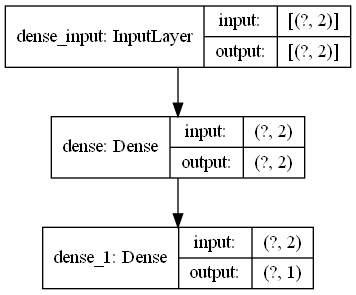

In [14]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model_shapes.png', show_shapes=True) #show_shapes=True: input/output 출력
#C:\Users\ictai\ICTIS_2022_3 생성

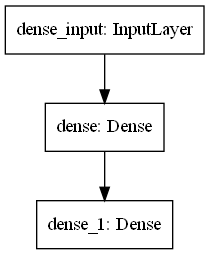

In [15]:
plot_model(model, to_file='model_shapes.png') #weight층 : 2

- http://playground.tensorflow.org/

# <분류 문제>
# 1. 폐암환자 생존율 예측
- 2013년 폴란드 브로츠와프 의과대학에서 공개
- 샘플수 : 470
- 열R: 수술 후 생존 결과(1:생존, 0:사망) -> 이항 분류 (다중 퍼셉트론 사용)

In [33]:
np.random.seed(9)

In [34]:
#자료 읽어 학습 데이터 셋 선택
#read data
data_set = np.loadtxt("d:/Ai/ThoracicSurgery.csv", delimiter=',')
X = data_set[:, 0:17]
Y = data_set[:, [17]] #2차원
print(X.shape, Y.shape)

(470, 17) (470, 1)


In [36]:
#신경망 구조 설정
#ANN structure
model = Sequential()
#units: 은닉층 뉴런의 수 / input_dim: 입력 뉴런의 수 17개(1차원) / activation: 은닉층의 activation
model.add(Dense(units = 30, input_dim = 17, activation = 'relu'))
model.add(Dense(units = 15, activation = 'relu'))
model.add(Dense(units = 8, activation = 'relu'))
model.add(Dense(units = 1, activation = 'sigmoid'))

In [37]:
#Training
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model.fit(X, Y, epochs = 30, batch_size = 10, verbose = 0)

In [38]:
#학습 셋에 대한 정확도 확인
model.evaluate(X, Y)

15/15 [==============================] - 0s 650us/step - loss: 0.4047 - accuracy: 0.8511


[0.40468212962150574, 0.8510638475418091]

In [39]:
#정확도 출력
print('Accuracy: ', model.evaluate(X, Y)[1])

15/15 [==============================] - 0s 532us/step - loss: 0.4047 - accuracy: 0.8511
Accuracy:  0.8510638475418091


In [40]:
#임의의 자료를 사용하여 예측 테스트
test_data = np.array([[172,2,2.88,2.2,0,0,0,0,0,0,12,1,0,0,1,0,62]])
print('result:', model.predict(test_data)) #0.5이하:사망 / 이상: 생존
#결과 : 사망

result: [[0.170008]]


In [41]:
print('result: %.2f' %model.predict(test_data))

result: 0.17


In [42]:
#임의의 자료를 사용하여 예측 테스트2
test_data = np.array([[150,2,2.88,2.2,0,0,0,0,0,0,12,1,0,0,1,0,59]])
print('result: %.2f' %model.predict(test_data)) #0.5이하:사망 / 이상: 생존
#결과 : 사망

result: 0.19


# 2. 피마 인디언 당뇨병 예측
- 샘플 수: 768
- 클래스(1) : 1: 당뇨 / 0: 당뇨 아님

In [44]:
#데이터 읽기
import pandas as pd
df = pd.read_csv('d:/Ai/pima-indians-diabetes.csv', 
                names=['pregnant', 'plasma', 'pressure', 'thickness', 
                       'insulin', 'BMI', 'pedigree', 'age', 'class'])
df.head()

,pregnant,plasma,pressure,thickness,insulin,BMI,pedigree,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [45]:
#데이터 정보 보기
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pregnant   768 non-null    int64  
 1   plasma     768 non-null    int64  
 2   pressure   768 non-null    int64  
 3   thickness  768 non-null    int64  
 4   insulin    768 non-null    int64  
 5   BMI        768 non-null    float64
 6   pedigree   768 non-null    float64
 7   age        768 non-null    int64  
 8   class      768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [46]:
df.describe()

,pregnant,plasma,pressure,thickness,insulin,BMI,pedigree,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [47]:
#자료 정보 보기
df[df['class'] == 0].describe()
#결과: 정상인 500명, 당뇨병 268명

,pregnant,plasma,pressure,thickness,insulin,BMI,pedigree,age,class
count,500.000000,500.0000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.0
mean,3.298000,109.9800,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000,0.0
std,3.017185,26.1412,18.063075,14.889947,98.865289,7.689855,0.299085,11.667655,0.0
min,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.0
25%,1.000000,93.0000,62.000000,0.000000,0.000000,25.400000,0.229750,23.000000,0.0
50%,2.000000,107.0000,70.000000,21.000000,39.000000,30.050000,0.336000,27.000000,0.0
75%,5.000000,125.0000,78.000000,31.000000,105.000000,35.300000,0.561750,37.000000,0.0
max,13.000000,197.0000,122.000000,60.000000,744.000000,57.300000,2.329000,81.000000,0.0


In [48]:
df[df['class'] == 1].describe() #당뇨병 환자 정보
#임신 횟수 증가

,pregnant,plasma,pressure,thickness,insulin,BMI,pedigree,age,class
count,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.0
mean,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164,1.0
std,3.741239,31.939622,21.491812,17.679711,138.689125,7.262967,0.372354,10.968254,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.088000,21.000000,1.0
25%,1.750000,119.000000,66.000000,0.000000,0.000000,30.800000,0.262500,28.000000,1.0
50%,4.000000,140.000000,74.000000,27.000000,0.000000,34.250000,0.449000,36.000000,1.0
75%,8.000000,167.000000,82.000000,36.000000,167.250000,38.775000,0.728000,44.000000,1.0
max,17.000000,199.000000,114.000000,99.000000,846.000000,67.100000,2.420000,70.000000,1.0


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

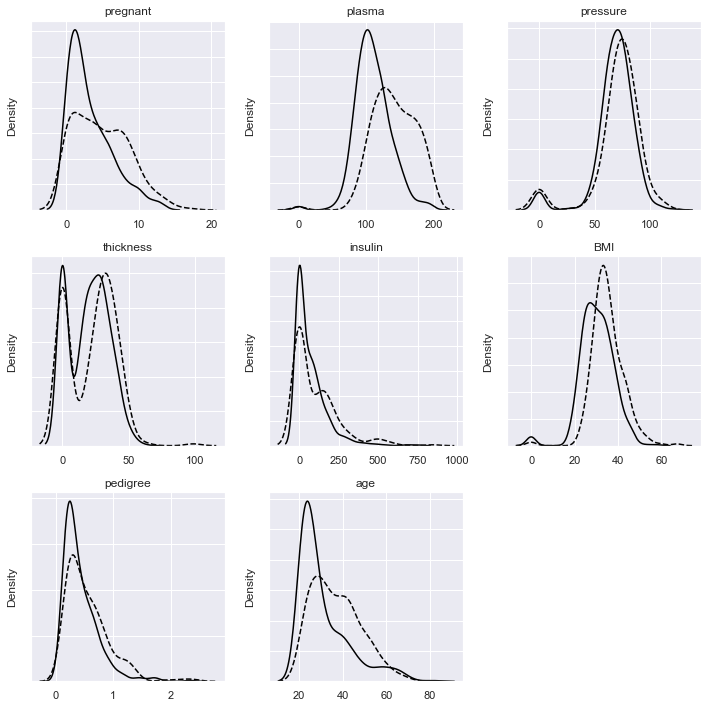

In [50]:
#그래프 그리기
plt.subplots(3,3, figsize=(10,10) )
for idx, col in enumerate(df.columns[:-1]):
    ax = plt.subplot(3,3, idx+1) #3*3
    ax.yaxis.set_ticklabels([])
    sns.distplot(df[df['class']==0][col], hist=False, axlabel=False,
               kde_kws={'linestyle':'-', 'color':'black', 'label':'No Diabetes'})
    sns.distplot(df[df['class']==1][col], hist=False, axlabel=False,
               kde_kws={'linestyle':'--', 'color':'black', 'label':'Diabetes'})
    ax.set_title(col)
plt.subplot(3,3,9).set_visible(False) #9번째 X
plt.tight_layout()
plt.show()
#실선: 정상인 / 점선: 당뇨병

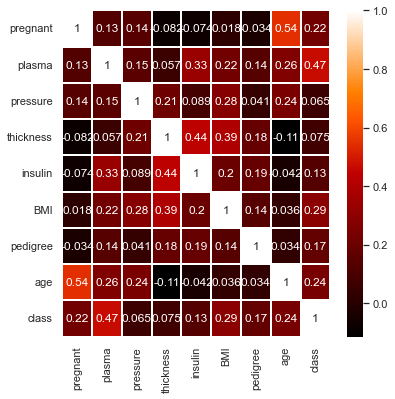

In [52]:
plt.figure(figsize=(6,6))
sns.heatmap(df.corr() , linewidths=0.1, linecolor='white',
            cmap=plt.cm.gist_heat, annot=True)
plt.show()

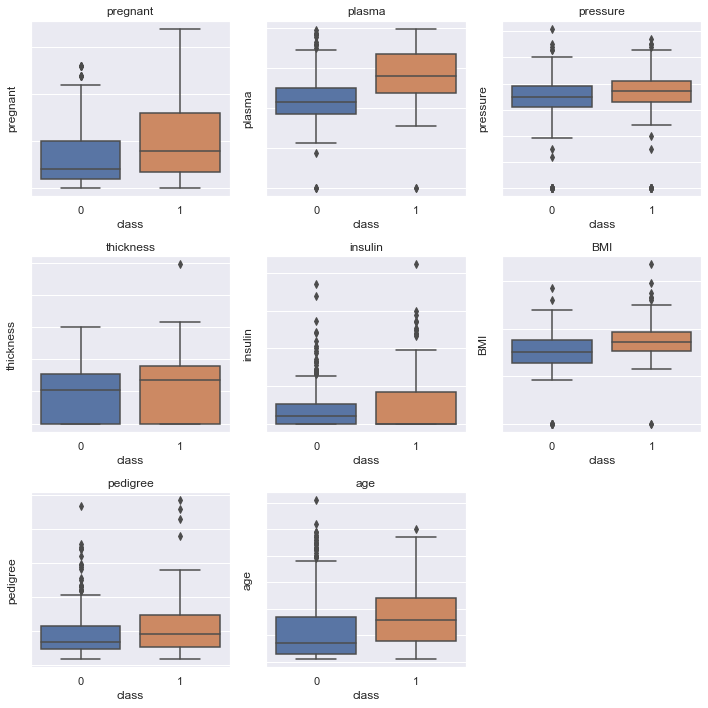

In [54]:
#그래프 그리기 - boxplot 사용
plt.subplots(3,3, figsize=(10,10) )
for idx, col in enumerate(df.columns[:-1]):
    ax = plt.subplot(3,3, idx+1) #3*3
    ax.yaxis.set_ticklabels([])
    sns.boxplot(x = 'class', y = col, data = df) #class별로 구분
    ax.set_title(col)
plt.subplot(3,3,9).set_visible(False) #9번째 X
plt.tight_layout()
plt.show()
#실선: 정상인 / 점선: 당뇨병

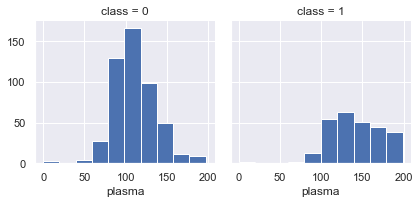

In [55]:
#Matplotlib와 seaborn을 사용하여 그래프로 표현하기
#'plasma' 속성과 'class' 속성간의 관계를 그래프로 확인
grid = sns.FacetGrid(df, col = 'class')
grid.map(plt.hist, 'plasma', bins = 10)
plt.show()

In [56]:
#학습 데이터 셋 준비
df.shape

(768, 9)

In [57]:
#X, Y 데이터 분리
X = df.values[:, :-1]
Y = df.values[:, [-1]]
X.shape, Y.shape

((768, 8), (768, 1))

In [65]:
#Random seed 설정: 실행할 때마다 일정한 결과값을 얻기 위해 설정
#신경망 구조결정 & 학습 & 성능 확인
import tensorflow as tf

seed = 0
np.random.seed(seed)
tf.compat.v1.set_random_seed(seed)

model = Sequential()
#units: 은닉층 뉴런의 수 / input_dim: 입력 뉴런의 수 17개(1차원) / activation: 은닉층의 activation
model.add(Dense(units = 12, input_dim = 8, activation = 'relu'))
model.add(Dense(units = 8, activation = 'relu'))
model.add(Dense(units = 1, activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model.fit(X, Y, epochs = 1000, batch_size = 10, verbose = 0)

print("Accuracy:", model.evaluate(X, Y)[1])

24/24 [==============================] - 0s 789us/step - loss: 0.4368 - accuracy: 0.8008
Accuracy: 0.80078125


In [66]:
Y_pred = model.predict(X)
Y_pred

array([[9.07940328e-01],
       [9.99158323e-02],
       [9.41722989e-01],
       [2.86042094e-02],
       [9.95270133e-01],
       [2.98089921e-01],
       [1.46053076e-01],
       [6.08175278e-01],
       [9.64496970e-01],
       [7.89361894e-02],
       [3.35738569e-01],
       [9.47922885e-01],
       [4.85797524e-01],
       [9.52898026e-01],
       [8.86767030e-01],
       [2.39528447e-01],
       [4.63472366e-01],
       [2.95959741e-01],
       [9.91039574e-02],
       [3.61986220e-01],
       [5.40909171e-01],
       [4.66704845e-01],
       [9.84275579e-01],
       [4.69049037e-01],
       [8.99556279e-01],
       [7.28620052e-01],
       [8.97132754e-01],
       [2.46049166e-02],
       [4.99553204e-01],
       [4.58122730e-01],
       [2.01402962e-01],
       [7.60692477e-01],
       [8.21112096e-02],
       [2.93150770e-09],
       [7.53965318e-01],
       [4.20917451e-01],
       [7.43099630e-01],
       [7.21972883e-01],
       [3.25336397e-01],
       [8.09052825e-01],


In [68]:
#성능 확인
Y_pred = model.predict(X)
Y_pred = (Y_pred >= 0.5).astype(int)

print((Y_pred == Y.astype(int)).reshape(-1,).astype(int))

[1 1 1 1 1 1 0 0 1 0 1 1 1 1 1 0 0 0 1 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 0
 1 0 1 0 0 1 1 0 1 0 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 0 1 1 0 0 1 1 0 0 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 0 1 0 0 1 1 1
 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 0 0 1 1 0 1 1 1 1 1 1 1 0 1 1 0 1 1 0
 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0 1 1 0 1 1 1 1 1 1 0 0 1 1 1 0 0 0 1 1 1
 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 0 0 0 1 1 1 1 1 1 0 0 1 0
 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 0 0 0 1 1 1 1 1 1 1 0
 1 1 1 1 1 1 1 1 0 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 0 0 1 1 0 1 1
 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 0
 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 0 1 0 1 1 1 1
 1 1 1 1 1 0 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 0 1 1 1 1 1 1
 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 0 1 1 0 1 1 1 1
 1 1 1 1 0 0 0 1 0 1 1 1 

In [69]:
#정답 찾은 인덱스 찾기
np.nonzero((Y_pred == Y.astype(int)).reshape(-1,).astype(int)) #tuple type

(array([  0,   1,   2,   3,   4,   5,   8,  10,  11,  12,  13,  14,  18,
         21,  22,  24,  25,  26,  27,  28,  29,  30,  31,  32,  33,  35,
         37,  39,  42,  43,  45,  47,  48,  49,  50,  51,  52,  53,  55,
         56,  57,  59,  60,  61,  62,  64,  65,  68,  69,  72,  73,  74,
         75,  76,  77,  78,  79,  80,  81,  82,  83,  84,  85,  87,  88,
         89,  90,  91,  92,  94,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 108, 110, 111, 112, 113, 114, 115, 116, 117, 118,
        119, 120, 121, 122, 123, 125, 126, 127, 129, 130, 131, 132, 133,
        134, 135, 136, 137, 139, 140, 142, 145, 146, 147, 148, 149, 151,
        152, 154, 155, 156, 157, 158, 159, 161, 162, 163, 164, 168, 169,
        171, 172, 173, 174, 175, 176, 177, 179, 180, 182, 183, 185, 186,
        187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 199, 200, 202,
        203, 205, 206, 207, 208, 209, 210, 213, 214, 215, 219, 220, 221,
        222, 224, 225, 226, 227, 229, 230, 231, 232

In [70]:
np.nonzero((Y_pred == Y.astype(int)).reshape(-1,).astype(int))[0]

array([  0,   1,   2,   3,   4,   5,   8,  10,  11,  12,  13,  14,  18,
        21,  22,  24,  25,  26,  27,  28,  29,  30,  31,  32,  33,  35,
        37,  39,  42,  43,  45,  47,  48,  49,  50,  51,  52,  53,  55,
        56,  57,  59,  60,  61,  62,  64,  65,  68,  69,  72,  73,  74,
        75,  76,  77,  78,  79,  80,  81,  82,  83,  84,  85,  87,  88,
        89,  90,  91,  92,  94,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 108, 110, 111, 112, 113, 114, 115, 116, 117, 118,
       119, 120, 121, 122, 123, 125, 126, 127, 129, 130, 131, 132, 133,
       134, 135, 136, 137, 139, 140, 142, 145, 146, 147, 148, 149, 151,
       152, 154, 155, 156, 157, 158, 159, 161, 162, 163, 164, 168, 169,
       171, 172, 173, 174, 175, 176, 177, 179, 180, 182, 183, 185, 186,
       187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 199, 200, 202,
       203, 205, 206, 207, 208, 209, 210, 213, 214, 215, 219, 220, 221,
       222, 224, 225, 226, 227, 229, 230, 231, 232, 234, 235, 23

In [71]:
#오답 인덱스 찾기
np.where((Y_pred==Y.astype(int)).reshape(-1,).astype(int)==0)

(array([  6,   7,   9,  15,  16,  17,  19,  20,  23,  34,  36,  38,  40,
         41,  44,  46,  54,  58,  63,  66,  67,  70,  71,  86,  93,  95,
        107, 109, 124, 128, 138, 141, 143, 144, 150, 153, 160, 165, 166,
        167, 170, 178, 181, 184, 197, 198, 201, 204, 211, 212, 216, 217,
        218, 223, 228, 233, 244, 246, 247, 248, 255, 256, 258, 260, 267,
        276, 281, 282, 284, 285, 286, 287, 295, 304, 308, 309, 321, 322,
        326, 327, 330, 335, 343, 351, 364, 366, 369, 374, 395, 397, 400,
        402, 412, 414, 419, 429, 436, 437, 448, 451, 468, 469, 470, 473,
        476, 485, 486, 487, 489, 499, 510, 517, 531, 541, 542, 549, 555,
        558, 568, 569, 574, 578, 594, 605, 608, 622, 628, 635, 638, 641,
        645, 657, 658, 659, 660, 666, 668, 669, 670, 673, 692, 699, 706,
        709, 710, 719, 725, 730, 731, 744, 756, 763, 764], dtype=int64),)

In [72]:
np.where((Y_pred==Y.astype(int)).reshape(-1,).astype(int)==0)[0]

array([  6,   7,   9,  15,  16,  17,  19,  20,  23,  34,  36,  38,  40,
        41,  44,  46,  54,  58,  63,  66,  67,  70,  71,  86,  93,  95,
       107, 109, 124, 128, 138, 141, 143, 144, 150, 153, 160, 165, 166,
       167, 170, 178, 181, 184, 197, 198, 201, 204, 211, 212, 216, 217,
       218, 223, 228, 233, 244, 246, 247, 248, 255, 256, 258, 260, 267,
       276, 281, 282, 284, 285, 286, 287, 295, 304, 308, 309, 321, 322,
       326, 327, 330, 335, 343, 351, 364, 366, 369, 374, 395, 397, 400,
       402, 412, 414, 419, 429, 436, 437, 448, 451, 468, 469, 470, 473,
       476, 485, 486, 487, 489, 499, 510, 517, 531, 541, 542, 549, 555,
       558, 568, 569, 574, 578, 594, 605, 608, 622, 628, 635, 638, 641,
       645, 657, 658, 659, 660, 666, 668, 669, 670, 673, 692, 699, 706,
       709, 710, 719, 725, 730, 731, 744, 756, 763, 764], dtype=int64)

In [76]:
#분류 못한 자료 보기(틀린 개수)
inc_idx = np.where((Y_pred==Y.astype(int)).reshape(-1,).astype(int)==0)[0]
inc_idx.shape

(153,)

In [77]:
df.iloc[inc_idx] #틀린 위치 찾기

,pregnant,plasma,pressure,thickness,insulin,BMI,pedigree,age,class
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
9,8,125,96,0,0,0.0,0.232,54,1
15,7,100,0,0,0,30.0,0.484,32,1
16,0,118,84,47,230,45.8,0.551,31,1
...,...,...,...,...,...,...,...,...,...
731,8,120,86,0,0,28.4,0.259,22,1
744,13,153,88,37,140,40.6,1.174,39,0
756,7,137,90,41,0,32.0,0.391,39,0
763,10,101,76,48,180,32.9,0.171,63,0


In [78]:
wrong_df = df.iloc[inc_idx]
wrong_df[wrong_df['class'] == 1].describe() #당뇨병 정보

,pregnant,plasma,pressure,thickness,insulin,BMI,pedigree,age,class
count,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.0
mean,3.785714,112.196429,69.678571,22.375000,68.357143,31.519643,0.481696,33.160714,1.0
std,3.436247,15.934433,19.347640,15.366507,79.901628,7.601756,0.296564,10.683508,0.0
min,0.000000,78.000000,0.000000,0.000000,0.000000,0.000000,0.161000,21.000000,1.0
25%,1.000000,101.500000,64.000000,0.000000,0.000000,29.450000,0.254000,25.750000,1.0
50%,3.000000,112.500000,72.000000,26.000000,18.000000,32.500000,0.373000,30.000000,1.0
75%,6.000000,124.000000,80.500000,32.000000,141.250000,34.650000,0.675000,38.000000,1.0
max,13.000000,145.000000,102.000000,47.000000,250.000000,45.800000,1.391000,70.000000,1.0


In [79]:
wrong_df[wrong_df['class'] == 0].describe() #정상인 정보

,pregnant,plasma,pressure,thickness,insulin,BMI,pedigree,age,class
count,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.0
mean,4.804124,139.896907,74.268041,23.164948,125.072165,35.134021,0.532155,35.432990,0.0
std,3.405385,22.312405,13.614113,17.264294,162.671144,6.425371,0.392064,10.805002,0.0
min,0.000000,98.000000,0.000000,0.000000,0.000000,21.000000,0.126000,21.000000,0.0
25%,2.000000,123.000000,68.000000,0.000000,0.000000,30.100000,0.258000,27.000000,0.0
50%,4.000000,139.000000,74.000000,30.000000,70.000000,34.700000,0.399000,34.000000,0.0
75%,7.000000,153.000000,82.000000,35.000000,200.000000,39.400000,0.696000,41.000000,0.0
max,13.000000,197.000000,110.000000,54.000000,744.000000,57.300000,2.329000,67.000000,0.0


## 혼동행렬
- https://towardsdatascience.com/decoding-the-confusion-matrix-bb4801decbb

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [80]:
#평가 지표 한번에 보기
from sklearn.metrics import classification_report
print(classification_report(Y, Y_pred)) #print()로 출력해야 함
#TN FP
#FN TP

              precision    recall  f1-score   support

         0.0       0.88      0.81      0.84       500
         1.0       0.69      0.79      0.73       268

    accuracy                           0.80       768
   macro avg       0.78      0.80      0.79       768
weighted avg       0.81      0.80      0.80       768



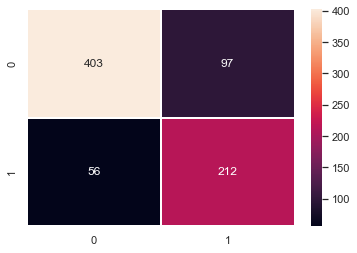

In [82]:
from sklearn.metrics import confusion_matrix

sns.heatmap(confusion_matrix(Y, Y_pred), linewidths = 0.1, linecolor = 'white', annot = True, fmt = 'd')
plt.show()

# 3. Iris 품종 분류

In [83]:
df = pd.read_csv('d:/Ai/iris.csv', names=['sepal_length', 'sepal_width', 
                                          'petal_length', 'petal_width', 
                                          'species'])
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


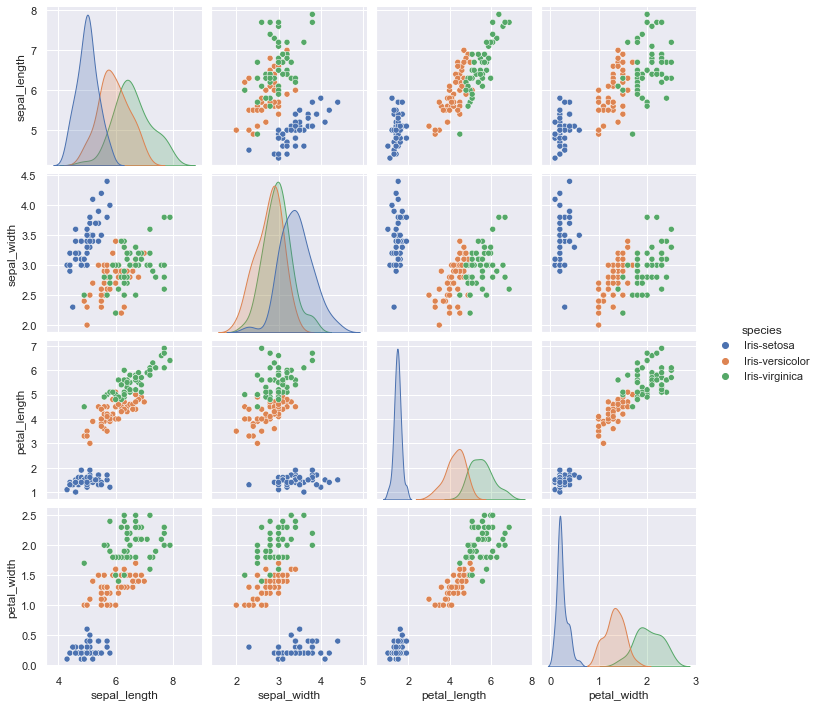

In [84]:
#자료 시각화
sns.pairplot(df, hue = 'species')
plt.show()

In [86]:
g = df.groupby(['species'], as_index = False)
for key, d in g:
    print('key:', key)
    print(d)
    print()

key: Iris-setosa
    sepal_length  sepal_width  petal_length  petal_width      species
0            5.1          3.5           1.4          0.2  Iris-setosa
1            4.9          3.0           1.4          0.2  Iris-setosa
2            4.7          3.2           1.3          0.2  Iris-setosa
3            4.6          3.1           1.5          0.2  Iris-setosa
4            5.0          3.6           1.4          0.2  Iris-setosa
5            5.4          3.9           1.7          0.4  Iris-setosa
6            4.6          3.4           1.4          0.3  Iris-setosa
7            5.0          3.4           1.5          0.2  Iris-setosa
8            4.4          2.9           1.4          0.2  Iris-setosa
9            4.9          3.1           1.5          0.1  Iris-setosa
10           5.4          3.7           1.5          0.2  Iris-setosa
11           4.8          3.4           1.6          0.2  Iris-setosa
12           4.8          3.0           1.4          0.1  Iris-setosa
13 

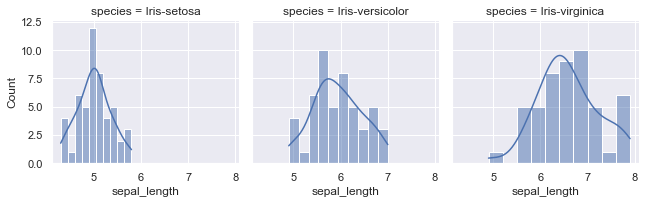

In [87]:
#품종별 정규분포 분석 - sepal_length
g = sns.FacetGrid(df, col = 'species')
g.map_dataframe(sns.histplot, kde = True, x = 'sepal_length', bins = 10)
plt.show()

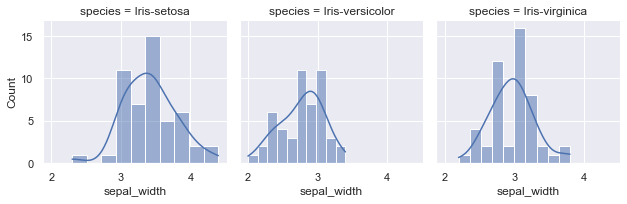

In [88]:
#품종별 정규분포 분석 - sepal_width
g = sns.FacetGrid(df, col = 'species')
g.map_dataframe(sns.histplot, kde = True, x = 'sepal_width', bins = 10)
plt.show()

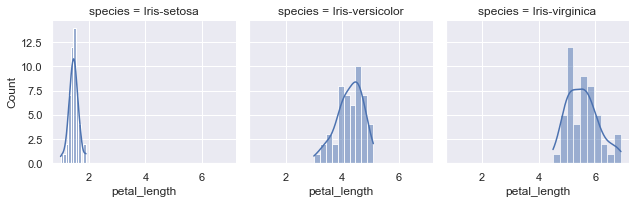

In [89]:
#품종별 정규분포 분석 - petal_length
g = sns.FacetGrid(df, col = 'species')
g.map_dataframe(sns.histplot, kde = True, x = 'petal_length', bins = 10)
plt.show()

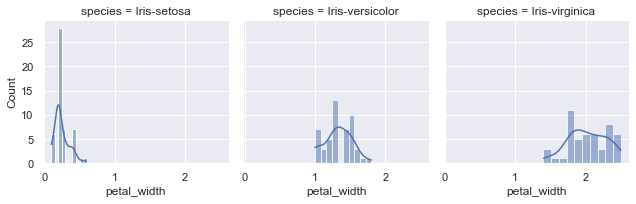

In [90]:
#품종별 정규분포 분석 - petal_width
g = sns.FacetGrid(df, col = 'species')
g.map_dataframe(sns.histplot, kde = True, x = 'petal_width', bins = 10)
plt.show()

In [92]:
#학습 데이터 셋 준비
X = df.to_numpy()[:, :-1].astype(float)
Y_str = df.to_numpy()[:, -1] #1차원, LabelEncoder의 입력이 1차원
Y_str.shape

(150,)

In [93]:
#범주형 레이블을 수치형 레이블로 변환
from sklearn.preprocessing import LabelEncoder

e = LabelEncoder()
e.fit(Y_str)
Y_num = e.transform(Y_str)
Y_num.shape
#결과 class가 문자열이면 반드시 실행 필요

(150,)

In [94]:
Y_num

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [95]:
#One-hot encoding
from tensorflow.keras.utils import to_categorical

Y = to_categorical(Y_num, num_classes = 3) #다중 분류 문제에 대해서 반드시 실행
Y.shape

(150, 3)

In [96]:
Y

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

In [104]:
%%time
#실행 시간 Wall time 출력

model = Sequential()
#units: 은닉층 뉴런의 수 / input_dim: 입력 뉴런의 수 / activation: 은닉층의 activation
model.add(Dense(units = 16, input_dim = 4, activation = 'relu'))
model.add(Dense(units = 8, activation = 'relu'))
model.add(Dense(units = 3, activation = 'softmax')) #출력층

#컴파일 및 학습
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model.fit(X, Y, epochs = 500, batch_size = 32, verbose = 0)

print("Accuracy:", model.evaluate(X, Y)[1])

5/5 [==============================] - 0s 2ms/step - loss: 0.0662 - accuracy: 0.9733
Accuracy: 0.9733333587646484
CPU times: total: 2.33 s
Wall time: 1.36 s


# 4. 광물 예측

## 데이터 확인

In [4]:
# SONAR TARGET DETECTION by Prof.Sejnowski
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import pandas as pd

In [5]:
df = pd.read_csv('d:/Ai/sonar.csv', header= None) #header 없음
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 61 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       208 non-null    float64
 1   1       208 non-null    float64
 2   2       208 non-null    float64
 3   3       208 non-null    float64
 4   4       208 non-null    float64
 5   5       208 non-null    float64
 6   6       208 non-null    float64
 7   7       208 non-null    float64
 8   8       208 non-null    float64
 9   9       208 non-null    float64
 10  10      208 non-null    float64
 11  11      208 non-null    float64
 12  12      208 non-null    float64
 13  13      208 non-null    float64
 14  14      208 non-null    float64
 15  15      208 non-null    float64
 16  16      208 non-null    float64
 17  17      208 non-null    float64
 18  18      208 non-null    float64
 19  19      208 non-null    float64
 20  20      208 non-null    float64
 21  21      208 non-null    float64
 22  22

In [6]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [7]:
df.tail()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
203,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157,M
204,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067,M
205,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031,M
206,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048,M
207,0.0260,0.0363,0.0136,0.0272,0.0214,0.0338,0.0655,0.1400,0.1843,0.2354,...,0.0146,0.0129,0.0047,0.0039,0.0061,0.0040,0.0036,0.0061,0.0115,M


In [8]:
#M, R의 개수 확인
df[60].value_counts()

M    111
R     97
Name: 60, dtype: int64

[135, 87, 101, 99, 105, 98, 169, 166, 148, 74, 81, 69, 109, 15, 25, 189, 186, 142, 136, 123, 73, 198, 48, 121, 36]


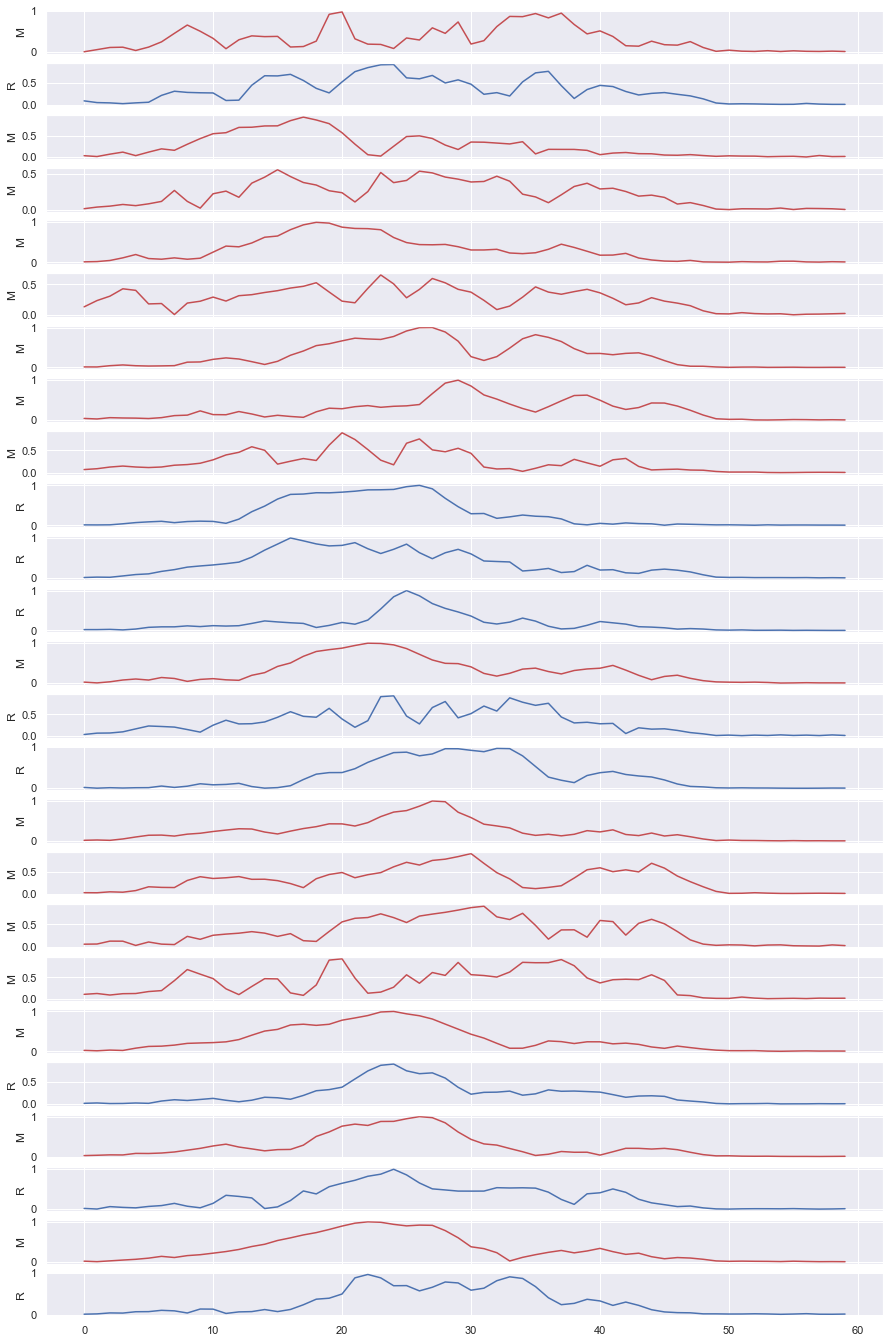

In [13]:
#데이터 그려보기
import random
samples= 25
d = random.sample(range(len(df)), samples)
print(d)

def set_color(x): #맨끝 컬럼 가져와서 확인
     return 'r' if x == 'M' else 'b'

plt.figure(figsize=(15,samples)) #x축 15인치, y축은 samples의 개수 인치
for i in range(samples):
    plt.subplot(samples+1,1,i+1)
    plt.plot(df.to_numpy()[d[i],:-1], set_color(df.to_numpy()[d[i],-1])) #-1: 맨끝 컬럼 제외
    plt.ylabel(df.to_numpy()[d[i],-1])
    
plt.show()

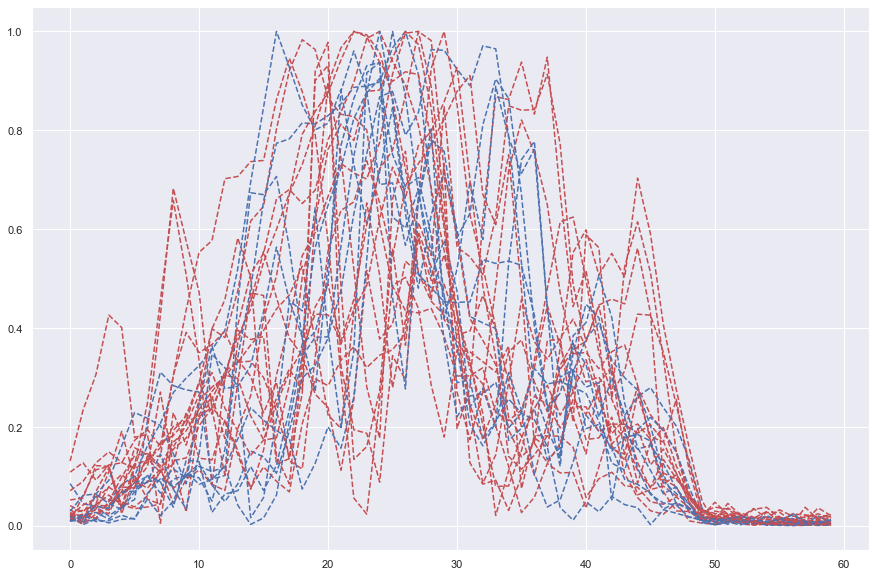

In [14]:
#점선(주파수)으로 데이터 확인 -> 높이가 높을수록 성분 많음, 낮을수록 적음
plt.figure(figsize=(15,10)) #x축 15인치, y축은 samples의 개수 인치
for i in range(samples):
    plt.plot(df.to_numpy()[d[i],:-1], set_color(df.to_numpy()[d[i],-1])+'--')
    
plt.show()

### 학습 세트 준비
- 문자열인 클래스 'R', 'M'을 수치로 변환

In [17]:
X = df.to_numpy()[:, :-1].astype(float)
Y_str = df.to_numpy()[:, -1] #1차원

from sklearn.preprocessing import LabelEncoder
e = LabelEncoder()
e.fit(Y_str) #입력: 1차원 배열
Y = e.transform(Y_str)
Y, Y.shape
#'R':1/'M':0으로 인코딩

(array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 (208,))

In [18]:
Y = Y.reshape(-1,1)
Y.shape

(208, 1)

In [16]:
e.classes_

array(['M', 'R'], dtype=object)

## 4.1 전체 자료 학습

In [19]:
# 전 데이터 세트 학습 및 정확도 확인
# 신경망 구조 결정 / 신경망 컴파일 및 학습
# 60-24-10-1
# 출력층 노드의 activation 함수 : sigmoid

seed = 0
np.random.seed(seed)
tf.compat.v1.set_random_seed(seed)

model = Sequential()
#units: 은닉층 뉴런의 수 / input_dim: 입력 뉴런의 수(1차원) / activation: 은닉층의 activation
model.add(Dense(units = 24, input_dim = 60, activation = 'relu'))
model.add(Dense(units = 10, activation = 'relu'))
model.add(Dense(units = 1, activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model.fit(X, Y, epochs = 2000, batch_size = 32, verbose = 0)

print('Accuracy: %.4f' % (model.evaluate(X, Y)[1]))

7/7 [==============================] - 0s 0s/step - loss: 3.6068e-06 - accuracy: 1.0000
Accuracy: 1.0000


## 4.2 학습 셋 및 테스트셋 분리 (과적합 확인)
- 학습세트 : 테스트 세트 = 7 : 3

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0) #7:3

X.shape, Y.shape

((208, 60), (208, 1))

In [21]:
seed = 0
np.random.seed(seed)
tf.compat.v1.set_random_seed(seed)

model = Sequential()
#units: 은닉층 뉴런의 수 / input_dim: 입력 뉴런의 수(1차원) / activation: 은닉층의 activation
model.add(Dense(units = 24, input_dim = 60, activation = 'relu'))
model.add(Dense(units = 10, activation = 'relu'))
model.add(Dense(units = 1, activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model.fit(X_train, Y_train, epochs = 2000, batch_size = 32, verbose = 0)

print('Accuracy: %.4f' % (model.evaluate(X_train, Y_train)[1]))

5/5 [==============================] - 0s 0s/step - loss: 1.4965e-05 - accuracy: 1.0000
Accuracy: 1.0000


In [23]:
print('Test accuracy: %.4f' % (model.evaluate(X_test, Y_test)[1]))
#학습시킨 데이터(train data)에 대해서는 100%이나, test data에 대해서는 성능이 떨어짐 -> 과적합

2/2 [==============================] - 0s 1ms/step - loss: 1.4824 - accuracy: 0.8254
Test accuracy: 0.8254


In [24]:
#모델 저장
model.save('d:/Ai/sonar_model.h5')

In [25]:
%whos

Variable           Type            Data/Info
--------------------------------------------
Dense              type            <class 'tensorflow.python<...>keras.layers.core.Dense'>
LabelEncoder       type            <class 'sklearn.preproces<...>ing._label.LabelEncoder'>
Sequential         type            <class 'tensorflow.python<...>e.sequential.Sequential'>
X                  ndarray         208x60: 12480 elems, type `float64`, 99840 bytes
X_test             ndarray         63x60: 3780 elems, type `float64`, 30240 bytes
X_train            ndarray         145x60: 8700 elems, type `float64`, 69600 bytes
Y                  ndarray         208x1: 208 elems, type `int32`, 832 bytes
Y_str              ndarray         208: 208 elems, type `object`, 1664 bytes
Y_test             ndarray         63x1: 63 elems, type `int32`, 252 bytes
Y_train            ndarray         145x1: 145 elems, type `int32`, 580 bytes
d                  list            n=25
df                 DataFrame              

In [26]:
del model

In [28]:
%whos

Variable           Type            Data/Info
--------------------------------------------
Dense              type            <class 'tensorflow.python<...>keras.layers.core.Dense'>
LabelEncoder       type            <class 'sklearn.preproces<...>ing._label.LabelEncoder'>
Sequential         type            <class 'tensorflow.python<...>e.sequential.Sequential'>
X                  ndarray         208x60: 12480 elems, type `float64`, 99840 bytes
X_test             ndarray         63x60: 3780 elems, type `float64`, 30240 bytes
X_train            ndarray         145x60: 8700 elems, type `float64`, 69600 bytes
Y                  ndarray         208x1: 208 elems, type `int32`, 832 bytes
Y_str              ndarray         208: 208 elems, type `object`, 1664 bytes
Y_test             ndarray         63x1: 63 elems, type `int32`, 252 bytes
Y_train            ndarray         145x1: 145 elems, type `int32`, 580 bytes
d                  list            n=25
df                 DataFrame              

In [29]:
#모델 재사용
from tensorflow.keras.models import load_model
opt_model = load_model('d:/Ai/sonar_model.h5')

print('Training accuracy: %.4f' % (opt_model.evaluate(X_train, Y_train)[1]))
print('Test accuracy: %.4f' % (opt_model.evaluate(X_test, Y_test)[1]))
#제품 하단에 정보가 들어감

5/5 [==============================] - 0s 3ms/step - loss: 1.4965e-05 - accuracy: 1.0000
Training accuracy: 1.0000
2/2 [==============================] - 0s 514us/step - loss: 1.4824 - accuracy: 0.8254
Test accuracy: 0.8254


## 4.3 k겹 교차 검증
- 과적합: 모델이 주어진 학습 세트에 대해서만 최적화된 것
- 교차 검증: 학습 데이터가 부족할 때, 과적합시 모델의 성능 예측에 사용
- 데이터 세트를 k-블록으로 나누어, 한 블록씩 번갈아 가며 테스트 세트로 사용 -> 테스트 셋에 대한 평균 성능을 사용

In [36]:
#k-폴드 설정
#StratifiedKFold: 데이터 셋 분할 시, target 클래스의 비율을 유지
from sklearn.model_selection import StratifiedKFold

seed = 0
np.random.seed(seed)
tf.compat.v1.set_random_seed(seed)

n_fold = 10
skf = StratifiedKFold(n_splits = n_fold, shuffle = True, random_state = seed)

type(skf)

sklearn.model_selection._split.StratifiedKFold

In [37]:
accuracy_list = []
for train_index, test_index in skf.split(X, Y): #인덱스들을 넘겨줌
    X_train, X_test = X[train_index], X[test_index]
    Y_train, Y_test = Y[train_index], Y[test_index]
    
    model = Sequential()
    model.add(Dense(units = 24, input_dim = 60, activation = 'relu'))
    model.add(Dense(units = 10, activation = 'relu'))
    model.add(Dense(units = 1, activation = 'sigmoid'))

    model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
    model.fit(X_train, Y_train, epochs = 100, batch_size = 5, verbose = 1)
    
    accuracy_list.append(model.evaluate(X_test, Y_test)[1])

Epoch 1/100
38/38 [==============================] - 0s 704us/step - loss: 0.6783 - accuracy: 0.5455
Epoch 2/100
38/38 [==============================] - 0s 496us/step - loss: 0.6439 - accuracy: 0.6471
Epoch 3/100
38/38 [==============================] - 0s 572us/step - loss: 0.6189 - accuracy: 0.6898
Epoch 4/100
38/38 [==============================] - 0s 525us/step - loss: 0.5962 - accuracy: 0.7219
Epoch 5/100
38/38 [==============================] - 0s 578us/step - loss: 0.5686 - accuracy: 0.7273
Epoch 6/100
38/38 [==============================] - 0s 477us/step - loss: 0.5468 - accuracy: 0.7594
Epoch 7/100
38/38 [==============================] - 0s 525us/step - loss: 0.5216 - accuracy: 0.7914
Epoch 8/100
38/38 [==============================] - 0s 551us/step - loss: 0.4950 - accuracy: 0.8128
Epoch 9/100
38/38 [==============================] - 0s 473us/step - loss: 0.4754 - accuracy: 0.8182
Epoch 10/100
38/38 [==============================] - 0s 525us/step - loss: 0.4595 - accura

38/38 [==============================] - 0s 488us/step - loss: 0.2874 - accuracy: 0.8770
Epoch 54/100
38/38 [==============================] - 0s 499us/step - loss: 0.2991 - accuracy: 0.8770
Epoch 55/100
38/38 [==============================] - 0s 499us/step - loss: 0.2759 - accuracy: 0.8770
Epoch 56/100
38/38 [==============================] - 0s 472us/step - loss: 0.2753 - accuracy: 0.8877
Epoch 57/100
38/38 [==============================] - 0s 525us/step - loss: 0.2797 - accuracy: 0.8610
Epoch 58/100
38/38 [==============================] - 0s 512us/step - loss: 0.2759 - accuracy: 0.9037
Epoch 59/100
38/38 [==============================] - 0s 499us/step - loss: 0.2663 - accuracy: 0.8930
Epoch 60/100
38/38 [==============================] - 0s 475us/step - loss: 0.2639 - accuracy: 0.8984
Epoch 61/100
38/38 [==============================] - 0s 540us/step - loss: 0.2622 - accuracy: 0.8930
Epoch 62/100
38/38 [==============================] - 0s 515us/step - loss: 0.2719 - accuracy: 

1/1 [==============================] - 0s 0s/step - loss: 0.7972 - accuracy: 0.7619
Epoch 1/100
38/38 [==============================] - 0s 525us/step - loss: 0.6967 - accuracy: 0.5187
Epoch 2/100
38/38 [==============================] - 0s 499us/step - loss: 0.6730 - accuracy: 0.5989
Epoch 3/100
38/38 [==============================] - 0s 472us/step - loss: 0.6595 - accuracy: 0.6738
Epoch 4/100
38/38 [==============================] - 0s 481us/step - loss: 0.6440 - accuracy: 0.6952
Epoch 5/100
38/38 [==============================] - 0s 472us/step - loss: 0.6276 - accuracy: 0.6898
Epoch 6/100
38/38 [==============================] - 0s 472us/step - loss: 0.6081 - accuracy: 0.6952
Epoch 7/100
38/38 [==============================] - 0s 451us/step - loss: 0.5816 - accuracy: 0.7326
Epoch 8/100
38/38 [==============================] - 0s 577us/step - loss: 0.5556 - accuracy: 0.7754
Epoch 9/100
38/38 [==============================] - 0s 493us/step - loss: 0.5298 - accuracy: 0.8128
Epoch 1

38/38 [==============================] - 0s 472us/step - loss: 0.1472 - accuracy: 0.9626
Epoch 53/100
38/38 [==============================] - 0s 472us/step - loss: 0.1480 - accuracy: 0.9626
Epoch 54/100
38/38 [==============================] - 0s 499us/step - loss: 0.1502 - accuracy: 0.9626
Epoch 55/100
38/38 [==============================] - 0s 469us/step - loss: 0.1424 - accuracy: 0.9572
Epoch 56/100
38/38 [==============================] - 0s 472us/step - loss: 0.1349 - accuracy: 0.9572
Epoch 57/100
38/38 [==============================] - 0s 472us/step - loss: 0.1229 - accuracy: 0.9733
Epoch 58/100
38/38 [==============================] - 0s 472us/step - loss: 0.1251 - accuracy: 0.9733
Epoch 59/100
38/38 [==============================] - 0s 472us/step - loss: 0.1203 - accuracy: 0.9733
Epoch 60/100
38/38 [==============================] - 0s 499us/step - loss: 0.1227 - accuracy: 0.9786
Epoch 61/100
38/38 [==============================] - 0s 487us/step - loss: 0.1130 - accuracy: 

1/1 [==============================] - 0s 827us/step - loss: 0.5154 - accuracy: 0.8095
Epoch 1/100
38/38 [==============================] - 0s 488us/step - loss: 0.6754 - accuracy: 0.5668
Epoch 2/100
38/38 [==============================] - 0s 485us/step - loss: 0.6483 - accuracy: 0.6417
Epoch 3/100
38/38 [==============================] - 0s 505us/step - loss: 0.6257 - accuracy: 0.6898
Epoch 4/100
38/38 [==============================] - 0s 489us/step - loss: 0.6079 - accuracy: 0.7112
Epoch 5/100
38/38 [==============================] - 0s 472us/step - loss: 0.5872 - accuracy: 0.7059
Epoch 6/100
38/38 [==============================] - 0s 513us/step - loss: 0.5668 - accuracy: 0.7487
Epoch 7/100
38/38 [==============================] - 0s 472us/step - loss: 0.5459 - accuracy: 0.7647
Epoch 8/100
38/38 [==============================] - 0s 472us/step - loss: 0.5191 - accuracy: 0.7968
Epoch 9/100
38/38 [==============================] - 0s 472us/step - loss: 0.5014 - accuracy: 0.8021
Epoc

38/38 [==============================] - 0s 465us/step - loss: 0.1941 - accuracy: 0.9358
Epoch 53/100
38/38 [==============================] - 0s 490us/step - loss: 0.1871 - accuracy: 0.9358
Epoch 54/100
38/38 [==============================] - 0s 472us/step - loss: 0.2012 - accuracy: 0.9198
Epoch 55/100
38/38 [==============================] - 0s 472us/step - loss: 0.1812 - accuracy: 0.9358
Epoch 56/100
38/38 [==============================] - 0s 446us/step - loss: 0.1737 - accuracy: 0.9358
Epoch 57/100
38/38 [==============================] - 0s 472us/step - loss: 0.1658 - accuracy: 0.9412
Epoch 58/100
38/38 [==============================] - 0s 483us/step - loss: 0.1803 - accuracy: 0.9305
Epoch 59/100
38/38 [==============================] - 0s 467us/step - loss: 0.1696 - accuracy: 0.9251
Epoch 60/100
38/38 [==============================] - 0s 457us/step - loss: 0.1799 - accuracy: 0.9144
Epoch 61/100
38/38 [==============================] - 0s 472us/step - loss: 0.1638 - accuracy: 

1/1 [==============================] - 0s 1000us/step - loss: 0.2751 - accuracy: 0.9000
Epoch 1/100
38/38 [==============================] - 0s 758us/step - loss: 0.6896 - accuracy: 0.5372
Epoch 2/100
38/38 [==============================] - 0s 472us/step - loss: 0.6753 - accuracy: 0.5532
Epoch 3/100
38/38 [==============================] - 0s 499us/step - loss: 0.6662 - accuracy: 0.5745
Epoch 4/100
38/38 [==============================] - 0s 446us/step - loss: 0.6518 - accuracy: 0.6277
Epoch 5/100
38/38 [==============================] - 0s 475us/step - loss: 0.6412 - accuracy: 0.6436
Epoch 6/100
38/38 [==============================] - 0s 475us/step - loss: 0.6288 - accuracy: 0.6649
Epoch 7/100
38/38 [==============================] - 0s 472us/step - loss: 0.6110 - accuracy: 0.6968
Epoch 8/100
38/38 [==============================] - 0s 515us/step - loss: 0.5949 - accuracy: 0.7287
Epoch 9/100
38/38 [==============================] - 0s 462us/step - loss: 0.5773 - accuracy: 0.7021
Epo

In [38]:
model.summary()

Model: "sequential_32"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_96 (Dense)             (None, 24)                1464      
_________________________________________________________________
dense_97 (Dense)             (None, 10)                250       
_________________________________________________________________
dense_98 (Dense)             (None, 1)                 11        
Total params: 1,725
Trainable params: 1,725
Non-trainable params: 0
_________________________________________________________________


In [39]:
print(n_fold,"-fold accuracy: ", accuracy_list)

10 -fold accuracy:  [0.761904776096344, 0.8095238208770752, 0.761904776096344, 0.9047619104385376, 0.9047619104385376, 0.8095238208770752, 0.8571428656578064, 0.8571428656578064, 0.8999999761581421, 0.8500000238418579]


In [40]:
#시스템 성능
print("Average accuracy: " , sum(accuracy_list)/n_fold)

Average accuracy:  0.8416666746139526


# 5. Wine 분류
- 과적합 방지하여 등급, 맛, 산도 정보로 red wine과 white wine을 구분하는 최적의 딥러닝 모델 만들기
- 수행1: 모델 생성 / 학습: 최적의 모델을 파일로 저장 / 학습 히스토리 살펴보기
- 수행2: 과적합 발생시 학습 조기 중단

In [41]:
#데이터 확인
wine = pd.read_csv('d:/Ai/wine.csv', header=None)
wine.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


In [42]:
wine[12].value_counts()

0    4898
1    1599
Name: 12, dtype: int64

In [44]:
wine[11].value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: 11, dtype: int64

In [45]:
df = wine.sample(frac = 1) #원본 #frac: 몇% 고를것인가(0~1 사이값)
df.head()
#섞었기 때문에 index가 random 순서

,0,1,2,3,4,5,6,7,8,9,10,11,12
5316,6.3,0.18,0.24,3.4,0.053,20.0,119.0,0.99373,3.11,0.52,9.2,6,0
5210,6.8,0.14,0.18,1.4,0.047,30.0,90.0,0.99164,3.27,0.54,11.2,6,0
3518,7.3,0.22,0.50,13.7,0.049,56.0,189.0,0.99940,3.24,0.66,9.0,6,0
1622,7.6,0.67,0.14,1.5,0.074,25.0,168.0,0.99370,3.05,0.51,9.3,5,0
2443,7.3,0.21,0.29,1.6,0.034,29.0,118.0,0.99170,3.30,0.50,11.0,8,0


In [46]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 5316 to 2732
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       6497 non-null   float64
 1   1       6497 non-null   float64
 2   2       6497 non-null   float64
 3   3       6497 non-null   float64
 4   4       6497 non-null   float64
 5   5       6497 non-null   float64
 6   6       6497 non-null   float64
 7   7       6497 non-null   float64
 8   8       6497 non-null   float64
 9   9       6497 non-null   float64
 10  10      6497 non-null   float64
 11  11      6497 non-null   int64  
 12  12      6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 710.6 KB
None


In [47]:
#학습 데이터 준비
X = df.to_numpy()[:, :-1]
Y = df.to_numpy()[:, [-1]] #2차원

X #섞여있음

array([[ 6.3 ,  0.18,  0.24, ...,  0.52,  9.2 ,  6.  ],
       [ 6.8 ,  0.14,  0.18, ...,  0.54, 11.2 ,  6.  ],
       [ 7.3 ,  0.22,  0.5 , ...,  0.66,  9.  ,  6.  ],
       ...,
       [ 6.8 ,  0.2 ,  0.59, ...,  0.38,  9.1 ,  6.  ],
       [ 6.6 ,  0.22,  0.37, ...,  0.55, 10.3 ,  7.  ],
       [ 8.7 ,  0.22,  0.42, ...,  0.43, 10.  ,  5.  ]])

## 5.1 수행 1

In [49]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import os

#Random seed 설정 / 초기화 코드
seed = 0
np.random.seed(seed)
tf.compat.v1.set_random_seed(seed)

In [51]:
#모델 구조 결정 및 컴파일
#입력노드 12개, 은닉층 (30-12-8)(relu), 출력층 1개(sigmoid)
model = Sequential()
model.add(Dense(units = 30, input_dim = 12, activation = 'relu'))
model.add(Dense(units = 12, activation = 'relu'))
model.add(Dense(units = 8, activation = 'relu'))
model.add(Dense(units = 1, activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [52]:
#학습 중의 모델을 저장
#Epoch마다 정확도 기록하며 저장

#모델 저장 폴더 설정
MODEL_DIR = 'd:/Ai/WineModel/'
if not os.path.exists(MODEL_DIR):
     os.mkdir(MODEL_DIR) #디렉토리가 존재하지 않을 때 mkdir(make directory) -> 폴더 새로 생성

#모델 저장 조건 설정    
modelfile = MODEL_DIR + '{epoch:02d}-{val_loss:.4f}.h5' #{변수값:형식}
checkpointer = ModelCheckpoint(filepath = modelfile, #ModelCheckpoint: 모델 저장에 필요한 함수
                               monitor = 'val_loss', verbose = 1,
                               save_best_only = True) 

#모델 학습 및 저장
fit_history = model.fit(X, Y, epochs = 3500, batch_size = 200, 
                        validation_split = 0.33, verbose = 0, callbacks = [checkpointer])


Epoch 00001: val_loss improved from inf to 0.28040, saving model to d:/Ai/WineModel\01-0.2804.h5

Epoch 00002: val_loss improved from 0.28040 to 0.21010, saving model to d:/Ai/WineModel\02-0.2101.h5

Epoch 00003: val_loss improved from 0.21010 to 0.20218, saving model to d:/Ai/WineModel\03-0.2022.h5

Epoch 00004: val_loss improved from 0.20218 to 0.18681, saving model to d:/Ai/WineModel\04-0.1868.h5

Epoch 00005: val_loss improved from 0.18681 to 0.18207, saving model to d:/Ai/WineModel\05-0.1821.h5

Epoch 00006: val_loss improved from 0.18207 to 0.17286, saving model to d:/Ai/WineModel\06-0.1729.h5

Epoch 00007: val_loss improved from 0.17286 to 0.17064, saving model to d:/Ai/WineModel\07-0.1706.h5

Epoch 00008: val_loss improved from 0.17064 to 0.16517, saving model to d:/Ai/WineModel\08-0.1652.h5

Epoch 00009: val_loss did not improve from 0.16517

Epoch 00010: val_loss improved from 0.16517 to 0.15594, saving model to d:/Ai/WineModel\10-0.1559.h5

Epoch 00011: val_loss improved fr


Epoch 00099: val_loss did not improve from 0.05128

Epoch 00100: val_loss improved from 0.05128 to 0.04960, saving model to d:/Ai/WineModel\100-0.0496.h5

Epoch 00101: val_loss did not improve from 0.04960

Epoch 00102: val_loss did not improve from 0.04960

Epoch 00103: val_loss did not improve from 0.04960

Epoch 00104: val_loss did not improve from 0.04960

Epoch 00105: val_loss did not improve from 0.04960

Epoch 00106: val_loss did not improve from 0.04960

Epoch 00107: val_loss did not improve from 0.04960

Epoch 00108: val_loss did not improve from 0.04960

Epoch 00109: val_loss did not improve from 0.04960

Epoch 00110: val_loss improved from 0.04960 to 0.04832, saving model to d:/Ai/WineModel\110-0.0483.h5

Epoch 00111: val_loss did not improve from 0.04832

Epoch 00112: val_loss did not improve from 0.04832

Epoch 00113: val_loss improved from 0.04832 to 0.04765, saving model to d:/Ai/WineModel\113-0.0476.h5

Epoch 00114: val_loss did not improve from 0.04765

Epoch 00115: v


Epoch 00243: val_loss did not improve from 0.04139

Epoch 00244: val_loss did not improve from 0.04139

Epoch 00245: val_loss did not improve from 0.04139

Epoch 00246: val_loss did not improve from 0.04139

Epoch 00247: val_loss did not improve from 0.04139

Epoch 00248: val_loss did not improve from 0.04139

Epoch 00249: val_loss improved from 0.04139 to 0.04122, saving model to d:/Ai/WineModel\249-0.0412.h5

Epoch 00250: val_loss did not improve from 0.04122

Epoch 00251: val_loss improved from 0.04122 to 0.04102, saving model to d:/Ai/WineModel\251-0.0410.h5

Epoch 00252: val_loss improved from 0.04102 to 0.04092, saving model to d:/Ai/WineModel\252-0.0409.h5

Epoch 00253: val_loss did not improve from 0.04092

Epoch 00254: val_loss did not improve from 0.04092

Epoch 00255: val_loss did not improve from 0.04092

Epoch 00256: val_loss did not improve from 0.04092

Epoch 00257: val_loss did not improve from 0.04092

Epoch 00258: val_loss did not improve from 0.04092

Epoch 00259: v


Epoch 00393: val_loss did not improve from 0.03861

Epoch 00394: val_loss did not improve from 0.03861

Epoch 00395: val_loss did not improve from 0.03861

Epoch 00396: val_loss did not improve from 0.03861

Epoch 00397: val_loss did not improve from 0.03861

Epoch 00398: val_loss did not improve from 0.03861

Epoch 00399: val_loss did not improve from 0.03861

Epoch 00400: val_loss did not improve from 0.03861

Epoch 00401: val_loss did not improve from 0.03861

Epoch 00402: val_loss did not improve from 0.03861

Epoch 00403: val_loss did not improve from 0.03861

Epoch 00404: val_loss did not improve from 0.03861

Epoch 00405: val_loss did not improve from 0.03861

Epoch 00406: val_loss did not improve from 0.03861

Epoch 00407: val_loss did not improve from 0.03861

Epoch 00408: val_loss did not improve from 0.03861

Epoch 00409: val_loss did not improve from 0.03861

Epoch 00410: val_loss did not improve from 0.03861

Epoch 00411: val_loss did not improve from 0.03861

Epoch 00412


Epoch 00551: val_loss did not improve from 0.03756

Epoch 00552: val_loss did not improve from 0.03756

Epoch 00553: val_loss did not improve from 0.03756

Epoch 00554: val_loss did not improve from 0.03756

Epoch 00555: val_loss did not improve from 0.03756

Epoch 00556: val_loss did not improve from 0.03756

Epoch 00557: val_loss did not improve from 0.03756

Epoch 00558: val_loss did not improve from 0.03756

Epoch 00559: val_loss did not improve from 0.03756

Epoch 00560: val_loss did not improve from 0.03756

Epoch 00561: val_loss did not improve from 0.03756

Epoch 00562: val_loss did not improve from 0.03756

Epoch 00563: val_loss did not improve from 0.03756

Epoch 00564: val_loss did not improve from 0.03756

Epoch 00565: val_loss did not improve from 0.03756

Epoch 00566: val_loss did not improve from 0.03756

Epoch 00567: val_loss did not improve from 0.03756

Epoch 00568: val_loss did not improve from 0.03756

Epoch 00569: val_loss did not improve from 0.03756

Epoch 00570


Epoch 00714: val_loss did not improve from 0.03701

Epoch 00715: val_loss did not improve from 0.03701

Epoch 00716: val_loss did not improve from 0.03701

Epoch 00717: val_loss did not improve from 0.03701

Epoch 00718: val_loss did not improve from 0.03701

Epoch 00719: val_loss did not improve from 0.03701

Epoch 00720: val_loss did not improve from 0.03701

Epoch 00721: val_loss did not improve from 0.03701

Epoch 00722: val_loss did not improve from 0.03701

Epoch 00723: val_loss did not improve from 0.03701

Epoch 00724: val_loss did not improve from 0.03701

Epoch 00725: val_loss did not improve from 0.03701

Epoch 00726: val_loss did not improve from 0.03701

Epoch 00727: val_loss did not improve from 0.03701

Epoch 00728: val_loss did not improve from 0.03701

Epoch 00729: val_loss did not improve from 0.03701

Epoch 00730: val_loss did not improve from 0.03701

Epoch 00731: val_loss did not improve from 0.03701

Epoch 00732: val_loss did not improve from 0.03701

Epoch 00733


Epoch 00878: val_loss did not improve from 0.03701

Epoch 00879: val_loss did not improve from 0.03701

Epoch 00880: val_loss did not improve from 0.03701

Epoch 00881: val_loss did not improve from 0.03701

Epoch 00882: val_loss did not improve from 0.03701

Epoch 00883: val_loss did not improve from 0.03701

Epoch 00884: val_loss did not improve from 0.03701

Epoch 00885: val_loss did not improve from 0.03701

Epoch 00886: val_loss did not improve from 0.03701

Epoch 00887: val_loss did not improve from 0.03701

Epoch 00888: val_loss did not improve from 0.03701

Epoch 00889: val_loss did not improve from 0.03701

Epoch 00890: val_loss did not improve from 0.03701

Epoch 00891: val_loss did not improve from 0.03701

Epoch 00892: val_loss did not improve from 0.03701

Epoch 00893: val_loss did not improve from 0.03701

Epoch 00894: val_loss did not improve from 0.03701

Epoch 00895: val_loss did not improve from 0.03701

Epoch 00896: val_loss did not improve from 0.03701

Epoch 00897


Epoch 01038: val_loss did not improve from 0.03701

Epoch 01039: val_loss did not improve from 0.03701

Epoch 01040: val_loss did not improve from 0.03701

Epoch 01041: val_loss did not improve from 0.03701

Epoch 01042: val_loss did not improve from 0.03701

Epoch 01043: val_loss did not improve from 0.03701

Epoch 01044: val_loss did not improve from 0.03701

Epoch 01045: val_loss did not improve from 0.03701

Epoch 01046: val_loss did not improve from 0.03701

Epoch 01047: val_loss did not improve from 0.03701

Epoch 01048: val_loss did not improve from 0.03701

Epoch 01049: val_loss did not improve from 0.03701

Epoch 01050: val_loss did not improve from 0.03701

Epoch 01051: val_loss did not improve from 0.03701

Epoch 01052: val_loss did not improve from 0.03701

Epoch 01053: val_loss did not improve from 0.03701

Epoch 01054: val_loss did not improve from 0.03701

Epoch 01055: val_loss did not improve from 0.03701

Epoch 01056: val_loss did not improve from 0.03701

Epoch 01057


Epoch 01204: val_loss did not improve from 0.03701

Epoch 01205: val_loss did not improve from 0.03701

Epoch 01206: val_loss did not improve from 0.03701

Epoch 01207: val_loss did not improve from 0.03701

Epoch 01208: val_loss did not improve from 0.03701

Epoch 01209: val_loss did not improve from 0.03701

Epoch 01210: val_loss did not improve from 0.03701

Epoch 01211: val_loss did not improve from 0.03701

Epoch 01212: val_loss did not improve from 0.03701

Epoch 01213: val_loss did not improve from 0.03701

Epoch 01214: val_loss did not improve from 0.03701

Epoch 01215: val_loss did not improve from 0.03701

Epoch 01216: val_loss did not improve from 0.03701

Epoch 01217: val_loss did not improve from 0.03701

Epoch 01218: val_loss did not improve from 0.03701

Epoch 01219: val_loss did not improve from 0.03701

Epoch 01220: val_loss did not improve from 0.03701

Epoch 01221: val_loss did not improve from 0.03701

Epoch 01222: val_loss did not improve from 0.03701

Epoch 01223


Epoch 01362: val_loss did not improve from 0.03701

Epoch 01363: val_loss did not improve from 0.03701

Epoch 01364: val_loss did not improve from 0.03701

Epoch 01365: val_loss did not improve from 0.03701

Epoch 01366: val_loss did not improve from 0.03701

Epoch 01367: val_loss did not improve from 0.03701

Epoch 01368: val_loss did not improve from 0.03701

Epoch 01369: val_loss did not improve from 0.03701

Epoch 01370: val_loss did not improve from 0.03701

Epoch 01371: val_loss did not improve from 0.03701

Epoch 01372: val_loss did not improve from 0.03701

Epoch 01373: val_loss did not improve from 0.03701

Epoch 01374: val_loss did not improve from 0.03701

Epoch 01375: val_loss did not improve from 0.03701

Epoch 01376: val_loss did not improve from 0.03701

Epoch 01377: val_loss did not improve from 0.03701

Epoch 01378: val_loss did not improve from 0.03701

Epoch 01379: val_loss did not improve from 0.03701

Epoch 01380: val_loss did not improve from 0.03701

Epoch 01381


Epoch 01527: val_loss did not improve from 0.03701

Epoch 01528: val_loss did not improve from 0.03701

Epoch 01529: val_loss did not improve from 0.03701

Epoch 01530: val_loss did not improve from 0.03701

Epoch 01531: val_loss did not improve from 0.03701

Epoch 01532: val_loss did not improve from 0.03701

Epoch 01533: val_loss did not improve from 0.03701

Epoch 01534: val_loss did not improve from 0.03701

Epoch 01535: val_loss did not improve from 0.03701

Epoch 01536: val_loss did not improve from 0.03701

Epoch 01537: val_loss did not improve from 0.03701

Epoch 01538: val_loss did not improve from 0.03701

Epoch 01539: val_loss did not improve from 0.03701

Epoch 01540: val_loss did not improve from 0.03701

Epoch 01541: val_loss did not improve from 0.03701

Epoch 01542: val_loss did not improve from 0.03701

Epoch 01543: val_loss did not improve from 0.03701

Epoch 01544: val_loss did not improve from 0.03701

Epoch 01545: val_loss did not improve from 0.03701

Epoch 01546


Epoch 01692: val_loss did not improve from 0.03701

Epoch 01693: val_loss did not improve from 0.03701

Epoch 01694: val_loss did not improve from 0.03701

Epoch 01695: val_loss did not improve from 0.03701

Epoch 01696: val_loss did not improve from 0.03701

Epoch 01697: val_loss did not improve from 0.03701

Epoch 01698: val_loss did not improve from 0.03701

Epoch 01699: val_loss did not improve from 0.03701

Epoch 01700: val_loss did not improve from 0.03701

Epoch 01701: val_loss did not improve from 0.03701

Epoch 01702: val_loss did not improve from 0.03701

Epoch 01703: val_loss did not improve from 0.03701

Epoch 01704: val_loss did not improve from 0.03701

Epoch 01705: val_loss did not improve from 0.03701

Epoch 01706: val_loss did not improve from 0.03701

Epoch 01707: val_loss did not improve from 0.03701

Epoch 01708: val_loss did not improve from 0.03701

Epoch 01709: val_loss did not improve from 0.03701

Epoch 01710: val_loss did not improve from 0.03701

Epoch 01711


Epoch 01854: val_loss did not improve from 0.03701

Epoch 01855: val_loss did not improve from 0.03701

Epoch 01856: val_loss did not improve from 0.03701

Epoch 01857: val_loss did not improve from 0.03701

Epoch 01858: val_loss did not improve from 0.03701

Epoch 01859: val_loss did not improve from 0.03701

Epoch 01860: val_loss did not improve from 0.03701

Epoch 01861: val_loss did not improve from 0.03701

Epoch 01862: val_loss did not improve from 0.03701

Epoch 01863: val_loss did not improve from 0.03701

Epoch 01864: val_loss did not improve from 0.03701

Epoch 01865: val_loss did not improve from 0.03701

Epoch 01866: val_loss did not improve from 0.03701

Epoch 01867: val_loss did not improve from 0.03701

Epoch 01868: val_loss did not improve from 0.03701

Epoch 01869: val_loss did not improve from 0.03701

Epoch 01870: val_loss did not improve from 0.03701

Epoch 01871: val_loss did not improve from 0.03701

Epoch 01872: val_loss did not improve from 0.03701

Epoch 01873


Epoch 02014: val_loss did not improve from 0.03701

Epoch 02015: val_loss did not improve from 0.03701

Epoch 02016: val_loss did not improve from 0.03701

Epoch 02017: val_loss did not improve from 0.03701

Epoch 02018: val_loss did not improve from 0.03701

Epoch 02019: val_loss did not improve from 0.03701

Epoch 02020: val_loss did not improve from 0.03701

Epoch 02021: val_loss did not improve from 0.03701

Epoch 02022: val_loss did not improve from 0.03701

Epoch 02023: val_loss did not improve from 0.03701

Epoch 02024: val_loss did not improve from 0.03701

Epoch 02025: val_loss did not improve from 0.03701

Epoch 02026: val_loss did not improve from 0.03701

Epoch 02027: val_loss did not improve from 0.03701

Epoch 02028: val_loss did not improve from 0.03701

Epoch 02029: val_loss did not improve from 0.03701

Epoch 02030: val_loss did not improve from 0.03701

Epoch 02031: val_loss did not improve from 0.03701

Epoch 02032: val_loss did not improve from 0.03701

Epoch 02033


Epoch 02176: val_loss did not improve from 0.03701

Epoch 02177: val_loss did not improve from 0.03701

Epoch 02178: val_loss did not improve from 0.03701

Epoch 02179: val_loss did not improve from 0.03701

Epoch 02180: val_loss did not improve from 0.03701

Epoch 02181: val_loss did not improve from 0.03701

Epoch 02182: val_loss did not improve from 0.03701

Epoch 02183: val_loss did not improve from 0.03701

Epoch 02184: val_loss did not improve from 0.03701

Epoch 02185: val_loss did not improve from 0.03701

Epoch 02186: val_loss did not improve from 0.03701

Epoch 02187: val_loss did not improve from 0.03701

Epoch 02188: val_loss did not improve from 0.03701

Epoch 02189: val_loss did not improve from 0.03701

Epoch 02190: val_loss did not improve from 0.03701

Epoch 02191: val_loss did not improve from 0.03701

Epoch 02192: val_loss did not improve from 0.03701

Epoch 02193: val_loss did not improve from 0.03701

Epoch 02194: val_loss did not improve from 0.03701

Epoch 02195


Epoch 02334: val_loss did not improve from 0.03701

Epoch 02335: val_loss did not improve from 0.03701

Epoch 02336: val_loss did not improve from 0.03701

Epoch 02337: val_loss did not improve from 0.03701

Epoch 02338: val_loss did not improve from 0.03701

Epoch 02339: val_loss did not improve from 0.03701

Epoch 02340: val_loss did not improve from 0.03701

Epoch 02341: val_loss did not improve from 0.03701

Epoch 02342: val_loss did not improve from 0.03701

Epoch 02343: val_loss did not improve from 0.03701

Epoch 02344: val_loss did not improve from 0.03701

Epoch 02345: val_loss did not improve from 0.03701

Epoch 02346: val_loss did not improve from 0.03701

Epoch 02347: val_loss did not improve from 0.03701

Epoch 02348: val_loss did not improve from 0.03701

Epoch 02349: val_loss did not improve from 0.03701

Epoch 02350: val_loss did not improve from 0.03701

Epoch 02351: val_loss did not improve from 0.03701

Epoch 02352: val_loss did not improve from 0.03701

Epoch 02353


Epoch 02494: val_loss did not improve from 0.03701

Epoch 02495: val_loss did not improve from 0.03701

Epoch 02496: val_loss did not improve from 0.03701

Epoch 02497: val_loss did not improve from 0.03701

Epoch 02498: val_loss did not improve from 0.03701

Epoch 02499: val_loss did not improve from 0.03701

Epoch 02500: val_loss did not improve from 0.03701

Epoch 02501: val_loss did not improve from 0.03701

Epoch 02502: val_loss did not improve from 0.03701

Epoch 02503: val_loss did not improve from 0.03701

Epoch 02504: val_loss did not improve from 0.03701

Epoch 02505: val_loss did not improve from 0.03701

Epoch 02506: val_loss did not improve from 0.03701

Epoch 02507: val_loss did not improve from 0.03701

Epoch 02508: val_loss did not improve from 0.03701

Epoch 02509: val_loss did not improve from 0.03701

Epoch 02510: val_loss did not improve from 0.03701

Epoch 02511: val_loss did not improve from 0.03701

Epoch 02512: val_loss did not improve from 0.03701

Epoch 02513


Epoch 02652: val_loss did not improve from 0.03701

Epoch 02653: val_loss did not improve from 0.03701

Epoch 02654: val_loss did not improve from 0.03701

Epoch 02655: val_loss did not improve from 0.03701

Epoch 02656: val_loss did not improve from 0.03701

Epoch 02657: val_loss did not improve from 0.03701

Epoch 02658: val_loss did not improve from 0.03701

Epoch 02659: val_loss did not improve from 0.03701

Epoch 02660: val_loss did not improve from 0.03701

Epoch 02661: val_loss did not improve from 0.03701

Epoch 02662: val_loss did not improve from 0.03701

Epoch 02663: val_loss did not improve from 0.03701

Epoch 02664: val_loss did not improve from 0.03701

Epoch 02665: val_loss did not improve from 0.03701

Epoch 02666: val_loss did not improve from 0.03701

Epoch 02667: val_loss did not improve from 0.03701

Epoch 02668: val_loss did not improve from 0.03701

Epoch 02669: val_loss did not improve from 0.03701

Epoch 02670: val_loss did not improve from 0.03701

Epoch 02671


Epoch 02810: val_loss did not improve from 0.03701

Epoch 02811: val_loss did not improve from 0.03701

Epoch 02812: val_loss did not improve from 0.03701

Epoch 02813: val_loss did not improve from 0.03701

Epoch 02814: val_loss did not improve from 0.03701

Epoch 02815: val_loss did not improve from 0.03701

Epoch 02816: val_loss did not improve from 0.03701

Epoch 02817: val_loss did not improve from 0.03701

Epoch 02818: val_loss did not improve from 0.03701

Epoch 02819: val_loss did not improve from 0.03701

Epoch 02820: val_loss did not improve from 0.03701

Epoch 02821: val_loss did not improve from 0.03701

Epoch 02822: val_loss did not improve from 0.03701

Epoch 02823: val_loss did not improve from 0.03701

Epoch 02824: val_loss did not improve from 0.03701

Epoch 02825: val_loss did not improve from 0.03701

Epoch 02826: val_loss did not improve from 0.03701

Epoch 02827: val_loss did not improve from 0.03701

Epoch 02828: val_loss did not improve from 0.03701

Epoch 02829


Epoch 02975: val_loss did not improve from 0.03701

Epoch 02976: val_loss did not improve from 0.03701

Epoch 02977: val_loss did not improve from 0.03701

Epoch 02978: val_loss did not improve from 0.03701

Epoch 02979: val_loss did not improve from 0.03701

Epoch 02980: val_loss did not improve from 0.03701

Epoch 02981: val_loss did not improve from 0.03701

Epoch 02982: val_loss did not improve from 0.03701

Epoch 02983: val_loss did not improve from 0.03701

Epoch 02984: val_loss did not improve from 0.03701

Epoch 02985: val_loss did not improve from 0.03701

Epoch 02986: val_loss did not improve from 0.03701

Epoch 02987: val_loss did not improve from 0.03701

Epoch 02988: val_loss did not improve from 0.03701

Epoch 02989: val_loss did not improve from 0.03701

Epoch 02990: val_loss did not improve from 0.03701

Epoch 02991: val_loss did not improve from 0.03701

Epoch 02992: val_loss did not improve from 0.03701

Epoch 02993: val_loss did not improve from 0.03701

Epoch 02994


Epoch 03140: val_loss did not improve from 0.03701

Epoch 03141: val_loss did not improve from 0.03701

Epoch 03142: val_loss did not improve from 0.03701

Epoch 03143: val_loss did not improve from 0.03701

Epoch 03144: val_loss did not improve from 0.03701

Epoch 03145: val_loss did not improve from 0.03701

Epoch 03146: val_loss did not improve from 0.03701

Epoch 03147: val_loss did not improve from 0.03701

Epoch 03148: val_loss did not improve from 0.03701

Epoch 03149: val_loss did not improve from 0.03701

Epoch 03150: val_loss did not improve from 0.03701

Epoch 03151: val_loss did not improve from 0.03701

Epoch 03152: val_loss did not improve from 0.03701

Epoch 03153: val_loss did not improve from 0.03701

Epoch 03154: val_loss did not improve from 0.03701

Epoch 03155: val_loss did not improve from 0.03701

Epoch 03156: val_loss did not improve from 0.03701

Epoch 03157: val_loss did not improve from 0.03701

Epoch 03158: val_loss did not improve from 0.03701

Epoch 03159


Epoch 03298: val_loss did not improve from 0.03701

Epoch 03299: val_loss did not improve from 0.03701

Epoch 03300: val_loss did not improve from 0.03701

Epoch 03301: val_loss did not improve from 0.03701

Epoch 03302: val_loss did not improve from 0.03701

Epoch 03303: val_loss did not improve from 0.03701

Epoch 03304: val_loss did not improve from 0.03701

Epoch 03305: val_loss did not improve from 0.03701

Epoch 03306: val_loss did not improve from 0.03701

Epoch 03307: val_loss did not improve from 0.03701

Epoch 03308: val_loss did not improve from 0.03701

Epoch 03309: val_loss did not improve from 0.03701

Epoch 03310: val_loss did not improve from 0.03701

Epoch 03311: val_loss did not improve from 0.03701

Epoch 03312: val_loss did not improve from 0.03701

Epoch 03313: val_loss did not improve from 0.03701

Epoch 03314: val_loss did not improve from 0.03701

Epoch 03315: val_loss did not improve from 0.03701

Epoch 03316: val_loss did not improve from 0.03701

Epoch 03317


Epoch 03458: val_loss did not improve from 0.03701

Epoch 03459: val_loss did not improve from 0.03701

Epoch 03460: val_loss did not improve from 0.03701

Epoch 03461: val_loss did not improve from 0.03701

Epoch 03462: val_loss did not improve from 0.03701

Epoch 03463: val_loss did not improve from 0.03701

Epoch 03464: val_loss did not improve from 0.03701

Epoch 03465: val_loss did not improve from 0.03701

Epoch 03466: val_loss did not improve from 0.03701

Epoch 03467: val_loss did not improve from 0.03701

Epoch 03468: val_loss did not improve from 0.03701

Epoch 03469: val_loss did not improve from 0.03701

Epoch 03470: val_loss did not improve from 0.03701

Epoch 03471: val_loss did not improve from 0.03701

Epoch 03472: val_loss did not improve from 0.03701

Epoch 03473: val_loss did not improve from 0.03701

Epoch 03474: val_loss did not improve from 0.03701

Epoch 03475: val_loss did not improve from 0.03701

Epoch 03476: val_loss did not improve from 0.03701

Epoch 03477

In [54]:
#성능 평가
print("Accuracy: %.4f" %model.evaluate(X, Y)[1])

204/204 [==============================] - 0s 387us/step - loss: 0.0299 - accuracy: 0.9949
Accuracy: 0.9949


In [55]:
#학습 히스토리
type(fit_history.history)

dict

In [56]:
fit_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

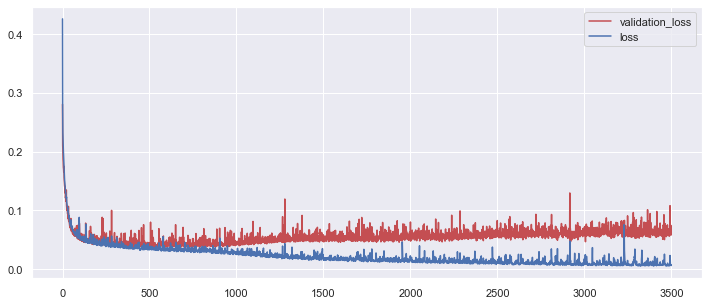

In [57]:
#그래프로 확인하기
vloss = fit_history.history['val_loss'] #테스트셋 loss
loss = fit_history.history['loss'] #학습셋

plt.figure(figsize = (12, 5))
epoch = np.arange(len(loss))
plt.plot(epoch, vloss, 'r', label = 'validation_loss')
plt.plot(epoch, loss, 'b', label = 'loss')
plt.legend(loc = 'best')
plt.show()
#결과: 과적합

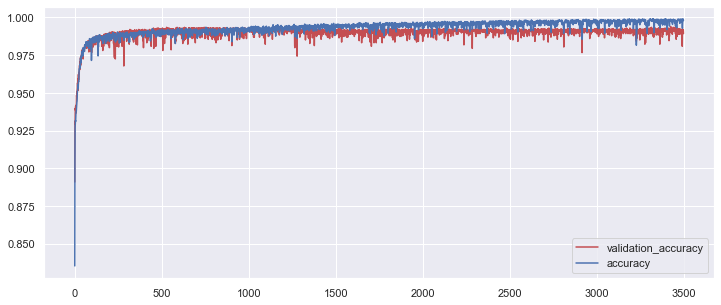

In [58]:
#그래프로 확인하기
vacc = fit_history.history['val_accuracy'] #테스트셋
acc = fit_history.history['accuracy'] #학습셋

plt.figure(figsize = (12, 5))
epoch = np.arange(len(loss))
plt.plot(epoch, vacc, 'r', label = 'validation_accuracy')
plt.plot(epoch, acc, 'b', label = 'accuracy')
plt.legend(loc = 'best')
plt.show()
#결과: 과적합

## 5.2 수행 2 : 과적합 회피

#### 과적합 피하는 방법
1. 학습과 동시에 테스트를 병행하여 진행 -> 테스트 데이터에 대해 loss가 증가하는 지점을 찾음 -> Early Stopping
2. 규제화 : Drop-out (학습 중에 일부의 노드를 제거)

#### 학습의 자동 중단
- 학습이 진행될수록 학습셋의 정확도는 올라가지만 과적합으로 인해 테스트셋의 정확도는 낮아짐(loss 증가)
- 테스트셋 오차가 줄지 않으면 학습을 멈추게 함

In [60]:
# 모델 설정
seed = 0
np.random.seed(seed)
tf.compat.v1.set_random_seed(seed)

model = Sequential()
#units: 은닉층 뉴런의 수 / input_dim: 입력 뉴런의 수(1차원) / activation: 은닉층의 activation
model.add(Dense(units = 30, input_dim = 12, activation = 'relu'))
model.add(Dense(units = 12, activation = 'relu'))
model.add(Dense(units = 8, activation = 'relu'))
model.add(Dense(units = 1, activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

#모델 저장 폴더 설정
MODEL_DIR = 'd:/Ai/WineModel/'
if not os.path.exists(MODEL_DIR):
     os.mkdir(MODEL_DIR) #디렉토리가 존재하지 않을 때 mkdir(make directory) -> 폴더 새로 생성

#모델 저장 조건 설정    
modelfile = MODEL_DIR + 'wine_best.h5'
checkpointer = ModelCheckpoint(filepath = modelfile, #ModelCheckpoint: 모델 저장에 필요한 함수
                               monitor = 'val_loss', verbose = 0,
                               save_best_only = True) 

#학습의 자동 중단 설정
early_stopping_callback = EarlyStopping(monitor = 'val_loss', patience = 1000)

fit_history = model.fit(X, Y, validation_split = 0.33, epochs = 15000, verbose = 0, batch_size = 500,
                        callbacks = [early_stopping_callback, checkpointer])

print("Accuracy: %.4f" % (model.evaluate(X, Y)[1]))

204/204 [==============================] - 0s 408us/step - loss: 0.0299 - accuracy: 0.9923
Accuracy: 0.9923


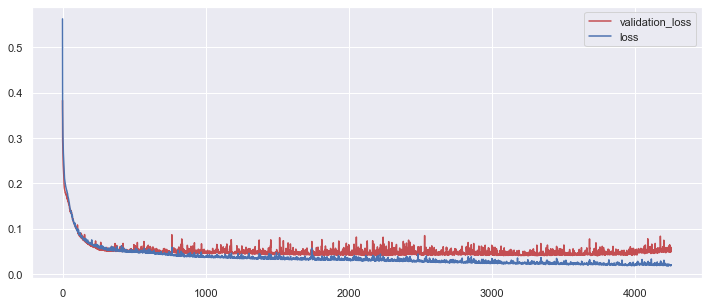

In [61]:
#그래프로 확인하기
vloss = fit_history.history['val_loss'] #테스트셋 loss
loss = fit_history.history['loss'] #학습셋

plt.figure(figsize = (12, 5))
epoch = np.arange(len(loss))
plt.plot(epoch, vloss, 'r', label = 'validation_loss')
plt.plot(epoch, loss, 'b', label = 'loss')
plt.legend(loc = 'best')
plt.show()
#결과: 과적합

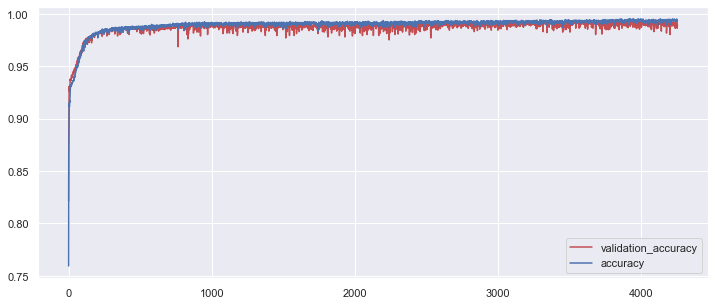

In [62]:
#그래프로 확인하기
vacc = fit_history.history['val_accuracy'] #테스트셋
acc = fit_history.history['accuracy'] #학습셋

plt.figure(figsize = (12, 5))
epoch = np.arange(len(loss))
plt.plot(epoch, vacc, 'r', label = 'validation_accuracy')
plt.plot(epoch, acc, 'b', label = 'accuracy')
plt.legend(loc = 'best')
plt.show()
#결과: 과적합

In [63]:
#최적 모델의 성능 평가
from tensorflow.keras.models import load_model

opt_model = load_model("d:/Ai/WineModel/wine_best.h5")
print("Accuracy: %.4f" % (opt_model.evaluate(X, Y)[1]))
#model은 과적합된 모델이고, 모든 데이터셋X(학습67%, 테스트 33%로 구성)로 평가하였으므로, opt_model의 성능이 약간 낮게 나옴.

204/204 [==============================] - 0s 379us/step - loss: 0.0288 - accuracy: 0.9917
Accuracy: 0.9917


# 6. MINIST Digits : 손글씨 숫자 인식
- Keras 제공
- 70,000개의 영상을 학습 데이터셋과 테스트 데이터 셋으로 분할하여 제공함

In [65]:
#minist data 읽어오기
from tensorflow.keras.datasets import mnist

(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
    
print('학습셋 이미지: %d 개' % (X_train.shape[0]))
print('테스트셋 이미지: %d 개' % (X_test.shape[0]))    

학습셋 이미지: 60000 개
테스트셋 이미지: 10000 개


In [66]:
#자료 확인
#이미지의 각 픽셀의 값 보기
for x in X_train[0]:
    for i in x:
        print("%3d"%i,end=' ')
    print()
    
X_train[0].shape

  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255 247 127   0   0   0   0 
  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0 
  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82  82  56  39   0   0   0   0   0 
  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 182 247 241   0   0   0   0   0   0 

(28, 28)

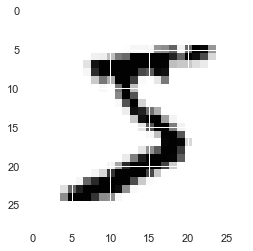

In [68]:
plt.imshow(X_train[0], cmap='Greys') #'Greys'는 0을 흰색으로
plt.show()

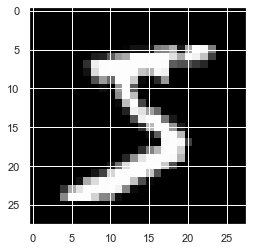

In [69]:
plt.imshow(X_train[0], cmap='gray') #'gray'는 0을 검정색으로 -> 디지털 영상
plt.show()

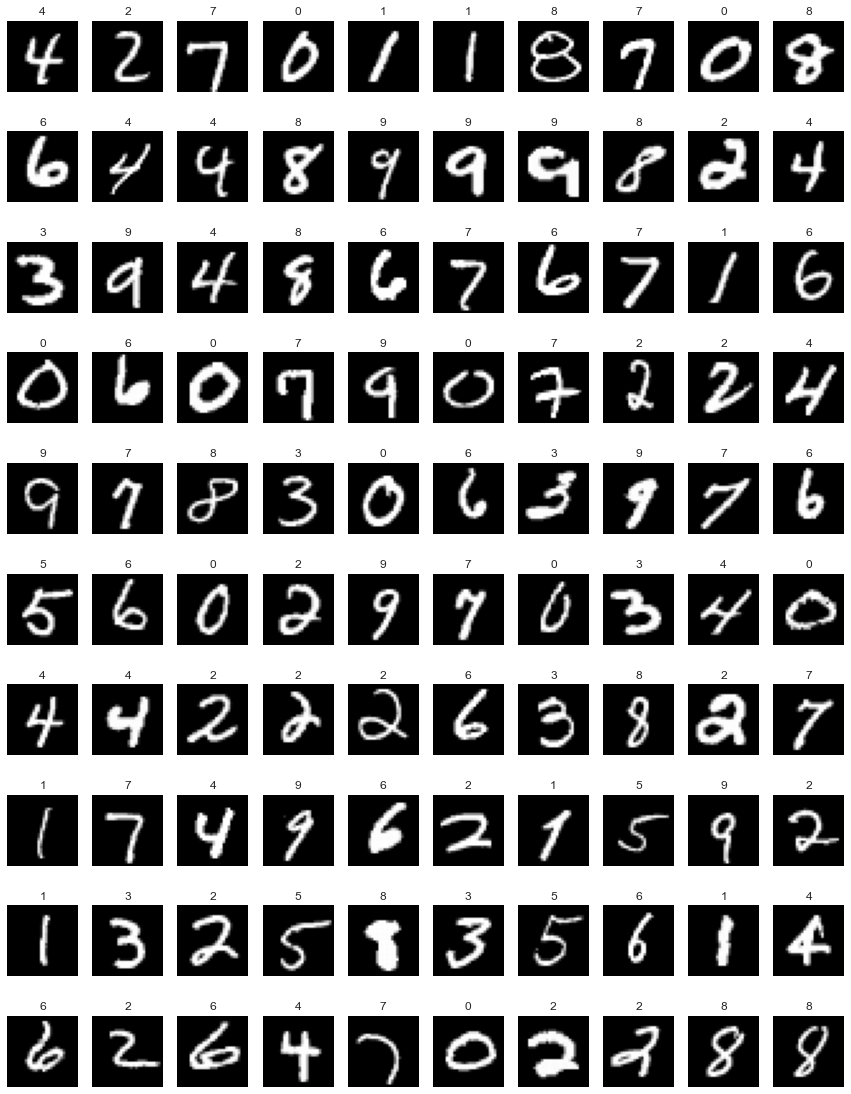

In [71]:
#랜덤하게 100개씩 자료 보기
import random
n_samples = 100
indices = random.sample(range(X_train.shape[0]), n_samples) #6만개 중 n_samples만큼 인덱스만 랜덤하게 추출

plt.figure(figsize=(15, 20))
for i, idx in enumerate(indices):
    plt.subplot(10,10, i+1)
    plt.imshow(X_train[idx], cmap='gray', vmin=0, vmax=255) #0을 검정색으로 #X_train = 이미지
    plt.title(Y_train[idx]) #Y_train = 정답
    plt.axis('off')
plt.show()
#실행할 때마다 다른 결과 출력

In [72]:
#자료 변환
#2차원 영상을 1차원 배열로 변환
X_train = X_train.reshape(X_train.shape[0], 784)

#0~255 값을 0~1사이 값으로 변환 -> Minmax 정규화
X_train = X_train.astype('float64') / 255
X_test = X_test.reshape(X_test.shape[0], 784).astype('float64') / 255

Y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [73]:
#딥러닝 프레임 설정
seed = 0
np.random.seed(seed)
tf.compat.v1.set_random_seed(seed)

model = Sequential()
#units: 은닉층 뉴런의 수 / input_dim: 입력 뉴런의 수(1차원) / activation: 은닉층의 activation
model.add(Dense(units = 512, input_dim = 784, activation = 'relu'))
model.add(Dense(units = 10, activation = 'softmax'))

model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
#sparse: 0이 많고 1이 적음 / One-hot encoding 필요없음

#모델 저장 폴더 설정
MODEL_DIR = 'd:/Ai/MnistModel/'
if not os.path.exists(MODEL_DIR):
     os.mkdir(MODEL_DIR) #디렉토리가 존재하지 않을 때 mkdir(make directory) -> 폴더 새로 생성

#모델 저장 조건 설정    
modelfile = MODEL_DIR + 'MNIST_digits_best_MLP.h5'
checkpointer = ModelCheckpoint(filepath = modelfile, #ModelCheckpoint: 모델 저장에 필요한 함수
                               monitor = 'val_loss', verbose = 0,
                               save_best_only = True) 

#학습의 자동 중단 설정
early_stopping_callback = EarlyStopping(monitor = 'val_loss', patience = 10)

fit_history = model.fit(X_train, Y_train, validation_data = (X_test, Y_test),
                        epochs = 50, batch_size = 200, verbose = 0,
                        callbacks = [early_stopping_callback, checkpointer])

In [74]:
#성능 평가
print('Training Accuracy:', model.evaluate(X_train, Y_train)[1])
print('Test Accuracy:', model.evaluate(X_test, Y_test)[1])

1875/1875 [==============================] - 2s 931us/step - loss: 0.0033 - accuracy: 0.9994
Training Accuracy: 0.9994333386421204
313/313 [==============================] - 0s 941us/step - loss: 0.0748 - accuracy: 0.9819
Test Accuracy: 0.9818999767303467


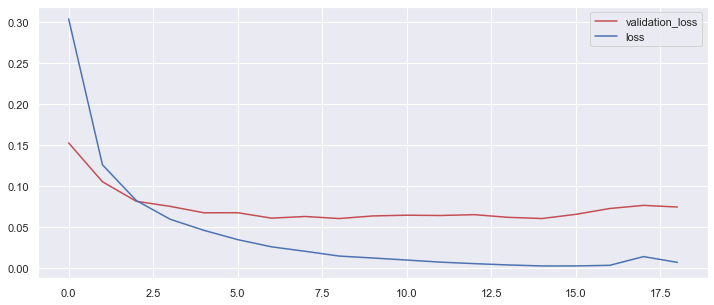

In [75]:
#그래프로 확인하기
vloss = fit_history.history['val_loss'] #테스트셋 loss
loss = fit_history.history['loss'] #학습셋

plt.figure(figsize = (12, 5))
epoch = np.arange(len(loss))
plt.plot(epoch, vloss, 'r', label = 'validation_loss')
plt.plot(epoch, loss, 'b', label = 'loss')
plt.legend(loc = 'best')
plt.show()

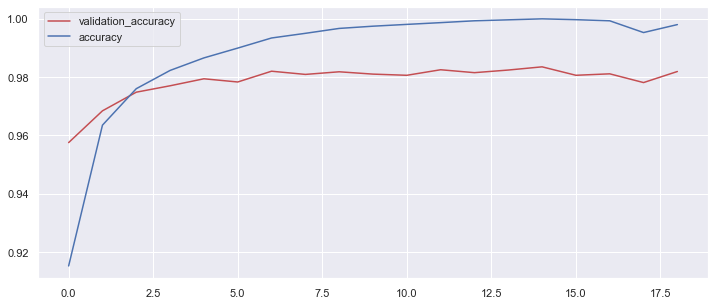

In [76]:
#그래프로 확인하기
vacc = fit_history.history['val_accuracy'] #테스트셋
acc = fit_history.history['accuracy'] #학습셋

plt.figure(figsize = (12, 5))
epoch = np.arange(len(loss))
plt.plot(epoch, vacc, 'r', label = 'validation_accuracy')
plt.plot(epoch, acc, 'b', label = 'accuracy')
plt.legend(loc = 'best')
plt.show()

In [84]:
#최적 모델의 성능 평가
from tensorflow.keras.models import load_model

opt_model = load_model("d:/Ai/MnistModel/MNIST_digits_best_MLP.h5")

def model_evaluate(model, X, Y):
    ypred = model.predict(X) #0~1 사이값 -> ypred.shape = (20, 10)
    ypred = np.argmax(ypred, axis = 1) #(20, 1) #최댓값 인덱스 추출
    return (Y == ypred).sum() / Y.shape[0] #맞춘 총 개수 / n -> 성능

print("Training Accuracy:", model_evaluate(opt_model, X_train, Y_train))
print("Test Accuracy:", model_evaluate(opt_model, X_test, Y_test))
#training은 opt_model의 성능이 약간 높게 나옴 / test는 아직 과적합이기 때문에 성능이 낮게 나옴

Training Accuracy: 0.9979833333333333
Test Accuracy: 0.9818


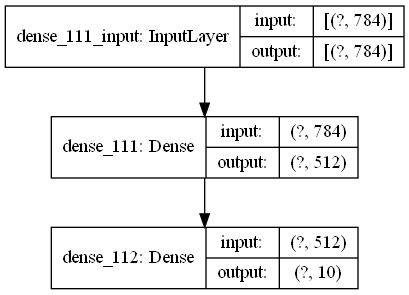

In [85]:
#신경망 구조 도식화
from tensorflow.keras.utils import plot_model
plot_model(model, to_file = 'D:/Ai/MnistModel/Digits_MLP_shapes.png', show_shapes = True)

# 7. Fashion MNIST
- 이미지 크기 : 28*28 (numpy array)
- 픽셀값은 0~255 사이
- label은 0~9까지의 정수 배열
- 값은 이미지에 있는 옷의 클래스(class)

In [86]:
#자료의 출력
from IPython.display import Image
Image(url="https://tensorflow.org/images/fashion-mnist-sprite.png")

In [87]:
#자료 로드
from tensorflow.keras.datasets.fashion_mnist import load_data

(train_images, train_labels), (test_images, test_labels) = load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [89]:
#데이터 탐색
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

train_images.shape

(60000, 28, 28)

In [90]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [91]:
test_images.shape

(10000, 28, 28)

In [92]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

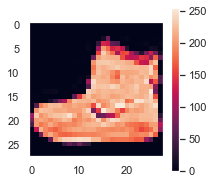

In [94]:
#이미지 시각화
plt.figure(figsize=(3, 3))
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()
#seaborn은 초록색, matplotlib은 빨강색

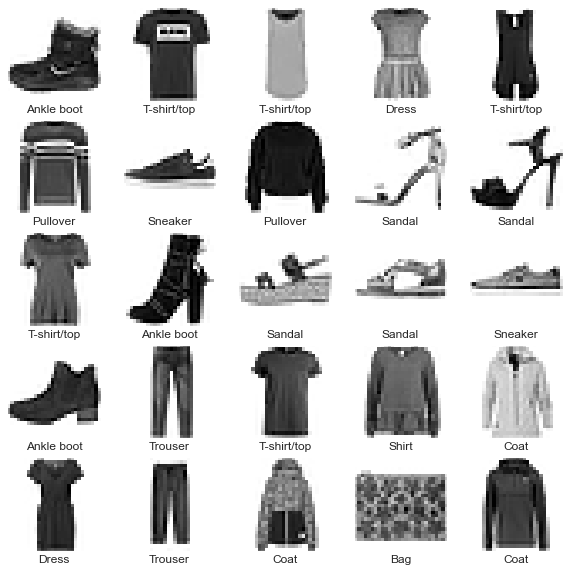

In [95]:
#이미지 시각화
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]]) #정답 -> 문자열로 출력
plt.show()

In [96]:
#One-hot encoding 및 정규화
#정규화(0~1)
train_images = train_images / 255.0
test_images = test_images / 255.0

#One-hot encoding
from tensorflow.keras.utils import to_categorical

Y_train = to_categorical(train_labels)
Y_test = to_categorical(test_labels)

Y_test[:10] #1개만 1, 나머지는 0 출력 -> 출력노드 10개가 한 행

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]], dtype=float32)

In [88]:
from tensorflow.keras.layers import Flatten #다차원->1차원 reshape

In [97]:
model = Sequential()
#units: 은닉층 뉴런의 수 / activation: 은닉층의 activation
model.add(Flatten(input_shape = (28, 28))) #reshape() 수행하지 않아도 됨
model.add(Dense(units = 128, activation = 'relu')) #input_dim = 28*28 넣지 않아도 됨
model.add(Dense(units = 10, activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model.fit(train_images, Y_train, epochs = 5)

print("학습 정확도:", model.evaluate(train_images, Y_train)[1])
print("테스트 정확도:", model.evaluate(test_images, Y_test)[1])

Epoch 1/5
1875/1875 [==============================] - 1s 615us/step - loss: 0.4985 - accuracy: 0.8242
Epoch 2/5
1875/1875 [==============================] - 1s 623us/step - loss: 0.3731 - accuracy: 0.8649
Epoch 3/5
1875/1875 [==============================] - 1s 607us/step - loss: 0.3341 - accuracy: 0.8778
Epoch 4/5
1875/1875 [==============================] - 1s 622us/step - loss: 0.3104 - accuracy: 0.8854
Epoch 5/5
1875/1875 [==============================] - 1s 492us/step - loss: 0.2859 - accuracy: 0.8952
학습 정확도: 0.8952333331108093
313/313 [==============================] - 0s 814us/step - loss: 0.3606 - accuracy: 0.8719
테스트 정확도: 0.8719000220298767


In [98]:
#예측 확인
pred = model.predict(test_images)
pred[0]

array([3.06416632e-06, 3.08525046e-07, 9.52516189e-07, 3.37092683e-06,
       4.90459024e-06, 1.01518445e-02, 6.56020711e-06, 5.30603863e-02,
       2.80582870e-04, 9.36487973e-01], dtype=float32)

In [99]:
np.argmax(pred[0])

9

In [100]:
test_labels[0]

9

In [101]:
#예측 결과 확인
np.argmax(pred[:30], axis = 1)

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7, 4, 5, 5, 3, 4, 1, 2, 2, 8, 0, 2, 5,
       7, 5, 1, 2, 6, 0, 9, 3], dtype=int64)

In [102]:
test_labels[:30]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7, 4, 5, 7, 3, 4, 1, 2, 4, 8, 0, 2, 5,
       7, 9, 1, 4, 6, 0, 9, 3], dtype=uint8)

In [103]:
#그림 그리기
def plot_image(i, pred_arr, true_label, img):
    pred_arr, true_label, img = pred_arr[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary) #영상 1장 출력 / grey로 출력

    pred_label = np.argmax(pred_arr)
    if pred_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[pred_label],
                                100*np.max(pred_arr),
                                class_names[true_label]),
                                color=color)

In [105]:
def plot_value_array(i, pred_arr, true_label):
    pred_arr, true_label = pred_arr[i], true_label[i]
    plt.grid(False)
    plt.yticks([])
    thisplot = plt.bar(range(10), pred_arr, color="#777777") #x축, y축, color : 회색
    plt.ylim([0, 1])
    pred_label = np.argmax(pred_arr)
    
    thisplot[pred_label].set_color('red')
    thisplot[true_label].set_color('blue')

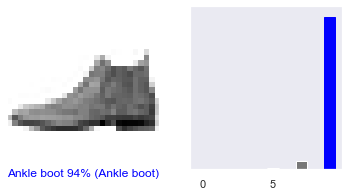

In [106]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, pred, test_labels, test_images)

plt.subplot(1,2,2)
plot_value_array(i, pred, test_labels)
plt.show()

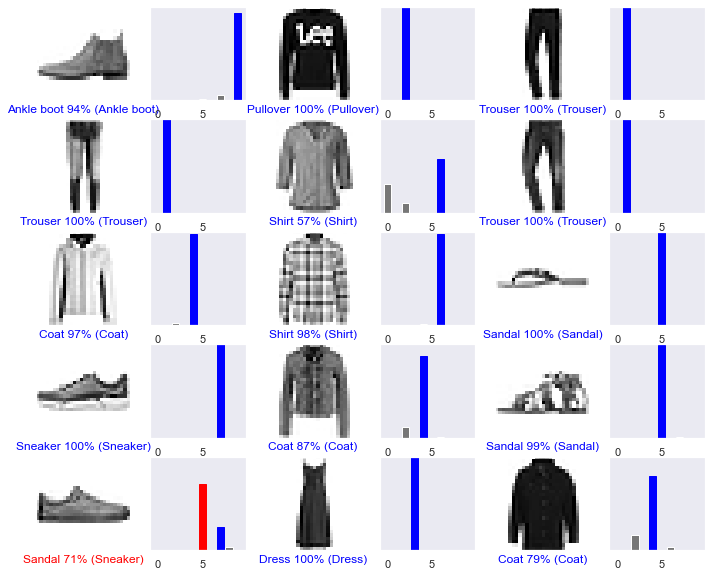

In [108]:
# 올바른 예측은 파랑색, 잘못된 예측은 빨강색
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, pred, test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, pred, test_labels)
plt.show()

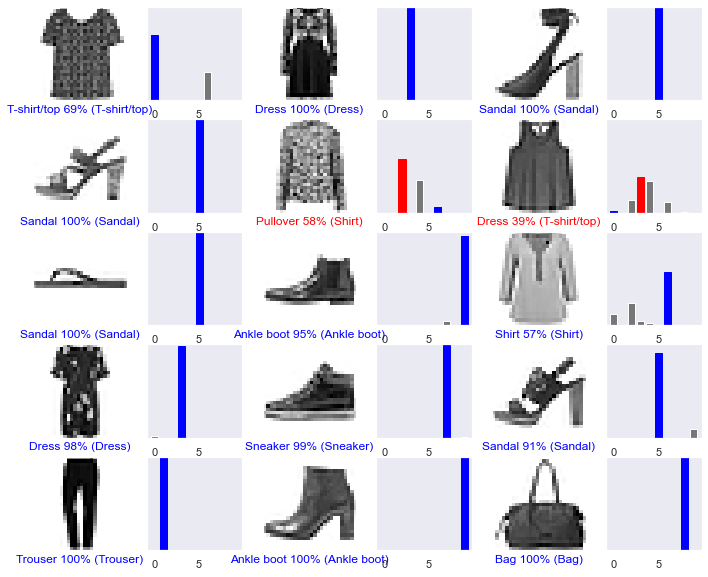

In [109]:
# 올바른 예측은 파랑색, 잘못된 예측은 빨강색 -> skip 하면 다른 사진 확인 가능
num_rows = 5
num_cols = 3
skip = 1000
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(skip + i, pred, test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(skip + i, pred, test_labels)
plt.show()

# <회귀 문제>
# 8. 보스턴 집값 예측
- 집값에 가장 큰 영향을 미치는 것이 '깨끗한 공기'라는 연구 결과
- 집값 변동에 영향을 미치는 요인을 모아서 집값의 변동을 보여주는 데이터셋 공개

In [110]:
#데이터 확인
from sklearn.datasets import load_boston
b_house = load_boston()

dir(b_house)

['DESCR', 'data', 'data_module', 'feature_names', 'filename', 'target']

In [111]:
house = pd.DataFrame(b_house.data, columns=b_house.feature_names)
house['Price'] = pd.Series(b_house.target)
house.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [116]:
house.to_csv("d:/Ai/house.csv")

In [113]:
#학습 데이터 준비
X = house.to_numpy()[:, :-1]
Y = house.to_numpy()[:, [-1]]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

X.shape, house.shape

((506, 13), (506, 14))

In [114]:
X_train.shape, X_test.shape, Y_train.shape

((354, 13), (152, 13), (354, 1))

## 수행1: 단층 퍼셉트론 구현
#### 다중 선형 회귀 결과와 비교

In [118]:
from sklearn.metrics import mean_squared_error

#20만 번 학습
#%%time
seed = 0
np.random.seed(seed)
tf.compat.v1.set_random_seed(seed)

#단층 퍼셉트론
model = Sequential()
#units: 은닉층 뉴런의 수 / input_dim: 입력 뉴런의 수(1차원)
model.add(Dense(units = 1, input_dim = 13)) #회귀 모델은 출력층 노드에 활성화 함수가 없음

model.compile(loss = 'mean_squared_error', optimizer = 'adam')

model.fit(X_train, Y_train, epochs = 200000, verbose = 0)

print(model.weights)
Y_pred = model.predict(X_train).flatten()
print('Train MSE=', mean_squared_error(Y_train.flatten(), Y_pred))

Y_pred = model.predict(X_test).flatten()
print('Test MSE=', mean_squared_error(Y_test.flatten(), Y_pred))
#numpyy = array([결과값]) -> 결과값:  y절편(b)
#array값들 -> 기울기(W)

[<tf.Variable 'dense_115/kernel:0' shape=(13, 1) dtype=float32, numpy=
array([[-1.2488449e-01],
       [ 4.1898821e-02],
       [ 1.1309659e-02],
       [ 2.5071719e+00],
       [-1.4851009e+01],
       [ 4.0079670e+00],
       [-9.7904988e-03],
       [-1.4777116e+00],
       [ 2.2912925e-01],
       [-1.0220862e-02],
       [-9.7695410e-01],
       [ 6.3449503e-03],
       [-4.7988757e-01]], dtype=float32)>, <tf.Variable 'dense_115/bias:0' shape=(1,) dtype=float32, numpy=array([35.332264], dtype=float32)>]
Train MSE= 20.02151178126192
Test MSE= 27.08347594299902


In [119]:
#80만 번 추가 학습
for epoch in range(300_000, 1_000_001, 100_000):
    print("===== Epochs:", epoch, "=====")
    model.fit(X_train, Y_train, epochs = 100000, verbose = 0)
    print(model.weights)
    
    Y_pred = model.predict(X_train).flatten()
    print('Train MSE=', mean_squared_error(Y_train.flatten(), Y_pred))

    Y_pred = model.predict(X_test).flatten()
    print('Test MSE=', mean_squared_error(Y_test.flatten(), Y_pred))
#단층 퍼셉트론으로 구성하면, 신경망의 가중치가 다중 선형 회귀 모델의 계수임

===== Epochs: 300000 =====
[<tf.Variable 'dense_115/kernel:0' shape=(13, 1) dtype=float32, numpy=
array([[-1.2736788e-01],
       [ 4.4511337e-02],
       [ 1.0911904e-02],
       [ 2.5599351e+00],
       [-1.5842929e+01],
       [ 3.8804810e+00],
       [-1.0214040e-02],
       [-1.4984486e+00],
       [ 2.3993884e-01],
       [-1.1333951e-02],
       [-1.0089700e+00],
       [ 7.8071197e-03],
       [-4.8019475e-01]], dtype=float32)>, <tf.Variable 'dense_115/bias:0' shape=(1,) dtype=float32, numpy=array([37.252106], dtype=float32)>]
Train MSE= 19.98520585484861
Test MSE= 27.249173544838552
===== Epochs: 400000 =====
[<tf.Variable 'dense_115/kernel:0' shape=(13, 1) dtype=float32, numpy=
array([[-1.27405912e-01],
       [ 4.44501974e-02],
       [ 1.15922792e-02],
       [ 2.55607724e+00],
       [-1.61106567e+01],
       [ 3.85186076e+00],
       [-1.00228190e-02],
       [-1.50560486e+00],
       [ 2.41916448e-01],
       [-1.13624865e-02],
       [-1.01647854e+00],
       [ 7.734945

KeyboardInterrupt: 

In [127]:
#예측 결과 확인(학습 셋)
#학습 정도를 판단하기 위해 학습 데이터에 대한 예측값과 실제값 비교
Y_pred = model.predict(X_train).flatten()
Y_true = Y_train.flatten()
for i in range(10):
    print("실제가격:", Y_true[i], '\t예상가격: ', Y_pred[i])

실제가격: 14.4 	예상가격:  15.688129
실제가격: 24.4 	예상가격:  25.19695
실제가격: 18.1 	예상가격:  17.947964
실제가격: 22.5 	예상가격:  22.061089
실제가격: 20.5 	예상가격:  20.373648
실제가격: 15.2 	예상가격:  15.647854
실제가격: 17.4 	예상가격:  18.593529
실제가격: 13.6 	예상가격:  13.99448
실제가격: 8.7 	예상가격:  10.254307
실제가격: 18.2 	예상가격:  18.986025


In [121]:
model.weights #현재까지 학습된 weights

[<tf.Variable 'dense_115/kernel:0' shape=(13, 1) dtype=float32, numpy=
 array([[-1.1520995e-01],
        [ 4.2307314e-02],
        [ 1.0234295e-02],
        [ 2.5108657e+00],
        [-1.6224186e+01],
        [ 3.8544316e+00],
        [-7.1576540e-03],
        [-1.5109771e+00],
        [ 2.4001080e-01],
        [-1.0059785e-02],
        [-1.0172905e+00],
        [ 4.2617233e-03],
        [-4.9630713e-01]], dtype=float32)>,
 <tf.Variable 'dense_115/bias:0' shape=(1,) dtype=float32, numpy=array([37.947243], dtype=float32)>]

## 수행2: DL Model

In [123]:
#모델 구성, 컴파일, 학습
seed = 0
np.random.seed(seed)
tf.compat.v1.set_random_seed(seed)

#단층 퍼셉트론
model = Sequential()
#units: 은닉층 뉴런의 수 / input_dim: 입력 뉴런의 수(1차원)
model.add(Dense(units = 32, input_dim = 13, activation = 'relu'))
model.add(Dense(units = 16, activation = 'relu'))
model.add(Dense(units = 16, activation = 'relu'))
model.add(Dense(units = 8, activation = 'relu'))
model.add(Dense(units = 1)) #출력층에는 activation 없음

model.compile(loss = 'mean_squared_error', optimizer = 'adam')

model.fit(X_train, Y_train, epochs = 20000, verbose = 0)

print(model.weights)
Y_pred = model.predict(X_train).flatten()
print('Train MSE=', mean_squared_error(Y_train.flatten(), Y_pred))

Y_pred = model.predict(X_test).flatten()
print('Test MSE=', mean_squared_error(Y_test.flatten(), Y_pred))

[<tf.Variable 'dense_121/kernel:0' shape=(13, 32) dtype=float32, numpy=
array([[-1.51919872e-01, -2.14293554e-01,  2.58457363e-02,
         4.47361469e-02, -1.66429687e+00,  1.25357819e+00,
        -2.43785167e+00,  1.25560808e+00,  3.33485222e+00,
        -2.73588419e-01,  1.57152343e+00, -6.01657927e-01,
         5.27687371e-02,  8.92777860e-01, -2.65014261e-01,
         9.49801803e-02,  3.02206278e-01,  8.94333899e-01,
        -3.86889368e-01,  8.03096712e-01,  3.09002829e+00,
        -2.04412293e+00,  1.65319860e-01,  5.32092214e-01,
         1.97342277e+00,  2.39011347e-02,  1.87331378e-01,
         1.06458318e+00,  1.40205789e+00,  1.83847427e-01,
        -7.01450646e-01,  1.47542095e+00],
       [-1.52358994e-01, -2.91744500e-01, -2.44159549e-01,
         1.96935534e-01,  3.15081447e-01,  1.05183296e-01,
         2.14652434e-01,  9.72816721e-02, -4.05646801e-01,
         7.76147842e-02, -2.48447955e-01, -7.13993981e-02,
         3.52091491e-01, -1.97943911e-01, -3.00498843e-01,


In [125]:
#성능 평가
#학습 정도를 판단하기 위해 학습 데이터에 대한 예측값과 실제값 비교
Y_pred = model.predict(X_train).flatten()
Y_true = Y_train.flatten()
for i in range(10):
    print("실제가격:", Y_true[i], '\t예상가격: ', Y_pred[i])

실제가격: 14.4 	예상가격:  15.688129
실제가격: 24.4 	예상가격:  25.19695
실제가격: 18.1 	예상가격:  17.947964
실제가격: 22.5 	예상가격:  22.061089
실제가격: 20.5 	예상가격:  20.373648
실제가격: 15.2 	예상가격:  15.647854
실제가격: 17.4 	예상가격:  18.593529
실제가격: 13.6 	예상가격:  13.99448
실제가격: 8.7 	예상가격:  10.254307
실제가격: 18.2 	예상가격:  18.986025


In [126]:
#성능 평가
#학습 정도를 판단하기 위해 학습 데이터에 대한 예측값과 실제값 비교
Y_pred = model.predict(X_test).flatten()
Y_true = Y_test.flatten()
for i in range(10):
    print("실제가격:", Y_true[i], '\t예상가격: ', Y_pred[i])
#층을 많이 넣는 것이 시간 줄일 수 있음

실제가격: 22.6 	예상가격:  16.693953
실제가격: 50.0 	예상가격:  21.844381
실제가격: 23.0 	예상가격:  25.051067
실제가격: 8.3 	예상가격:  10.481247
실제가격: 21.2 	예상가격:  20.626522
실제가격: 19.9 	예상가격:  20.899029
실제가격: 20.6 	예상가격:  24.894524
실제가격: 18.7 	예상가격:  21.240538
실제가격: 16.1 	예상가격:  18.646645
실제가격: 18.6 	예상가격:  13.580355


# 9. 타이타닉호 생존자 예측 (분류)

### 1. 문제 정의
### 2. 데이터 읽어오기

In [128]:
from IPython.display  import Image
Image(url= "https://static1.squarespace.com/static/5006453fe4b09ef2252ba068/t/5090b249e4b047ba54dfd258/1351660113175/TItanic-Survival-Infographic.jpg?format=1500w")

In [ ]:
train = pd.read_csv('d:/Ai/titanic/titanic_train.csv', index_col = 0)
test = pd.read_csv('d:/Ai/titanic/titanic_test.csv', index_col = 0)

In [267]:
# 데이터 확인
train.shape

(891, 11)

In [268]:
train.info()
# Survived: 생존유무, target 값 (0=사망, 1=생존)
# Pclass: 티켓 클래스 (1=1st, 2=2nd, 3=3rd)
# Embarked: C, Q, S (탑승 항구)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [269]:
train.tail()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [270]:
test.shape

(418, 10)

In [271]:
test.head()
# Survived field 없음(test이기 때문)

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [272]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB


In [273]:
# 결측값 확인
train.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [274]:
test.isnull().sum()

Pclass        0
Name          0
Sex           0
Age          86
SibSp         0
Parch         0
Ticket        0
Fare          1
Cabin       327
Embarked      0
dtype: int64

In [275]:
# 이상치 확인
train.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [276]:
test.describe()
# fare에 비교적 높은 값(512)이 있으나 이상치인지 실제로 높은 금액을 지불한 것인지는 확인되지 않음
# 따라서 이상치가 없는 것으로 판단한다.

,Pclass,Age,SibSp,Parch,Fare
count,418.000000,332.000000,418.000000,418.000000,417.000000
mean,2.265550,30.272590,0.447368,0.392344,35.627188
std,0.841838,14.181209,0.896760,0.981429,55.907576
min,1.000000,0.170000,0.000000,0.000000,0.000000
25%,1.000000,21.000000,0.000000,0.000000,7.895800
50%,3.000000,27.000000,0.000000,0.000000,14.454200
75%,3.000000,39.000000,1.000000,0.000000,31.500000
max,3.000000,76.000000,8.000000,9.000000,512.329200


In [277]:
# 칼럼별 범주형 자료 카테고리 확인
train.nunique()
# 칼럼별 unique 값의 수

Survived      2
Pclass        3
Name        891
Sex           2
Age          88
SibSp         7
Parch         7
Ticket      681
Fare        248
Cabin       147
Embarked      3
dtype: int64

In [278]:
train.Pclass.unique()
# 데이터에 고유값이 무엇이 있는지 알고 싶다면 unique 
#총 고유값의 수가 몇 개인지 알고 싶다면 nunique
# 값별로 데이터의 개수를 알고 싶다면 value_counts

array([3, 1, 2], dtype=int64)

In [279]:
train.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [280]:
# 함수 선연
def bar_chart(feature):
    survived=train[train['Survived']==1][feature].value_counts()
    dead=train[train['Survived']==0][feature].value_counts()
    df=pd.DataFrame([survived, dead])
    df.index=['Survived', 'Dead']
    df.plot(kind='bar', stacked=True, figsize=(10,5))
    plt.show()

In [281]:
train_test_data=[train, test]
def map_col(col, mapping_info):    # mapping_info에 dictionary
    for dataset in train_test_data:
        dataset[col]=dataset[col].map(mapping_info)

In [282]:
# 특성별 자료 확인 및 결측지 처리
# (1) survived
train.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

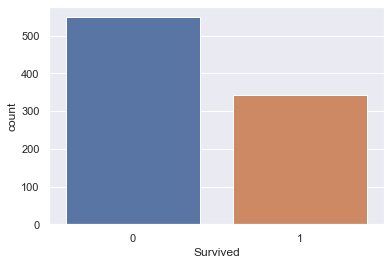

In [283]:
import seaborn as sns; sns.set()

sns.countplot(data=train, x='Survived')
plt.show()

In [284]:
# (2) Pclass
train.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

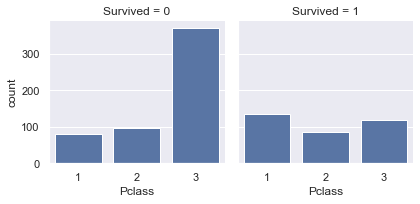

In [285]:
g=sns.FacetGrid(train, col='Survived')
g.map_dataframe(sns.countplot, x='Pclass')
# class 3의 사망자가 많으며, class 1 은 상대적으로 생존자가 많음

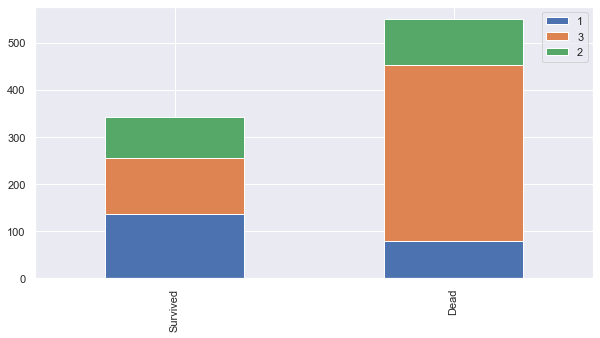

In [286]:
bar_chart('Pclass')

In [287]:
# (3) Sex
train.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

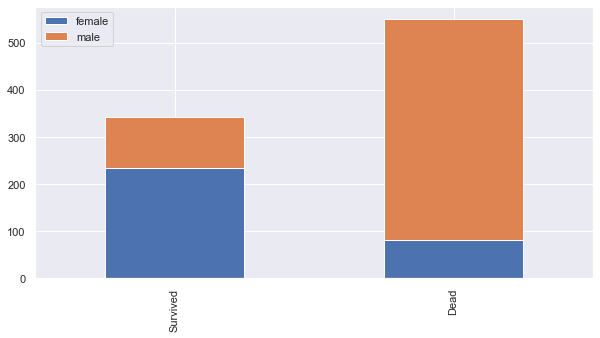

In [288]:
bar_chart('Sex')

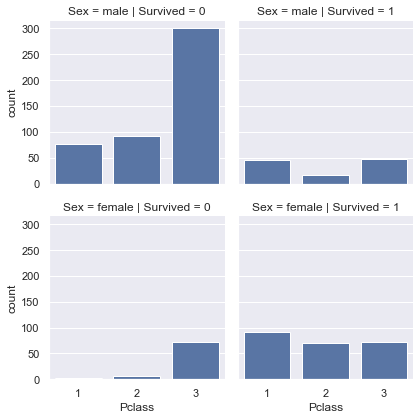

In [289]:
g=sns.FacetGrid(train, col='Survived', row='Sex')
g.map_dataframe(sns.countplot, x='Pclass')

In [290]:
# (4) Age
train.Age.isnull().sum()    # .isnull()은 null 감안하고 보겠다는 뜻

177

In [291]:
train.Age.mean()
# 평균연령은 30세 미만

29.69911764705882

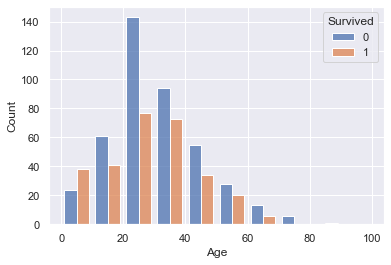

In [292]:
sns.histplot(data=train, x='Age', binrange=(0,100), bins=10,
             hue='Survived', multiple="dodge", shrink=.8)
plt.show()
# 10세 이하, 70세 이상의 생존율 높음

In [293]:
train.corr()
# Age와 Pclass 상관 관계가 가장 높음. 젊을 수록 class 3
# Age의 결측값 처리는 Feature Engineering에서....

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [294]:
# (5) SibSp
train.SibSp.describe()

count    891.000000
mean       0.523008
std        1.102743
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        8.000000
Name: SibSp, dtype: float64

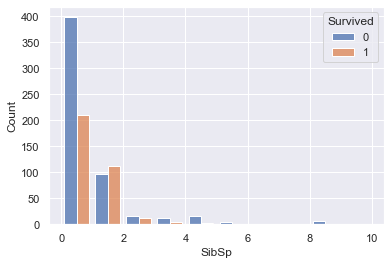

In [295]:
sns.histplot(data=train, x='SibSp', binrange=(0,10), bins=10,
              hue='Survived', multiple="dodge", shrink=.8)
plt.show()
# 혼자 탑승하거나 (형제, 배우자) 1명을 동반한 승객의 사망 비율이 높다.

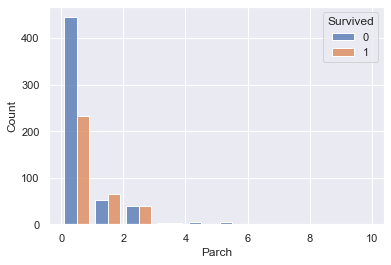

In [296]:
# Parch
sns.histplot(data=train, x='Parch', binrange=(0,10), bins=10,
              hue='Survived', multiple="dodge", shrink=.8)
plt.show()

# multiple ="stack" : 이걸 이용하면 bin 별로 해당하는 수가 색이 다르게 표현되어 쌓인다.
# multiple = "dodge" : 이걸 사용하면 그룹별로 bin이 겹치지 않는다. 

In [297]:
# Fare
train.Fare.isnull().sum()

0

In [298]:
test.Fare.isnull().sum()

1

In [299]:
train.Fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [300]:
# Fare의 min이 0.0이므로, 0.0의 자료를 찾아봄.
train[train.Fare==0.0]['Fare'].count()

15

In [301]:
import numpy as np
np.where(train.Fare==0.0)

(array([179, 263, 271, 277, 302, 413, 466, 481, 597, 633, 674, 732, 806,
        815, 822], dtype=int64),)

In [302]:
na_list=list(np.where(train.Fare == 0.0)[0])    # np.where(): 인덱스 반환
train.iloc[na_list]    # 인덱스 번호를 사용해 데이터프레임 분리하기

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
180,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,NaN,S
264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,B94,S
272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,NaN,S
278,0,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,0.0,NaN,S
303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,NaN,S
414,0,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,0.0,NaN,S
467,0,2,"Campbell, Mr. William",male,NaN,0,0,239853,0.0,NaN,S
482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,0.0,NaN,S
598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0,NaN,S


In [303]:
train.iloc[na_list]['Pclass'].value_counts()

2    6
1    5
3    4
Name: Pclass, dtype: int64

In [304]:
train['Fare']=train['Fare'].replace(0.0, np.nan)
test['Fare']=test['Fare'].replace(0.0, np.nan)
train.iloc[na_list]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
180,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,NaN,NaN,S
264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,NaN,B94,S
272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,NaN,NaN,S
278,0,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,NaN,NaN,S
303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,NaN,NaN,S
414,0,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,NaN,NaN,S
467,0,2,"Campbell, Mr. William",male,NaN,0,0,239853,NaN,NaN,S
482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,NaN,NaN,S
598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,NaN,NaN,S


In [305]:
# Fare가 0.0인 것을 각 class의 median으로 채워줌
# fillna(): 데이터 결측치 처리(전처리)
train["Fare"].fillna(train.groupby("Pclass")["Fare"].transform("median"), inplace=True)
test["Fare"].fillna(test.groupby("Pclass")["Fare"].transform("median"), inplace=True)
train.iloc[na_list]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
180,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,8.0500,NaN,S
264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,61.9792,B94,S
272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,8.0500,NaN,S
278,0,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,15.0229,NaN,S
303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,8.0500,NaN,S
414,0,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,15.0229,NaN,S
467,0,2,"Campbell, Mr. William",male,NaN,0,0,239853,15.0229,NaN,S
482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,15.0229,NaN,S
598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,8.0500,NaN,S


In [306]:
train['Fare_Category']= pd.cut(train['Fare'], bins=[0.0, 7.9, 14.5, 31.0, 520],
                               labels=['Low', 'Mid', 'High_Mid', 'High'])
# DataFrame.cut()
# 수치형 데이터를 범주형 데이터로 바꿔주는 것
# Parameter
# bins: 구간(속성값), int형으로 입력한다.
# labels: 구간에 대한 범주 이름(속성에 대한 이름), int 형으로 입력한다.

In [307]:
np.where(train.Fare_Category.isnull()==True)

(array([], dtype=int64),)

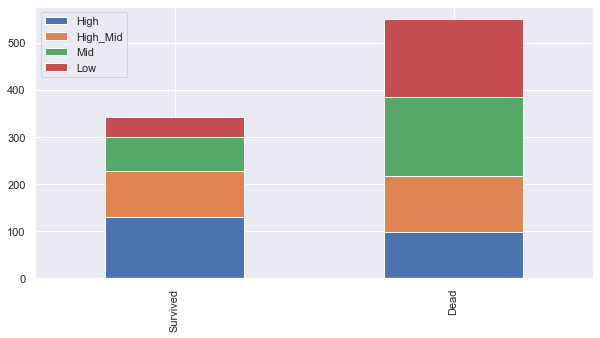

In [308]:
bar_chart('Fare_Category')

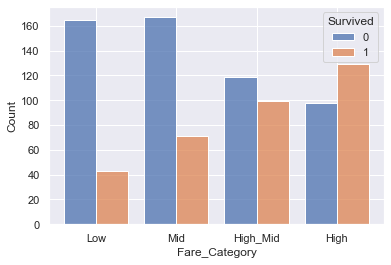

In [309]:
sns.histplot(data=train, x='Fare_Category', hue='Survived',
             multiple="dodge", shrink=.8)
plt.show()

In [310]:
# (8) Cabin
train.Cabin.value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64

In [311]:
train.Cabin.unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [312]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Fare_Category
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Low
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,High
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Mid
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,High
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mid


In [313]:
train.Cabin = train.Cabin.str[:1]
test.Cabin = test.Cabin.str[:1]
train.Cabin.unique()
# object 형식은 indexing 할 수 없으므로 str 형식으로 바꿔준다.
# str 형식으로 나온 A,B, C (첫번째 글자)를 저장한다.

array([nan, 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

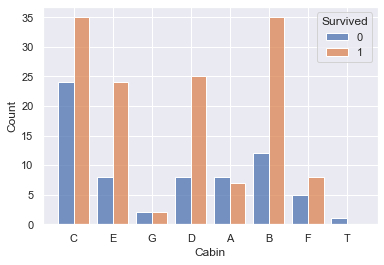

In [314]:
sns.histplot(data=train, x='Cabin', hue='Survived',

             multiple="dodge", shrink=.8)
plt.show()

In [315]:
train.Cabin.isnull().sum()

687

In [316]:
# scaling하여 mapping
cabin_mapping = {"A": 0, "B": 0.4, "C": 0.8, "D": 1.2, 
                 "E": 1.6, "F": 2, "G": 2.4, "T": 2.8}
train.Cabin = train.Cabin.map(cabin_mapping)
test.Cabin =  test.Cabin.map(cabin_mapping)
train["Cabin"].fillna(train.groupby("Pclass")["Cabin"].transform("median"), inplace=True)
test["Cabin"].fillna(test.groupby("Pclass")["Cabin"].transform("median"), inplace=True)

In [468]:
train.Cabin.isnull().sum(), test.Cabin.isnull().sum()

(0, 0)

In [318]:
# (9) Embarked
train.Embarked.isnull().sum(), test.Embarked.isnull().sum()

(2, 0)

In [319]:
train.Embarked.value_counts(), test.Embarked.value_counts()

(S    644
 C    168
 Q     77
 Name: Embarked, dtype: int64,
 S    270
 C    102
 Q     46
 Name: Embarked, dtype: int64)

In [320]:
train.Embarked = train.Embarked.fillna('S')
train.Embarked.isnull().sum()

0

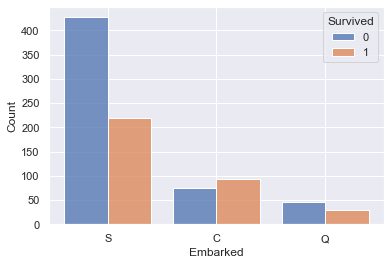

In [321]:
sns.histplot(data=train, x='Embarked', hue='Survived',
             multiple="dodge", shrink=.8)
plt.show()

### Feature Engineering
- 특성 공학: 칼럼에 연산 등을 통해서 의미있는 새로운 정보를 추출하는 분야

In [322]:
# Family Size 속성 추가
train['FamilySize'] = train.Parch + train.SibSp + 1
test['FamilySize'] = test.Parch + test.SibSp + 1

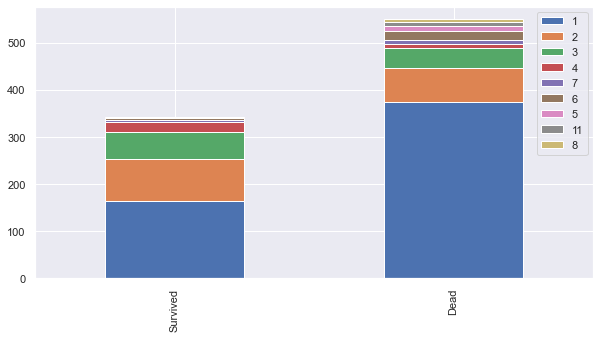

In [323]:
bar_chart('FamilySize')

In [324]:
# scaling
family_mapping = {1: 0, 2: 0.4, 3: 0.8, 4: 1.2, 5: 1.6,
                  6: 2, 7: 2.4, 8: 2.8, 9: 3.2, 10: 3.6, 11: 4}
map_col("FamilySize", family_mapping)
train.FamilySize.value_counts()

0.0    537
0.4    161
0.8    102
1.2     29
2.0     22
1.6     15
2.4     12
4.0      7
2.8      6
Name: FamilySize, dtype: int64

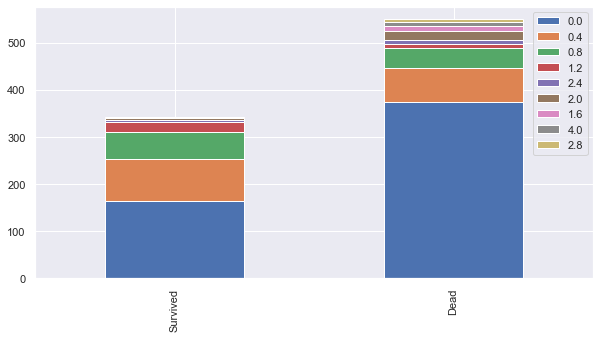

In [325]:
bar_chart('FamilySize')

In [326]:
# 범주 데이터를 숫자로 맵핑
# Embarked를 수치로 매핑
e_mapping={'S':0, 'C':1, 'Q':2}
map_col("Embarked", e_mapping)

In [327]:
# 성별 데이터를 숫자로 맵핑
s_map = {"male": 0, "female": 1}
map_col("Sex", s_map)

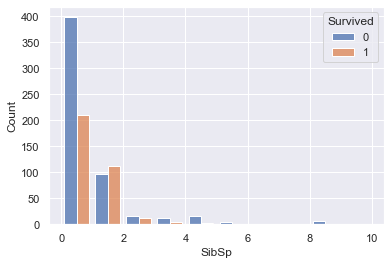

In [328]:
sns.histplot(data=train, x='SibSp', binrange=(0,10), bins=10,
              hue='Survived', multiple="dodge", shrink=.8)
plt.show()
# 혼자 탑승하거나 (형제, 배우자) 1명을 동반한 승객의 사망 비율이 높다.

In [329]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Fare_Category,FamilySize
PassengerId,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,2.0,0,Low,0.4
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,0.8,1,High,0.4
3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,2.0,0,Mid,0.0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0.8,0,High,0.4
5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,2.0,0,Mid,0.0


In [330]:
# Name
train.Name.unique()

array(['Braund, Mr. Owen Harris',
       'Cumings, Mrs. John Bradley (Florence Briggs Thayer)',
       'Heikkinen, Miss. Laina',
       'Futrelle, Mrs. Jacques Heath (Lily May Peel)',
       'Allen, Mr. William Henry', 'Moran, Mr. James',
       'McCarthy, Mr. Timothy J', 'Palsson, Master. Gosta Leonard',
       'Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)',
       'Nasser, Mrs. Nicholas (Adele Achem)',
       'Sandstrom, Miss. Marguerite Rut', 'Bonnell, Miss. Elizabeth',
       'Saundercock, Mr. William Henry', 'Andersson, Mr. Anders Johan',
       'Vestrom, Miss. Hulda Amanda Adolfina',
       'Hewlett, Mrs. (Mary D Kingcome) ', 'Rice, Master. Eugene',
       'Williams, Mr. Charles Eugene',
       'Vander Planke, Mrs. Julius (Emelia Maria Vandemoortele)',
       'Masselmani, Mrs. Fatima', 'Fynney, Mr. Joseph J',
       'Beesley, Mr. Lawrence', 'McGowan, Miss. Anna "Annie"',
       'Sloper, Mr. William Thompson', 'Palsson, Miss. Torborg Danira',
       'Asplund, Mrs. Carl Oscar 

In [331]:
train_test_data = [train, test]  # combining train and test dataset

# 이름에서 title만 추출하여 Title feature 생성
for dataset in train_test_data:
    dataset['Title'] = dataset['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
# return a Series if expand=False. (True이면 DataFrame 반환)
# [A-Za-z]+[A-Za-z] 문자가 1개 이상 반복

In [332]:
train['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: Title, dtype: int64

In [333]:
train.Title.value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: Title, dtype: int64

In [334]:
test.Title.value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: Title, dtype: int64

In [335]:
# Title map
# Mr:0
# Miss:1
# Mrs:2
# Others:3
print(train.Title.unique(), test.Title.unique())

['Mr' 'Mrs' 'Miss' 'Master' 'Don' 'Rev' 'Dr' 'Mme' 'Ms' 'Major' 'Lady'
 'Sir' 'Mlle' 'Col' 'Capt' 'Countess' 'Jonkheer'] ['Mr' 'Mrs' 'Miss' 'Master' 'Ms' 'Col' 'Rev' 'Dr' 'Dona']


In [336]:
title_mapping = {'Mr': 0, 'Miss':1, 'Mrs':2, 
                 'Master': 3, 'Don':3, 'Rev':3,  'Dr':3,  
                 'Mme':3, 'Ms':3, 'Major':3, 'Lady':3,
                 'Sir':3, 'Mlle':3, 'Col':3, 'Capt':3, 
                'Countess':3, 'Jonkheer':3, 'Dona':3}
map_col("Title", title_mapping)
print(train.Title.unique(), "\n",
      test.Title.unique(), "\n",
      train.Title.value_counts(), "\n",
      test.Title.value_counts())

[0 2 1 3] 
 [0 2 1 3] 
 0    517
1    182
2    125
3     67
Name: Title, dtype: int64 
 0    240
1     78
2     72
3     28
Name: Title, dtype: int64


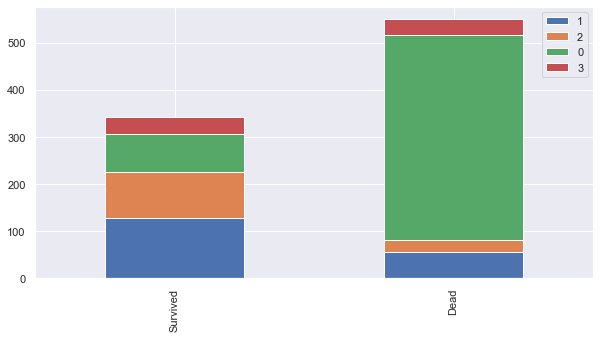

In [337]:
bar_chart('Title')

In [338]:
# "Name"열 삭제
train.drop('Name', axis=1, inplace=True)
test.drop('Name', axis=1, inplace=True)

In [339]:
train.shape, test.shape

((891, 13), (418, 11))

In [340]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Fare_Category,FamilySize,Title
PassengerId,,,,,,,,,,,,,
1,0,3,0,22.0,1,0,A/5 21171,7.2500,2.0,0,Low,0.4,0
2,1,1,1,38.0,1,0,PC 17599,71.2833,0.8,1,High,0.4,2
3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,2.0,0,Mid,0.0,1
4,1,1,1,35.0,1,0,113803,53.1000,0.8,0,High,0.4,2
5,0,3,0,35.0,0,0,373450,8.0500,2.0,0,Mid,0.0,0


In [341]:
test.head()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Title
PassengerId,,,,,,,,,,,
892,3,0,34.5,0,0,330911,7.8292,NaN,2,0.0,0
893,3,1,47.0,1,0,363272,7.0000,NaN,0,0.4,2
894,2,0,62.0,0,0,240276,9.6875,NaN,2,0.0,0
895,3,0,27.0,0,0,315154,8.6625,NaN,0,0.0,0
896,3,1,22.0,1,1,3101298,12.2875,NaN,0,0.8,2


In [342]:
# Age 결측값 처리
# Title을 기준으로 중앙값 사용
train.Age.isnull().sum(), test.Age.isnull().sum()

(177, 86)

In [343]:
train['AgeMedian'] = train.groupby("Title")["Age"].transform("median")    # ?["Age"].median()
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Fare_Category,FamilySize,Title,AgeMedian
PassengerId,,,,,,,,,,,,,,
1,0,3,0,22.0,1,0,A/5 21171,7.2500,2.0,0,Low,0.4,0,30.0
2,1,1,1,38.0,1,0,PC 17599,71.2833,0.8,1,High,0.4,2,35.0
3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,2.0,0,Mid,0.0,1,21.0
4,1,1,1,35.0,1,0,113803,53.1000,0.8,0,High,0.4,2,35.0
5,0,3,0,35.0,0,0,373450,8.0500,2.0,0,Mid,0.0,0,30.0


In [345]:
train["Age"].fillna(train.groupby("Title")["Age"].transform("median"), inplace=True)
test["Age"].fillna(test.groupby("Title")["Age"].transform("median"), inplace=True)
train.head(20)

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Fare_Category,FamilySize,Title,AgeMedian
PassengerId,,,,,,,,,,,,,,
1,0,3,0,22.0,1,0,A/5 21171,7.2500,2.0,0,Low,0.4,0,30.0
2,1,1,1,38.0,1,0,PC 17599,71.2833,0.8,1,High,0.4,2,35.0
3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,2.0,0,Mid,0.0,1,21.0
4,1,1,1,35.0,1,0,113803,53.1000,0.8,0,High,0.4,2,35.0
5,0,3,0,35.0,0,0,373450,8.0500,2.0,0,Mid,0.0,0,30.0
6,0,3,0,30.0,0,0,330877,8.4583,2.0,2,Mid,0.0,0,30.0
7,0,1,0,54.0,0,0,17463,51.8625,1.6,0,High,0.0,0,30.0
8,0,3,0,2.0,3,1,349909,21.0750,2.0,0,High_Mid,1.6,3,9.0
9,1,3,1,27.0,0,2,347742,11.1333,2.0,0,Mid,0.8,2,35.0


In [ ]:
# 범위에 따라 카테고리화
# binning: 연속적은 값으로 큰 의미를 찾기 어려울 때, 값을 구간화하여 카테고리화 하는 것
# Age
# child:0 (age<=16)
# young: 1 (16<age<=26)
# adult: 2 (26<age<=36)
# mid-age: 3 (36<age<=62)
# senior: 4 (62<age<=100)
# pandas.cut(bins[1,2,3,4] indicate(1,2], (2,3], (3,4])

In [404]:
train['Age_Category'] = pd.cut(train['Age'], bins=[0,16,26,36,62,100],
                              labels=[0,1,2,3,4])

In [405]:
test['Age_Category'] = pd.cut(test['Age'], bins=[0,16,26,36,62,100],
                              labels=[0,1,2,3,4])

In [406]:
test.head(10)

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Title,Age_Category,Fare_Category
PassengerId,,,,,,,,,,,,,
892,3,0,34.5,0,0,330911,7.8292,NaN,2,0.0,0,2,0
893,3,1,47.0,1,0,363272,7.0000,NaN,0,0.4,2,3,0
894,2,0,62.0,0,0,240276,9.6875,NaN,2,0.0,0,3,0
895,3,0,27.0,0,0,315154,8.6625,NaN,0,0.0,0,2,0
896,3,1,22.0,1,1,3101298,12.2875,NaN,0,0.8,2,1,0
897,3,0,14.0,0,0,7538,9.2250,NaN,0,0.0,0,0,0
898,3,1,30.0,0,0,330972,7.6292,NaN,2,0.0,1,2,0
899,2,0,26.0,1,1,248738,29.0000,NaN,0,0.8,0,1,1
900,3,1,18.0,0,0,2657,7.2292,NaN,1,0.0,2,1,0


In [407]:
# Fare
# 0.0<fare<=14 : 0
# 14<fare<=30 : 1
# 30<fare<=100 : 2
# 100<fare<=14 : 3

train['Fare_Category'] = pd.cut(train['Fare'], 
                                bins=[0,14,30,100,1000],
                                labels=[0,1,2,3])
test['Fare_Category'] = pd.cut(test['Fare'], 
                               bins=[0,14,30,100,1000],
                               labels=[0,1,2,3])
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Fare_Category,FamilySize,Title,AgeMedian,Age_Category
PassengerId,,,,,,,,,,,,,,,
1,0,3,0,22.0,1,0,A/5 21171,7.2500,2.0,0,0,0.4,0,30.0,1
2,1,1,1,38.0,1,0,PC 17599,71.2833,0.8,1,2,0.4,2,35.0,3
3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,2.0,0,0,0.0,1,21.0,1
4,1,1,1,35.0,1,0,113803,53.1000,0.8,0,2,0.4,2,35.0,2
5,0,3,0,35.0,0,0,373450,8.0500,2.0,0,0,0.0,0,30.0,2


In [408]:
train.Fare.describe()

count    891.000000
mean      32.689318
std       49.611639
min        4.012500
25%        7.925000
50%       14.500000
75%       31.275000
max      512.329200
Name: Fare, dtype: float64

In [450]:
# 모델 적용
# (1) 종속변수와 독립 변수 설정
X_features = ['Pclass', 'Sex', 'Age_Category', 'Fare_Category',
             'Cabin', 'Embarked', 'Title', 'FamilySize']
X_train = train[X_features]
X_test = test[X_features]
Y_train=train['Survived']

In [470]:
X_test.isnull().sum()

Pclass           0
Sex              0
Age_Category     0
Fare_Category    0
Cabin            0
Embarked         0
Title            0
FamilySize       0
dtype: int64

In [471]:
X_train.shape

(891, 8)

In [454]:
# Import Classifier Modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

In [455]:
from sklearn.model_selection import KFold, cross_val_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)
def getScore(clf):
    score=cross_val_score(clf, X_train, Y_train,
                          cv=k_fold, n_jobs=1, scoring='accuracy')
    return score

In [456]:
# 교차 검증
scores=pd.DataFrame([
    getScore(KNeighborsClassifier(n_neighbors=13)),
    getScore(DecisionTreeClassifier(random_state=0)),
    getScore(RandomForestClassifier(n_estimators=13, random_state=0)),
    getScore(GaussianNB()),
    getScore(SVC(gamma='auto')),
    getScore(MLPClassifier(solver='sgd', activation='logistic',
                           hidden_layer_sizes=(48,16),
                           random_state=1, max_iter=200000))],
    index = ['KNN', 'DT', 'RF', 'NB', 'SVM', 'MLP_s'])

In [457]:
scores

,0,1,2,3,4,5,6,7,8,9
KNN,0.788889,0.786517,0.808989,0.831461,0.853933,0.808989,0.842697,0.797753,0.831461,0.853933
DT,0.777778,0.775281,0.786517,0.775281,0.876404,0.752809,0.808989,0.808989,0.741573,0.775281
RF,0.833333,0.786517,0.786517,0.808989,0.876404,0.808989,0.808989,0.786517,0.764045,0.775281
NB,0.855556,0.741573,0.752809,0.752809,0.707865,0.808989,0.764045,0.808989,0.853933,0.820225
SVM,0.833333,0.786517,0.820225,0.820225,0.842697,0.808989,0.831461,0.853933,0.842697,0.853933
MLP_s,0.566667,0.662921,0.651685,0.595506,0.696629,0.651685,0.595506,0.651685,0.561798,0.528090


In [458]:
# (3) ANN 모델: k_fold cross validation 결과 추가 & train data 학습
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [459]:
X=X_train.to_numpy()
Y=Y_train.to_numpy().reshape(-1,1)

In [460]:
from sklearn.model_selection import StratifiedKFold

n_fold = 10
skf=StratifiedKFold(n_splits=n_fold, shuffle=True,
                    random_state=0)

accuracy_list=[]
for train_index, test_index in skf.split(X, Y):
    model=Sequential()
    model.add(Dense(units=48, input_dim=8, activation='relu')) 
    model.add(Dense(units= 24, activation='relu'))
    model.add(Dense(units= 1, activation='sigmoid'))    
    model.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])
    
    Xtrain, Xtest = X[train_index], X[test_index]
    Ytrain, Ytest = Y[train_index], Y[test_index]
    model.fit(Xtrain, Ytrain, epochs=100, batch_size=10, verbose=0)
    
    accuracy_list.append(model.evaluate(Xtest, Ytest)[1])

3/3 [==============================] - 0s 4ms/step - loss: 0.4750 - accuracy: 0.8315


In [461]:
print(n_fold, "-fold accuracy: ", accuracy_list)
print('\nAverage Accuracy: ', np.array(accuracy_list).mean())

10 -fold accuracy:  [0.8444444537162781, 0.8764045238494873, 0.8089887499809265, 0.8539325594902039, 0.8089887499809265, 0.8539325594902039, 0.7752808928489685, 0.7752808928489685, 0.7865168452262878, 0.8314606547355652]

Average Accuracy:  0.8215230882167817


In [462]:
scores.loc['MLP_tf']=np.array(accuracy_list)
scores

,0,1,2,3,4,5,6,7,8,9
KNN,0.788889,0.786517,0.808989,0.831461,0.853933,0.808989,0.842697,0.797753,0.831461,0.853933
DT,0.777778,0.775281,0.786517,0.775281,0.876404,0.752809,0.808989,0.808989,0.741573,0.775281
RF,0.833333,0.786517,0.786517,0.808989,0.876404,0.808989,0.808989,0.786517,0.764045,0.775281
NB,0.855556,0.741573,0.752809,0.752809,0.707865,0.808989,0.764045,0.808989,0.853933,0.820225
SVM,0.833333,0.786517,0.820225,0.820225,0.842697,0.808989,0.831461,0.853933,0.842697,0.853933
MLP_s,0.566667,0.662921,0.651685,0.595506,0.696629,0.651685,0.595506,0.651685,0.561798,0.528090
MLP_tf,0.844444,0.876405,0.808989,0.853933,0.808989,0.853933,0.775281,0.775281,0.786517,0.831461


In [463]:
scores['Mean']=np.around(scores.mean(axis=1)*100,2)
scores

,0,1,2,3,4,5,6,7,8,9,Mean
KNN,0.788889,0.786517,0.808989,0.831461,0.853933,0.808989,0.842697,0.797753,0.831461,0.853933,82.05
DT,0.777778,0.775281,0.786517,0.775281,0.876404,0.752809,0.808989,0.808989,0.741573,0.775281,78.79
RF,0.833333,0.786517,0.786517,0.808989,0.876404,0.808989,0.808989,0.786517,0.764045,0.775281,80.36
NB,0.855556,0.741573,0.752809,0.752809,0.707865,0.808989,0.764045,0.808989,0.853933,0.820225,78.67
SVM,0.833333,0.786517,0.820225,0.820225,0.842697,0.808989,0.831461,0.853933,0.842697,0.853933,82.94
MLP_s,0.566667,0.662921,0.651685,0.595506,0.696629,0.651685,0.595506,0.651685,0.561798,0.528090,61.62
MLP_tf,0.844444,0.876405,0.808989,0.853933,0.808989,0.853933,0.775281,0.775281,0.786517,0.831461,82.15


In [472]:
# (4) 예측
def getPredict(clf):
    global X_train, Y_train, X_test
    clf.fit(X_train, Y_train)
    return clf.predict(X_test)

In [473]:
prediction=pd.DataFrame({
    'KNN': getPredict(KNeighborsClassifier(n_neighbors=13)),
    'DT': getPredict(DecisionTreeClassifier()),
    'RF': getPredict(RandomForestClassifier(n_estimators=13)),
    'NB': getPredict(GaussianNB()),
    'SVM': getPredict(SVC(gamma='auto'))
})

In [474]:
prediction.head(20)

,KNN,DT,RF,NB,SVM
0,0,0,0,0,0
1,0,0,0,1,1
2,0,0,0,0,0
3,0,0,0,0,0
4,0,1,1,1,1
5,0,0,0,0,0
6,1,0,0,1,1
7,0,0,0,0,0
8,1,1,1,1,1
9,0,0,0,0,0


In [475]:
prediction['Survived_ML'] = (prediction.sum(axis=1)>2)*1
prediction.head()

,KNN,DT,RF,NB,SVM,Survived_ML
0,0,0,0,0,0,0
1,0,0,0,1,1,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,1,1,1,1,1


In [476]:
# ANN 모델 제대로 학습
model=Sequential()
model.add(Dense(units=48, input_dim=8, activation='relu')) 
model.add(Dense(units= 24, activation='relu'))
model.add(Dense(units= 1, activation='sigmoid'))    
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.fit(X, Y, epochs=5000, batch_size=10, verbose=0)
    
print("Train accuracy: ", model.evaluate(X,Y)[1])
print("y_pred: ", model.predict(X).reshape(-1,)[:30])

28/28 [==============================] - 0s 769us/step - loss: 0.2267 - accuracy: 0.9012
Train accuracy:  0.9012345671653748
y_pred:  [2.7657121e-01 1.0000000e+00 4.9596539e-01 1.0000000e+00 1.2716851e-01
 2.1045524e-01 2.8873447e-07 1.3708472e-03 9.9999702e-01 1.0000000e+00
 9.9930978e-01 9.9999833e-01 6.9617778e-02 3.6530074e-31 4.9646404e-01
 9.9630141e-01 4.4730094e-24 1.0984802e-01 7.8275716e-01 9.9902892e-01
 6.8280995e-03 9.8939908e-01 1.0000000e+00 2.5803405e-01 8.9895725e-04
 4.6105409e-01 1.0328475e-01 8.8189811e-38 7.7074575e-01 1.2716851e-01]


In [477]:
prediction['MLP_TF'] = model.predict(X_test).reshape(-1,)
prediction['Survived_TF'] = (prediction['MLP_TF'] > 0.5).astype(int)
prediction.head()

,KNN,DT,RF,NB,SVM,Survived_ML,MLP_TF,Survived_TF
0,0,0,0,0,0,0,2.104552e-01,0
1,0,0,0,1,1,0,2.336183e-02,0
2,0,0,0,0,0,0,2.679044e-08,0
3,0,0,0,0,0,0,1.271685e-01,0
4,0,1,1,1,1,1,1.000000e+00,1


In [478]:
(prediction.Survived_ML != prediction.Survived_TF).sum()

42

In [479]:
mis_idx=list(np.where(prediction.Survived_ML!= prediction.Survived_TF)[0])
print(mis_idx)

[6, 16, 19, 33, 36, 37, 39, 41, 72, 73, 84, 86, 87, 98, 138, 142, 146, 157, 169, 181, 197, 199, 200, 206, 225, 264, 268, 280, 284, 287, 291, 305, 339, 345, 347, 354, 367, 369, 376, 383, 405, 412]


In [480]:
prediction.iloc[mis_idx, :] #  ,: 은 모든 열을 의미

,KNN,DT,RF,NB,SVM,Survived_ML,MLP_TF,Survived_TF
6,1,0,0,1,1,1,4.842579e-03,0
16,0,0,0,0,0,0,1.000000e+00,1
19,0,0,1,1,1,1,9.707022e-02,0
33,0,0,0,1,0,0,8.825717e-01,1
36,1,0,1,1,1,1,4.959654e-01,0
37,1,0,1,1,1,1,4.959654e-01,0
39,0,1,1,0,0,0,7.456259e-01,1
41,1,0,1,0,0,0,5.070890e-01,1
72,1,0,0,1,1,1,4.234945e-01,0
73,1,0,1,0,0,0,9.998404e-01,1


In [481]:
# 10. Submission
submission = pd.DataFrame({
    "PassengerId": test.index,
    "Survived": prediction['Survived_ML']
})
submission.tail()

,PassengerId,Survived
413,1305,0
414,1306,1
415,1307,0
416,1308,0
417,1309,1


In [482]:
submission.to_csv('D:/Ai/Titanic/submission.csv', index=False)

In [267]:
# 데이터 확인
train.shape

(891, 11)

In [268]:
train.info()
# Survived: 생존유무, target 값 (0=사망, 1=생존)
# Pclass: 티켓 클래스 (1=1st, 2=2nd, 3=3rd)
# Embarked: C, Q, S (탑승 항구)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [269]:
train.tail()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [270]:
test.shape

(418, 10)

In [271]:
test.head()
# Survived field 없음(test이기 때문)

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [272]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB


In [273]:
# 결측값 확인
train.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [274]:
test.isnull().sum()

Pclass        0
Name          0
Sex           0
Age          86
SibSp         0
Parch         0
Ticket        0
Fare          1
Cabin       327
Embarked      0
dtype: int64

In [275]:
# 이상치 확인
train.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [276]:
test.describe()
# fare에 비교적 높은 값(512)이 있으나 이상치인지 실제로 높은 금액을 지불한 것인지는 확인되지 않음
# 따라서 이상치가 없는 것으로 판단한다.

,Pclass,Age,SibSp,Parch,Fare
count,418.000000,332.000000,418.000000,418.000000,417.000000
mean,2.265550,30.272590,0.447368,0.392344,35.627188
std,0.841838,14.181209,0.896760,0.981429,55.907576
min,1.000000,0.170000,0.000000,0.000000,0.000000
25%,1.000000,21.000000,0.000000,0.000000,7.895800
50%,3.000000,27.000000,0.000000,0.000000,14.454200
75%,3.000000,39.000000,1.000000,0.000000,31.500000
max,3.000000,76.000000,8.000000,9.000000,512.329200


In [277]:
# 칼럼별 범주형 자료 카테고리 확인
train.nunique()
# 칼럼별 unique 값의 수

Survived      2
Pclass        3
Name        891
Sex           2
Age          88
SibSp         7
Parch         7
Ticket      681
Fare        248
Cabin       147
Embarked      3
dtype: int64

In [278]:
train.Pclass.unique()
# 데이터에 고유값이 무엇이 있는지 알고 싶다면 unique 
#총 고유값의 수가 몇 개인지 알고 싶다면 nunique
# 값별로 데이터의 개수를 알고 싶다면 value_counts

array([3, 1, 2], dtype=int64)

In [279]:
train.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [280]:
# 함수 선연
def bar_chart(feature):
    survived=train[train['Survived']==1][feature].value_counts()
    dead=train[train['Survived']==0][feature].value_counts()
    df=pd.DataFrame([survived, dead])
    df.index=['Survived', 'Dead']
    df.plot(kind='bar', stacked=True, figsize=(10,5))
    plt.show()

In [281]:
train_test_data=[train, test]
def map_col(col, mapping_info):    # mapping_info에 dictionary
    for dataset in train_test_data:
        dataset[col]=dataset[col].map(mapping_info)

In [282]:
# 특성별 자료 확인 및 결측지 처리
# (1) survived
train.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

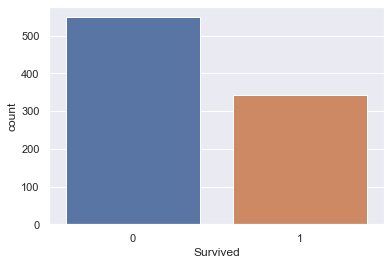

In [283]:
import seaborn as sns; sns.set()

sns.countplot(data=train, x='Survived')
plt.show()

In [284]:
# (2) Pclass
train.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

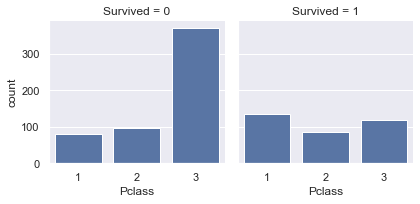

In [285]:
g=sns.FacetGrid(train, col='Survived')
g.map_dataframe(sns.countplot, x='Pclass')
# class 3의 사망자가 많으며, class 1 은 상대적으로 생존자가 많음

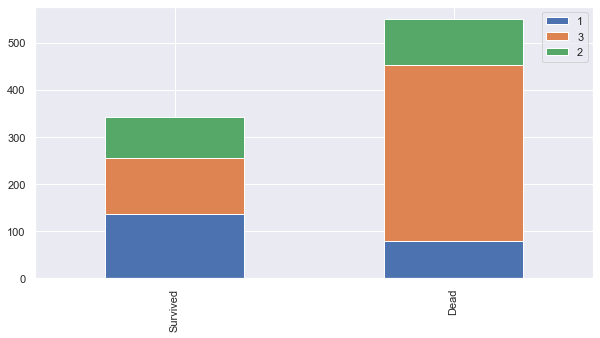

In [286]:
bar_chart('Pclass')

In [287]:
# (3) Sex
train.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

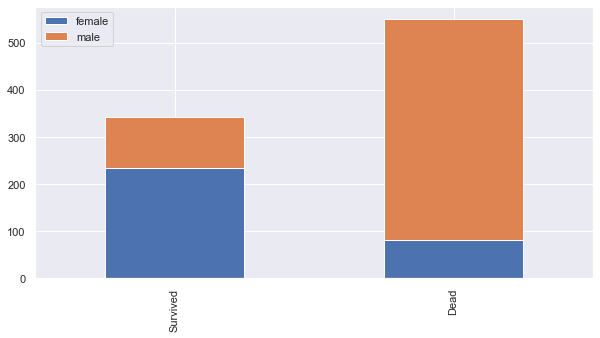

In [288]:
bar_chart('Sex')

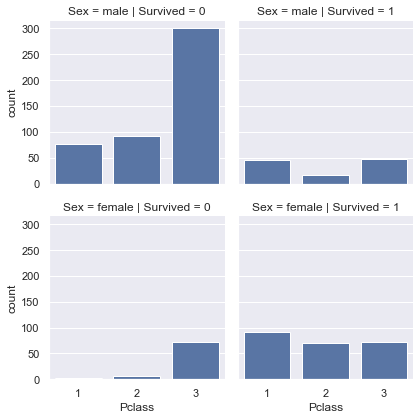

In [289]:
g=sns.FacetGrid(train, col='Survived', row='Sex')
g.map_dataframe(sns.countplot, x='Pclass')

In [290]:
# (4) Age
train.Age.isnull().sum()    # .isnull()은 null 감안하고 보겠다는 뜻

177

In [291]:
train.Age.mean()
# 평균연령은 30세 미만

29.69911764705882

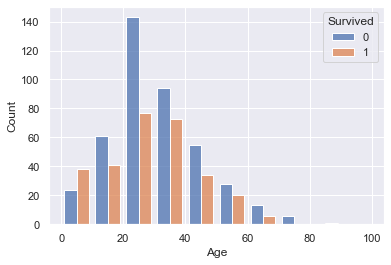

In [292]:
sns.histplot(data=train, x='Age', binrange=(0,100), bins=10,
             hue='Survived', multiple="dodge", shrink=.8)
plt.show()
# 10세 이하, 70세 이상의 생존율 높음

In [293]:
train.corr()
# Age와 Pclass 상관 관계가 가장 높음. 젊을 수록 class 3
# Age의 결측값 처리는 Feature Engineering에서....

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [294]:
# (5) SibSp
train.SibSp.describe()

count    891.000000
mean       0.523008
std        1.102743
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        8.000000
Name: SibSp, dtype: float64

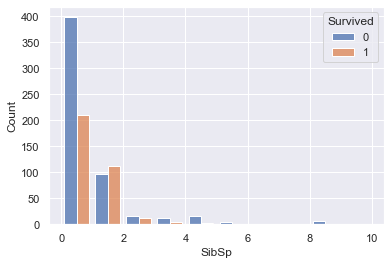

In [295]:
sns.histplot(data=train, x='SibSp', binrange=(0,10), bins=10,
              hue='Survived', multiple="dodge", shrink=.8)
plt.show()
# 혼자 탑승하거나 (형제, 배우자) 1명을 동반한 승객의 사망 비율이 높다.

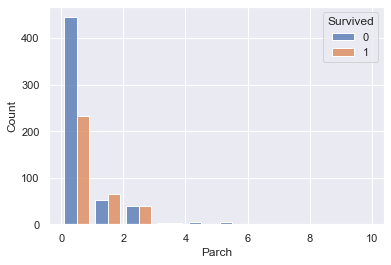

In [296]:
# Parch
sns.histplot(data=train, x='Parch', binrange=(0,10), bins=10,
              hue='Survived', multiple="dodge", shrink=.8)
plt.show()

# multiple ="stack" : 이걸 이용하면 bin 별로 해당하는 수가 색이 다르게 표현되어 쌓인다.
# multiple = "dodge" : 이걸 사용하면 그룹별로 bin이 겹치지 않는다. 

In [297]:
# Fare
train.Fare.isnull().sum()

0

In [298]:
test.Fare.isnull().sum()

1

In [299]:
train.Fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [300]:
# Fare의 min이 0.0이므로, 0.0의 자료를 찾아봄.
train[train.Fare==0.0]['Fare'].count()

15

In [301]:
import numpy as np
np.where(train.Fare==0.0)

(array([179, 263, 271, 277, 302, 413, 466, 481, 597, 633, 674, 732, 806,
        815, 822], dtype=int64),)

In [302]:
na_list=list(np.where(train.Fare == 0.0)[0])    # np.where(): 인덱스 반환
train.iloc[na_list]    # 인덱스 번호를 사용해 데이터프레임 분리하기

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
180,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,NaN,S
264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,B94,S
272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,NaN,S
278,0,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,0.0,NaN,S
303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,NaN,S
414,0,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,0.0,NaN,S
467,0,2,"Campbell, Mr. William",male,NaN,0,0,239853,0.0,NaN,S
482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,0.0,NaN,S
598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0,NaN,S


In [303]:
train.iloc[na_list]['Pclass'].value_counts()

2    6
1    5
3    4
Name: Pclass, dtype: int64

In [304]:
train['Fare']=train['Fare'].replace(0.0, np.nan)
test['Fare']=test['Fare'].replace(0.0, np.nan)
train.iloc[na_list]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
180,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,NaN,NaN,S
264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,NaN,B94,S
272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,NaN,NaN,S
278,0,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,NaN,NaN,S
303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,NaN,NaN,S
414,0,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,NaN,NaN,S
467,0,2,"Campbell, Mr. William",male,NaN,0,0,239853,NaN,NaN,S
482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,NaN,NaN,S
598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,NaN,NaN,S


In [305]:
# Fare가 0.0인 것을 각 class의 median으로 채워줌
# fillna(): 데이터 결측치 처리(전처리)
train["Fare"].fillna(train.groupby("Pclass")["Fare"].transform("median"), inplace=True)
test["Fare"].fillna(test.groupby("Pclass")["Fare"].transform("median"), inplace=True)
train.iloc[na_list]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
180,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,8.0500,NaN,S
264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,61.9792,B94,S
272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,8.0500,NaN,S
278,0,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,15.0229,NaN,S
303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,8.0500,NaN,S
414,0,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,15.0229,NaN,S
467,0,2,"Campbell, Mr. William",male,NaN,0,0,239853,15.0229,NaN,S
482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,15.0229,NaN,S
598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,8.0500,NaN,S


In [306]:
train['Fare_Category']= pd.cut(train['Fare'], bins=[0.0, 7.9, 14.5, 31.0, 520],
                               labels=['Low', 'Mid', 'High_Mid', 'High'])
# DataFrame.cut()
# 수치형 데이터를 범주형 데이터로 바꿔주는 것
# Parameter
# bins: 구간(속성값), int형으로 입력한다.
# labels: 구간에 대한 범주 이름(속성에 대한 이름), int 형으로 입력한다.

In [307]:
np.where(train.Fare_Category.isnull()==True)

(array([], dtype=int64),)

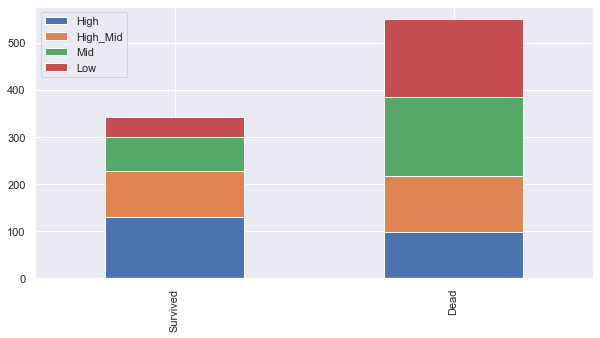

In [308]:
bar_chart('Fare_Category')

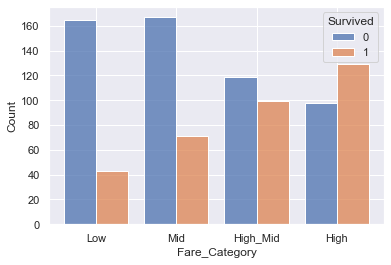

In [309]:
sns.histplot(data=train, x='Fare_Category', hue='Survived',
             multiple="dodge", shrink=.8)
plt.show()

In [310]:
# (8) Cabin
train.Cabin.value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64

In [311]:
train.Cabin.unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [312]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Fare_Category
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Low
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,High
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Mid
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,High
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mid


In [313]:
train.Cabin = train.Cabin.str[:1]
test.Cabin = test.Cabin.str[:1]
train.Cabin.unique()
# object 형식은 indexing 할 수 없으므로 str 형식으로 바꿔준다.
# str 형식으로 나온 A,B, C (첫번째 글자)를 저장한다.

array([nan, 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

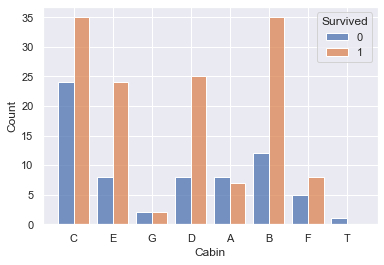

In [314]:
sns.histplot(data=train, x='Cabin', hue='Survived',

             multiple="dodge", shrink=.8)
plt.show()

In [315]:
train.Cabin.isnull().sum()

687

In [316]:
# scaling하여 mapping
cabin_mapping = {"A": 0, "B": 0.4, "C": 0.8, "D": 1.2, 
                 "E": 1.6, "F": 2, "G": 2.4, "T": 2.8}
train.Cabin = train.Cabin.map(cabin_mapping)
test.Cabin =  test.Cabin.map(cabin_mapping)
train["Cabin"].fillna(train.groupby("Pclass")["Cabin"].transform("median"), inplace=True)
test["Cabin"].fillna(test.groupby("Pclass")["Cabin"].transform("median"), inplace=True)

In [468]:
train.Cabin.isnull().sum(), test.Cabin.isnull().sum()

(0, 0)

In [318]:
# (9) Embarked
train.Embarked.isnull().sum(), test.Embarked.isnull().sum()

(2, 0)

In [319]:
train.Embarked.value_counts(), test.Embarked.value_counts()

(S    644
 C    168
 Q     77
 Name: Embarked, dtype: int64,
 S    270
 C    102
 Q     46
 Name: Embarked, dtype: int64)

In [320]:
train.Embarked = train.Embarked.fillna('S')
train.Embarked.isnull().sum()

0

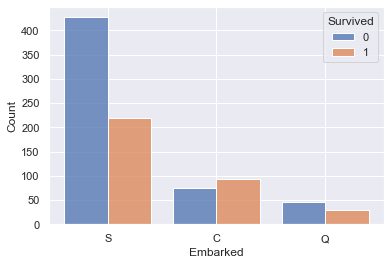

In [321]:
sns.histplot(data=train, x='Embarked', hue='Survived',
             multiple="dodge", shrink=.8)
plt.show()

### Feature Engineering
- 특성 공학: 칼럼에 연산 등을 통해서 의미있는 새로운 정보를 추출하는 분야

In [322]:
# Family Size 속성 추가
train['FamilySize'] = train.Parch + train.SibSp + 1
test['FamilySize'] = test.Parch + test.SibSp + 1

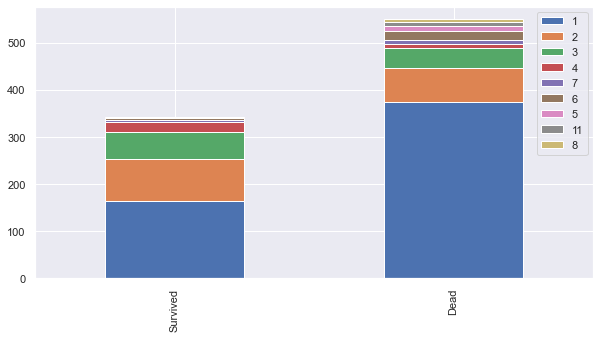

In [323]:
bar_chart('FamilySize')

In [324]:
# scaling
family_mapping = {1: 0, 2: 0.4, 3: 0.8, 4: 1.2, 5: 1.6,
                  6: 2, 7: 2.4, 8: 2.8, 9: 3.2, 10: 3.6, 11: 4}
map_col("FamilySize", family_mapping)
train.FamilySize.value_counts()

0.0    537
0.4    161
0.8    102
1.2     29
2.0     22
1.6     15
2.4     12
4.0      7
2.8      6
Name: FamilySize, dtype: int64

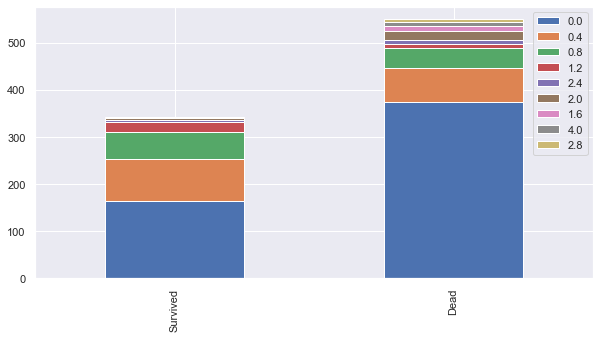

In [325]:
bar_chart('FamilySize')

In [326]:
# 범주 데이터를 숫자로 맵핑
# Embarked를 수치로 매핑
e_mapping={'S':0, 'C':1, 'Q':2}
map_col("Embarked", e_mapping)

In [327]:
# 성별 데이터를 숫자로 맵핑
s_map = {"male": 0, "female": 1}
map_col("Sex", s_map)

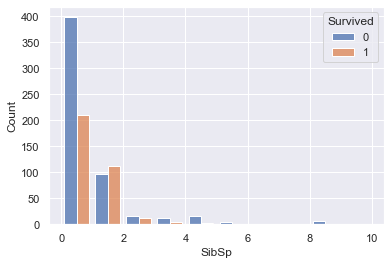

In [328]:
sns.histplot(data=train, x='SibSp', binrange=(0,10), bins=10,
              hue='Survived', multiple="dodge", shrink=.8)
plt.show()
# 혼자 탑승하거나 (형제, 배우자) 1명을 동반한 승객의 사망 비율이 높다.

In [329]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Fare_Category,FamilySize
PassengerId,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,2.0,0,Low,0.4
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,0.8,1,High,0.4
3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,2.0,0,Mid,0.0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0.8,0,High,0.4
5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,2.0,0,Mid,0.0


In [330]:
# Name
train.Name.unique()

array(['Braund, Mr. Owen Harris',
       'Cumings, Mrs. John Bradley (Florence Briggs Thayer)',
       'Heikkinen, Miss. Laina',
       'Futrelle, Mrs. Jacques Heath (Lily May Peel)',
       'Allen, Mr. William Henry', 'Moran, Mr. James',
       'McCarthy, Mr. Timothy J', 'Palsson, Master. Gosta Leonard',
       'Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)',
       'Nasser, Mrs. Nicholas (Adele Achem)',
       'Sandstrom, Miss. Marguerite Rut', 'Bonnell, Miss. Elizabeth',
       'Saundercock, Mr. William Henry', 'Andersson, Mr. Anders Johan',
       'Vestrom, Miss. Hulda Amanda Adolfina',
       'Hewlett, Mrs. (Mary D Kingcome) ', 'Rice, Master. Eugene',
       'Williams, Mr. Charles Eugene',
       'Vander Planke, Mrs. Julius (Emelia Maria Vandemoortele)',
       'Masselmani, Mrs. Fatima', 'Fynney, Mr. Joseph J',
       'Beesley, Mr. Lawrence', 'McGowan, Miss. Anna "Annie"',
       'Sloper, Mr. William Thompson', 'Palsson, Miss. Torborg Danira',
       'Asplund, Mrs. Carl Oscar 

In [331]:
train_test_data = [train, test]  # combining train and test dataset

# 이름에서 title만 추출하여 Title feature 생성
for dataset in train_test_data:
    dataset['Title'] = dataset['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
# return a Series if expand=False. (True이면 DataFrame 반환)
# [A-Za-z]+[A-Za-z] 문자가 1개 이상 반복

In [332]:
train['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: Title, dtype: int64

In [333]:
train.Title.value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: Title, dtype: int64

In [334]:
test.Title.value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: Title, dtype: int64

In [335]:
# Title map
# Mr:0
# Miss:1
# Mrs:2
# Others:3
print(train.Title.unique(), test.Title.unique())

['Mr' 'Mrs' 'Miss' 'Master' 'Don' 'Rev' 'Dr' 'Mme' 'Ms' 'Major' 'Lady'
 'Sir' 'Mlle' 'Col' 'Capt' 'Countess' 'Jonkheer'] ['Mr' 'Mrs' 'Miss' 'Master' 'Ms' 'Col' 'Rev' 'Dr' 'Dona']


In [336]:
title_mapping = {'Mr': 0, 'Miss':1, 'Mrs':2, 
                 'Master': 3, 'Don':3, 'Rev':3,  'Dr':3,  
                 'Mme':3, 'Ms':3, 'Major':3, 'Lady':3,
                 'Sir':3, 'Mlle':3, 'Col':3, 'Capt':3, 
                'Countess':3, 'Jonkheer':3, 'Dona':3}
map_col("Title", title_mapping)
print(train.Title.unique(), "\n",
      test.Title.unique(), "\n",
      train.Title.value_counts(), "\n",
      test.Title.value_counts())

[0 2 1 3] 
 [0 2 1 3] 
 0    517
1    182
2    125
3     67
Name: Title, dtype: int64 
 0    240
1     78
2     72
3     28
Name: Title, dtype: int64


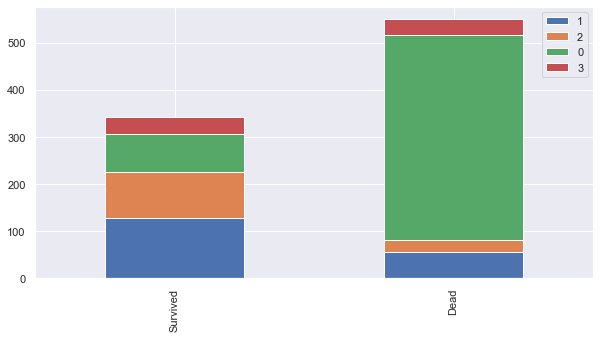

In [337]:
bar_chart('Title')

In [338]:
# "Name"열 삭제
train.drop('Name', axis=1, inplace=True)
test.drop('Name', axis=1, inplace=True)

In [339]:
train.shape, test.shape

((891, 13), (418, 11))

In [340]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Fare_Category,FamilySize,Title
PassengerId,,,,,,,,,,,,,
1,0,3,0,22.0,1,0,A/5 21171,7.2500,2.0,0,Low,0.4,0
2,1,1,1,38.0,1,0,PC 17599,71.2833,0.8,1,High,0.4,2
3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,2.0,0,Mid,0.0,1
4,1,1,1,35.0,1,0,113803,53.1000,0.8,0,High,0.4,2
5,0,3,0,35.0,0,0,373450,8.0500,2.0,0,Mid,0.0,0


In [341]:
test.head()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Title
PassengerId,,,,,,,,,,,
892,3,0,34.5,0,0,330911,7.8292,NaN,2,0.0,0
893,3,1,47.0,1,0,363272,7.0000,NaN,0,0.4,2
894,2,0,62.0,0,0,240276,9.6875,NaN,2,0.0,0
895,3,0,27.0,0,0,315154,8.6625,NaN,0,0.0,0
896,3,1,22.0,1,1,3101298,12.2875,NaN,0,0.8,2


In [342]:
# Age 결측값 처리
# Title을 기준으로 중앙값 사용
train.Age.isnull().sum(), test.Age.isnull().sum()

(177, 86)

In [343]:
train['AgeMedian'] = train.groupby("Title")["Age"].transform("median")    # ?["Age"].median()
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Fare_Category,FamilySize,Title,AgeMedian
PassengerId,,,,,,,,,,,,,,
1,0,3,0,22.0,1,0,A/5 21171,7.2500,2.0,0,Low,0.4,0,30.0
2,1,1,1,38.0,1,0,PC 17599,71.2833,0.8,1,High,0.4,2,35.0
3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,2.0,0,Mid,0.0,1,21.0
4,1,1,1,35.0,1,0,113803,53.1000,0.8,0,High,0.4,2,35.0
5,0,3,0,35.0,0,0,373450,8.0500,2.0,0,Mid,0.0,0,30.0


In [345]:
train["Age"].fillna(train.groupby("Title")["Age"].transform("median"), inplace=True)
test["Age"].fillna(test.groupby("Title")["Age"].transform("median"), inplace=True)
train.head(20)

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Fare_Category,FamilySize,Title,AgeMedian
PassengerId,,,,,,,,,,,,,,
1,0,3,0,22.0,1,0,A/5 21171,7.2500,2.0,0,Low,0.4,0,30.0
2,1,1,1,38.0,1,0,PC 17599,71.2833,0.8,1,High,0.4,2,35.0
3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,2.0,0,Mid,0.0,1,21.0
4,1,1,1,35.0,1,0,113803,53.1000,0.8,0,High,0.4,2,35.0
5,0,3,0,35.0,0,0,373450,8.0500,2.0,0,Mid,0.0,0,30.0
6,0,3,0,30.0,0,0,330877,8.4583,2.0,2,Mid,0.0,0,30.0
7,0,1,0,54.0,0,0,17463,51.8625,1.6,0,High,0.0,0,30.0
8,0,3,0,2.0,3,1,349909,21.0750,2.0,0,High_Mid,1.6,3,9.0
9,1,3,1,27.0,0,2,347742,11.1333,2.0,0,Mid,0.8,2,35.0


In [ ]:
# 범위에 따라 카테고리화
# binning: 연속적은 값으로 큰 의미를 찾기 어려울 때, 값을 구간화하여 카테고리화 하는 것
# Age
# child:0 (age<=16)
# young: 1 (16<age<=26)
# adult: 2 (26<age<=36)
# mid-age: 3 (36<age<=62)
# senior: 4 (62<age<=100)
# pandas.cut(bins[1,2,3,4] indicate(1,2], (2,3], (3,4])

In [404]:
train['Age_Category'] = pd.cut(train['Age'], bins=[0,16,26,36,62,100],
                              labels=[0,1,2,3,4])

In [405]:
test['Age_Category'] = pd.cut(test['Age'], bins=[0,16,26,36,62,100],
                              labels=[0,1,2,3,4])

In [406]:
test.head(10)

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Title,Age_Category,Fare_Category
PassengerId,,,,,,,,,,,,,
892,3,0,34.5,0,0,330911,7.8292,NaN,2,0.0,0,2,0
893,3,1,47.0,1,0,363272,7.0000,NaN,0,0.4,2,3,0
894,2,0,62.0,0,0,240276,9.6875,NaN,2,0.0,0,3,0
895,3,0,27.0,0,0,315154,8.6625,NaN,0,0.0,0,2,0
896,3,1,22.0,1,1,3101298,12.2875,NaN,0,0.8,2,1,0
897,3,0,14.0,0,0,7538,9.2250,NaN,0,0.0,0,0,0
898,3,1,30.0,0,0,330972,7.6292,NaN,2,0.0,1,2,0
899,2,0,26.0,1,1,248738,29.0000,NaN,0,0.8,0,1,1
900,3,1,18.0,0,0,2657,7.2292,NaN,1,0.0,2,1,0


In [407]:
# Fare
# 0.0<fare<=14 : 0
# 14<fare<=30 : 1
# 30<fare<=100 : 2
# 100<fare<=14 : 3

train['Fare_Category'] = pd.cut(train['Fare'], 
                                bins=[0,14,30,100,1000],
                                labels=[0,1,2,3])
test['Fare_Category'] = pd.cut(test['Fare'], 
                               bins=[0,14,30,100,1000],
                               labels=[0,1,2,3])
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Fare_Category,FamilySize,Title,AgeMedian,Age_Category
PassengerId,,,,,,,,,,,,,,,
1,0,3,0,22.0,1,0,A/5 21171,7.2500,2.0,0,0,0.4,0,30.0,1
2,1,1,1,38.0,1,0,PC 17599,71.2833,0.8,1,2,0.4,2,35.0,3
3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,2.0,0,0,0.0,1,21.0,1
4,1,1,1,35.0,1,0,113803,53.1000,0.8,0,2,0.4,2,35.0,2
5,0,3,0,35.0,0,0,373450,8.0500,2.0,0,0,0.0,0,30.0,2


In [408]:
train.Fare.describe()

count    891.000000
mean      32.689318
std       49.611639
min        4.012500
25%        7.925000
50%       14.500000
75%       31.275000
max      512.329200
Name: Fare, dtype: float64

In [450]:
# 모델 적용
# (1) 종속변수와 독립 변수 설정
X_features = ['Pclass', 'Sex', 'Age_Category', 'Fare_Category',
             'Cabin', 'Embarked', 'Title', 'FamilySize']
X_train = train[X_features]
X_test = test[X_features]
Y_train=train['Survived']

In [470]:
X_test.isnull().sum()

Pclass           0
Sex              0
Age_Category     0
Fare_Category    0
Cabin            0
Embarked         0
Title            0
FamilySize       0
dtype: int64

In [471]:
X_train.shape

(891, 8)

In [454]:
# Import Classifier Modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

In [455]:
from sklearn.model_selection import KFold, cross_val_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)
def getScore(clf):
    score=cross_val_score(clf, X_train, Y_train,
                          cv=k_fold, n_jobs=1, scoring='accuracy')
    return score

In [456]:
# 교차 검증
scores=pd.DataFrame([
    getScore(KNeighborsClassifier(n_neighbors=13)),
    getScore(DecisionTreeClassifier(random_state=0)),
    getScore(RandomForestClassifier(n_estimators=13, random_state=0)),
    getScore(GaussianNB()),
    getScore(SVC(gamma='auto')),
    getScore(MLPClassifier(solver='sgd', activation='logistic',
                           hidden_layer_sizes=(48,16),
                           random_state=1, max_iter=200000))],
    index = ['KNN', 'DT', 'RF', 'NB', 'SVM', 'MLP_s'])

In [457]:
scores

,0,1,2,3,4,5,6,7,8,9
KNN,0.788889,0.786517,0.808989,0.831461,0.853933,0.808989,0.842697,0.797753,0.831461,0.853933
DT,0.777778,0.775281,0.786517,0.775281,0.876404,0.752809,0.808989,0.808989,0.741573,0.775281
RF,0.833333,0.786517,0.786517,0.808989,0.876404,0.808989,0.808989,0.786517,0.764045,0.775281
NB,0.855556,0.741573,0.752809,0.752809,0.707865,0.808989,0.764045,0.808989,0.853933,0.820225
SVM,0.833333,0.786517,0.820225,0.820225,0.842697,0.808989,0.831461,0.853933,0.842697,0.853933
MLP_s,0.566667,0.662921,0.651685,0.595506,0.696629,0.651685,0.595506,0.651685,0.561798,0.528090


In [458]:
# (3) ANN 모델: k_fold cross validation 결과 추가 & train data 학습
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [459]:
X=X_train.to_numpy()
Y=Y_train.to_numpy().reshape(-1,1)

In [460]:
from sklearn.model_selection import StratifiedKFold

n_fold = 10
skf=StratifiedKFold(n_splits=n_fold, shuffle=True,
                    random_state=0)

accuracy_list=[]
for train_index, test_index in skf.split(X, Y):
    model=Sequential()
    model.add(Dense(units=48, input_dim=8, activation='relu')) 
    model.add(Dense(units= 24, activation='relu'))
    model.add(Dense(units= 1, activation='sigmoid'))    
    model.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])
    
    Xtrain, Xtest = X[train_index], X[test_index]
    Ytrain, Ytest = Y[train_index], Y[test_index]
    model.fit(Xtrain, Ytrain, epochs=100, batch_size=10, verbose=0)
    
    accuracy_list.append(model.evaluate(Xtest, Ytest)[1])

3/3 [==============================] - 0s 4ms/step - loss: 0.4750 - accuracy: 0.8315


In [461]:
print(n_fold, "-fold accuracy: ", accuracy_list)
print('\nAverage Accuracy: ', np.array(accuracy_list).mean())

10 -fold accuracy:  [0.8444444537162781, 0.8764045238494873, 0.8089887499809265, 0.8539325594902039, 0.8089887499809265, 0.8539325594902039, 0.7752808928489685, 0.7752808928489685, 0.7865168452262878, 0.8314606547355652]

Average Accuracy:  0.8215230882167817


In [462]:
scores.loc['MLP_tf']=np.array(accuracy_list)
scores

,0,1,2,3,4,5,6,7,8,9
KNN,0.788889,0.786517,0.808989,0.831461,0.853933,0.808989,0.842697,0.797753,0.831461,0.853933
DT,0.777778,0.775281,0.786517,0.775281,0.876404,0.752809,0.808989,0.808989,0.741573,0.775281
RF,0.833333,0.786517,0.786517,0.808989,0.876404,0.808989,0.808989,0.786517,0.764045,0.775281
NB,0.855556,0.741573,0.752809,0.752809,0.707865,0.808989,0.764045,0.808989,0.853933,0.820225
SVM,0.833333,0.786517,0.820225,0.820225,0.842697,0.808989,0.831461,0.853933,0.842697,0.853933
MLP_s,0.566667,0.662921,0.651685,0.595506,0.696629,0.651685,0.595506,0.651685,0.561798,0.528090
MLP_tf,0.844444,0.876405,0.808989,0.853933,0.808989,0.853933,0.775281,0.775281,0.786517,0.831461


In [463]:
scores['Mean']=np.around(scores.mean(axis=1)*100,2)
scores

,0,1,2,3,4,5,6,7,8,9,Mean
KNN,0.788889,0.786517,0.808989,0.831461,0.853933,0.808989,0.842697,0.797753,0.831461,0.853933,82.05
DT,0.777778,0.775281,0.786517,0.775281,0.876404,0.752809,0.808989,0.808989,0.741573,0.775281,78.79
RF,0.833333,0.786517,0.786517,0.808989,0.876404,0.808989,0.808989,0.786517,0.764045,0.775281,80.36
NB,0.855556,0.741573,0.752809,0.752809,0.707865,0.808989,0.764045,0.808989,0.853933,0.820225,78.67
SVM,0.833333,0.786517,0.820225,0.820225,0.842697,0.808989,0.831461,0.853933,0.842697,0.853933,82.94
MLP_s,0.566667,0.662921,0.651685,0.595506,0.696629,0.651685,0.595506,0.651685,0.561798,0.528090,61.62
MLP_tf,0.844444,0.876405,0.808989,0.853933,0.808989,0.853933,0.775281,0.775281,0.786517,0.831461,82.15


In [472]:
# (4) 예측
def getPredict(clf):
    global X_train, Y_train, X_test
    clf.fit(X_train, Y_train)
    return clf.predict(X_test)

In [473]:
prediction=pd.DataFrame({
    'KNN': getPredict(KNeighborsClassifier(n_neighbors=13)),
    'DT': getPredict(DecisionTreeClassifier()),
    'RF': getPredict(RandomForestClassifier(n_estimators=13)),
    'NB': getPredict(GaussianNB()),
    'SVM': getPredict(SVC(gamma='auto'))
})

In [474]:
prediction.head(20)

,KNN,DT,RF,NB,SVM
0,0,0,0,0,0
1,0,0,0,1,1
2,0,0,0,0,0
3,0,0,0,0,0
4,0,1,1,1,1
5,0,0,0,0,0
6,1,0,0,1,1
7,0,0,0,0,0
8,1,1,1,1,1
9,0,0,0,0,0


In [475]:
prediction['Survived_ML'] = (prediction.sum(axis=1)>2)*1
prediction.head()

,KNN,DT,RF,NB,SVM,Survived_ML
0,0,0,0,0,0,0
1,0,0,0,1,1,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,1,1,1,1,1


In [476]:
# ANN 모델 제대로 학습
model=Sequential()
model.add(Dense(units=48, input_dim=8, activation='relu')) 
model.add(Dense(units= 24, activation='relu'))
model.add(Dense(units= 1, activation='sigmoid'))    
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.fit(X, Y, epochs=5000, batch_size=10, verbose=0)
    
print("Train accuracy: ", model.evaluate(X,Y)[1])
print("y_pred: ", model.predict(X).reshape(-1,)[:30])

28/28 [==============================] - 0s 769us/step - loss: 0.2267 - accuracy: 0.9012
Train accuracy:  0.9012345671653748
y_pred:  [2.7657121e-01 1.0000000e+00 4.9596539e-01 1.0000000e+00 1.2716851e-01
 2.1045524e-01 2.8873447e-07 1.3708472e-03 9.9999702e-01 1.0000000e+00
 9.9930978e-01 9.9999833e-01 6.9617778e-02 3.6530074e-31 4.9646404e-01
 9.9630141e-01 4.4730094e-24 1.0984802e-01 7.8275716e-01 9.9902892e-01
 6.8280995e-03 9.8939908e-01 1.0000000e+00 2.5803405e-01 8.9895725e-04
 4.6105409e-01 1.0328475e-01 8.8189811e-38 7.7074575e-01 1.2716851e-01]


In [477]:
prediction['MLP_TF'] = model.predict(X_test).reshape(-1,)
prediction['Survived_TF'] = (prediction['MLP_TF'] > 0.5).astype(int)
prediction.head()

,KNN,DT,RF,NB,SVM,Survived_ML,MLP_TF,Survived_TF
0,0,0,0,0,0,0,2.104552e-01,0
1,0,0,0,1,1,0,2.336183e-02,0
2,0,0,0,0,0,0,2.679044e-08,0
3,0,0,0,0,0,0,1.271685e-01,0
4,0,1,1,1,1,1,1.000000e+00,1


In [478]:
(prediction.Survived_ML != prediction.Survived_TF).sum()

42

In [479]:
mis_idx=list(np.where(prediction.Survived_ML!= prediction.Survived_TF)[0])
print(mis_idx)

[6, 16, 19, 33, 36, 37, 39, 41, 72, 73, 84, 86, 87, 98, 138, 142, 146, 157, 169, 181, 197, 199, 200, 206, 225, 264, 268, 280, 284, 287, 291, 305, 339, 345, 347, 354, 367, 369, 376, 383, 405, 412]


In [480]:
prediction.iloc[mis_idx, :] #  ,: 은 모든 열을 의미

,KNN,DT,RF,NB,SVM,Survived_ML,MLP_TF,Survived_TF
6,1,0,0,1,1,1,4.842579e-03,0
16,0,0,0,0,0,0,1.000000e+00,1
19,0,0,1,1,1,1,9.707022e-02,0
33,0,0,0,1,0,0,8.825717e-01,1
36,1,0,1,1,1,1,4.959654e-01,0
37,1,0,1,1,1,1,4.959654e-01,0
39,0,1,1,0,0,0,7.456259e-01,1
41,1,0,1,0,0,0,5.070890e-01,1
72,1,0,0,1,1,1,4.234945e-01,0
73,1,0,1,0,0,0,9.998404e-01,1


In [481]:
# 10. Submission
submission = pd.DataFrame({
    "PassengerId": test.index,
    "Survived": prediction['Survived_ML']
})
submission.tail()

,PassengerId,Survived
413,1305,0
414,1306,1
415,1307,0
416,1308,0
417,1309,1


In [482]:
submission.to_csv('D:/Ai/Titanic/submission.csv', index=False)

In [267]:
# 데이터 확인
train.shape

(891, 11)

In [268]:
train.info()
# Survived: 생존유무, target 값 (0=사망, 1=생존)
# Pclass: 티켓 클래스 (1=1st, 2=2nd, 3=3rd)
# Embarked: C, Q, S (탑승 항구)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [269]:
train.tail()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [270]:
test.shape

(418, 10)

In [271]:
test.head()
# Survived field 없음(test이기 때문)

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [272]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB


In [273]:
# 결측값 확인
train.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [274]:
test.isnull().sum()

Pclass        0
Name          0
Sex           0
Age          86
SibSp         0
Parch         0
Ticket        0
Fare          1
Cabin       327
Embarked      0
dtype: int64

In [275]:
# 이상치 확인
train.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [276]:
test.describe()
# fare에 비교적 높은 값(512)이 있으나 이상치인지 실제로 높은 금액을 지불한 것인지는 확인되지 않음
# 따라서 이상치가 없는 것으로 판단한다.

,Pclass,Age,SibSp,Parch,Fare
count,418.000000,332.000000,418.000000,418.000000,417.000000
mean,2.265550,30.272590,0.447368,0.392344,35.627188
std,0.841838,14.181209,0.896760,0.981429,55.907576
min,1.000000,0.170000,0.000000,0.000000,0.000000
25%,1.000000,21.000000,0.000000,0.000000,7.895800
50%,3.000000,27.000000,0.000000,0.000000,14.454200
75%,3.000000,39.000000,1.000000,0.000000,31.500000
max,3.000000,76.000000,8.000000,9.000000,512.329200


In [277]:
# 칼럼별 범주형 자료 카테고리 확인
train.nunique()
# 칼럼별 unique 값의 수

Survived      2
Pclass        3
Name        891
Sex           2
Age          88
SibSp         7
Parch         7
Ticket      681
Fare        248
Cabin       147
Embarked      3
dtype: int64

In [278]:
train.Pclass.unique()
# 데이터에 고유값이 무엇이 있는지 알고 싶다면 unique 
#총 고유값의 수가 몇 개인지 알고 싶다면 nunique
# 값별로 데이터의 개수를 알고 싶다면 value_counts

array([3, 1, 2], dtype=int64)

In [279]:
train.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [280]:
# 함수 선연
def bar_chart(feature):
    survived=train[train['Survived']==1][feature].value_counts()
    dead=train[train['Survived']==0][feature].value_counts()
    df=pd.DataFrame([survived, dead])
    df.index=['Survived', 'Dead']
    df.plot(kind='bar', stacked=True, figsize=(10,5))
    plt.show()

In [281]:
train_test_data=[train, test]
def map_col(col, mapping_info):    # mapping_info에 dictionary
    for dataset in train_test_data:
        dataset[col]=dataset[col].map(mapping_info)

In [282]:
# 특성별 자료 확인 및 결측지 처리
# (1) survived
train.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

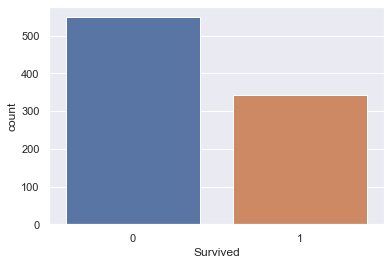

In [283]:
import seaborn as sns; sns.set()

sns.countplot(data=train, x='Survived')
plt.show()

In [284]:
# (2) Pclass
train.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

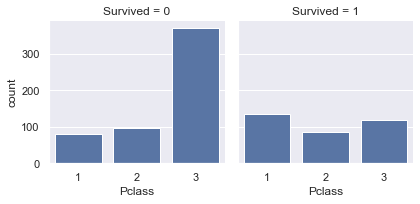

In [285]:
g=sns.FacetGrid(train, col='Survived')
g.map_dataframe(sns.countplot, x='Pclass')
# class 3의 사망자가 많으며, class 1 은 상대적으로 생존자가 많음

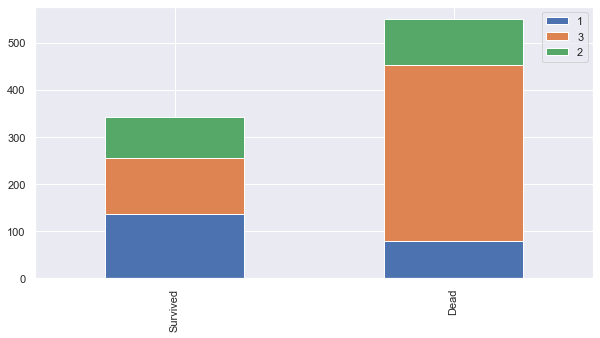

In [286]:
bar_chart('Pclass')

In [287]:
# (3) Sex
train.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

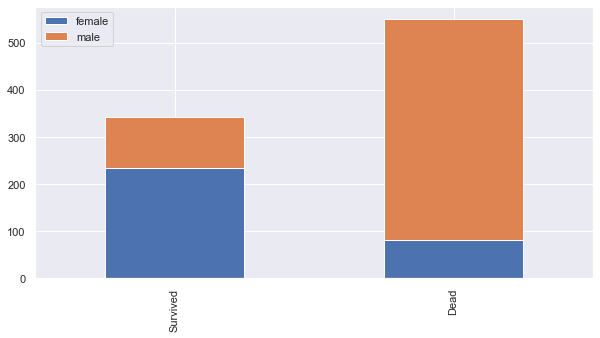

In [288]:
bar_chart('Sex')

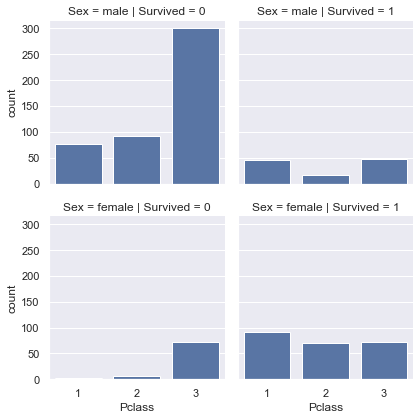

In [289]:
g=sns.FacetGrid(train, col='Survived', row='Sex')
g.map_dataframe(sns.countplot, x='Pclass')

In [290]:
# (4) Age
train.Age.isnull().sum()    # .isnull()은 null 감안하고 보겠다는 뜻

177

In [291]:
train.Age.mean()
# 평균연령은 30세 미만

29.69911764705882

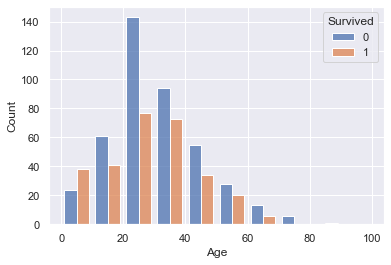

In [292]:
sns.histplot(data=train, x='Age', binrange=(0,100), bins=10,
             hue='Survived', multiple="dodge", shrink=.8)
plt.show()
# 10세 이하, 70세 이상의 생존율 높음

In [293]:
train.corr()
# Age와 Pclass 상관 관계가 가장 높음. 젊을 수록 class 3
# Age의 결측값 처리는 Feature Engineering에서....

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [294]:
# (5) SibSp
train.SibSp.describe()

count    891.000000
mean       0.523008
std        1.102743
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        8.000000
Name: SibSp, dtype: float64

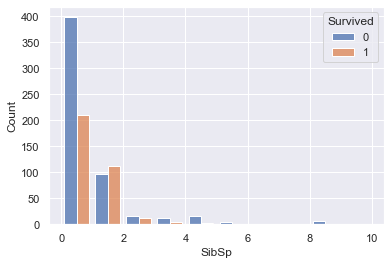

In [295]:
sns.histplot(data=train, x='SibSp', binrange=(0,10), bins=10,
              hue='Survived', multiple="dodge", shrink=.8)
plt.show()
# 혼자 탑승하거나 (형제, 배우자) 1명을 동반한 승객의 사망 비율이 높다.

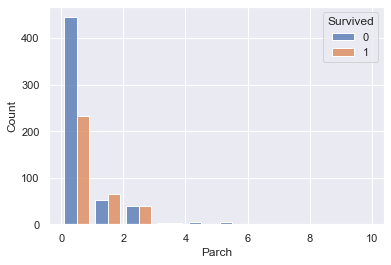

In [296]:
# Parch
sns.histplot(data=train, x='Parch', binrange=(0,10), bins=10,
              hue='Survived', multiple="dodge", shrink=.8)
plt.show()

# multiple ="stack" : 이걸 이용하면 bin 별로 해당하는 수가 색이 다르게 표현되어 쌓인다.
# multiple = "dodge" : 이걸 사용하면 그룹별로 bin이 겹치지 않는다. 

In [297]:
# Fare
train.Fare.isnull().sum()

0

In [298]:
test.Fare.isnull().sum()

1

In [299]:
train.Fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [300]:
# Fare의 min이 0.0이므로, 0.0의 자료를 찾아봄.
train[train.Fare==0.0]['Fare'].count()

15

In [301]:
import numpy as np
np.where(train.Fare==0.0)

(array([179, 263, 271, 277, 302, 413, 466, 481, 597, 633, 674, 732, 806,
        815, 822], dtype=int64),)

In [302]:
na_list=list(np.where(train.Fare == 0.0)[0])    # np.where(): 인덱스 반환
train.iloc[na_list]    # 인덱스 번호를 사용해 데이터프레임 분리하기

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
180,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,NaN,S
264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,B94,S
272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,NaN,S
278,0,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,0.0,NaN,S
303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,NaN,S
414,0,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,0.0,NaN,S
467,0,2,"Campbell, Mr. William",male,NaN,0,0,239853,0.0,NaN,S
482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,0.0,NaN,S
598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0,NaN,S


In [303]:
train.iloc[na_list]['Pclass'].value_counts()

2    6
1    5
3    4
Name: Pclass, dtype: int64

In [304]:
train['Fare']=train['Fare'].replace(0.0, np.nan)
test['Fare']=test['Fare'].replace(0.0, np.nan)
train.iloc[na_list]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
180,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,NaN,NaN,S
264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,NaN,B94,S
272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,NaN,NaN,S
278,0,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,NaN,NaN,S
303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,NaN,NaN,S
414,0,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,NaN,NaN,S
467,0,2,"Campbell, Mr. William",male,NaN,0,0,239853,NaN,NaN,S
482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,NaN,NaN,S
598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,NaN,NaN,S


In [305]:
# Fare가 0.0인 것을 각 class의 median으로 채워줌
# fillna(): 데이터 결측치 처리(전처리)
train["Fare"].fillna(train.groupby("Pclass")["Fare"].transform("median"), inplace=True)
test["Fare"].fillna(test.groupby("Pclass")["Fare"].transform("median"), inplace=True)
train.iloc[na_list]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
180,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,8.0500,NaN,S
264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,61.9792,B94,S
272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,8.0500,NaN,S
278,0,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,15.0229,NaN,S
303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,8.0500,NaN,S
414,0,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,15.0229,NaN,S
467,0,2,"Campbell, Mr. William",male,NaN,0,0,239853,15.0229,NaN,S
482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,15.0229,NaN,S
598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,8.0500,NaN,S


In [306]:
train['Fare_Category']= pd.cut(train['Fare'], bins=[0.0, 7.9, 14.5, 31.0, 520],
                               labels=['Low', 'Mid', 'High_Mid', 'High'])
# DataFrame.cut()
# 수치형 데이터를 범주형 데이터로 바꿔주는 것
# Parameter
# bins: 구간(속성값), int형으로 입력한다.
# labels: 구간에 대한 범주 이름(속성에 대한 이름), int 형으로 입력한다.

In [307]:
np.where(train.Fare_Category.isnull()==True)

(array([], dtype=int64),)

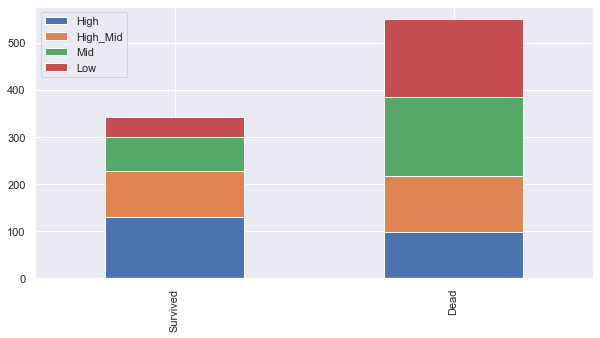

In [308]:
bar_chart('Fare_Category')

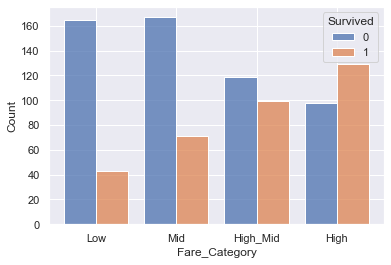

In [309]:
sns.histplot(data=train, x='Fare_Category', hue='Survived',
             multiple="dodge", shrink=.8)
plt.show()

In [310]:
# (8) Cabin
train.Cabin.value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64

In [311]:
train.Cabin.unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [312]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Fare_Category
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Low
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,High
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Mid
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,High
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mid


In [313]:
train.Cabin = train.Cabin.str[:1]
test.Cabin = test.Cabin.str[:1]
train.Cabin.unique()
# object 형식은 indexing 할 수 없으므로 str 형식으로 바꿔준다.
# str 형식으로 나온 A,B, C (첫번째 글자)를 저장한다.

array([nan, 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

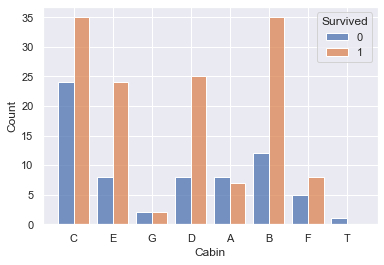

In [314]:
sns.histplot(data=train, x='Cabin', hue='Survived',

             multiple="dodge", shrink=.8)
plt.show()

In [315]:
train.Cabin.isnull().sum()

687

In [316]:
# scaling하여 mapping
cabin_mapping = {"A": 0, "B": 0.4, "C": 0.8, "D": 1.2, 
                 "E": 1.6, "F": 2, "G": 2.4, "T": 2.8}
train.Cabin = train.Cabin.map(cabin_mapping)
test.Cabin =  test.Cabin.map(cabin_mapping)
train["Cabin"].fillna(train.groupby("Pclass")["Cabin"].transform("median"), inplace=True)
test["Cabin"].fillna(test.groupby("Pclass")["Cabin"].transform("median"), inplace=True)

In [468]:
train.Cabin.isnull().sum(), test.Cabin.isnull().sum()

(0, 0)

In [318]:
# (9) Embarked
train.Embarked.isnull().sum(), test.Embarked.isnull().sum()

(2, 0)

In [319]:
train.Embarked.value_counts(), test.Embarked.value_counts()

(S    644
 C    168
 Q     77
 Name: Embarked, dtype: int64,
 S    270
 C    102
 Q     46
 Name: Embarked, dtype: int64)

In [320]:
train.Embarked = train.Embarked.fillna('S')
train.Embarked.isnull().sum()

0

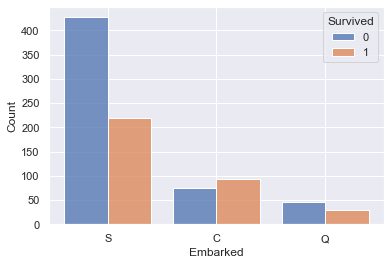

In [321]:
sns.histplot(data=train, x='Embarked', hue='Survived',
             multiple="dodge", shrink=.8)
plt.show()

### Feature Engineering
- 특성 공학: 칼럼에 연산 등을 통해서 의미있는 새로운 정보를 추출하는 분야

In [322]:
# Family Size 속성 추가
train['FamilySize'] = train.Parch + train.SibSp + 1
test['FamilySize'] = test.Parch + test.SibSp + 1

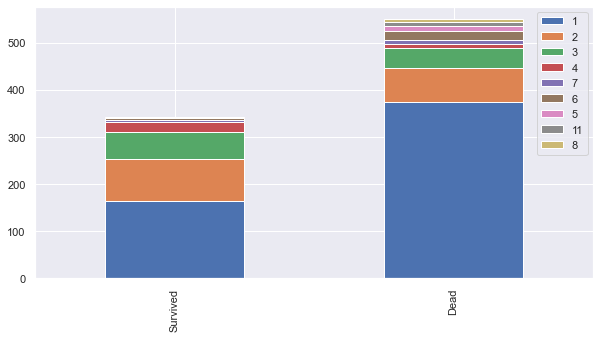

In [323]:
bar_chart('FamilySize')

In [324]:
# scaling
family_mapping = {1: 0, 2: 0.4, 3: 0.8, 4: 1.2, 5: 1.6,
                  6: 2, 7: 2.4, 8: 2.8, 9: 3.2, 10: 3.6, 11: 4}
map_col("FamilySize", family_mapping)
train.FamilySize.value_counts()

0.0    537
0.4    161
0.8    102
1.2     29
2.0     22
1.6     15
2.4     12
4.0      7
2.8      6
Name: FamilySize, dtype: int64

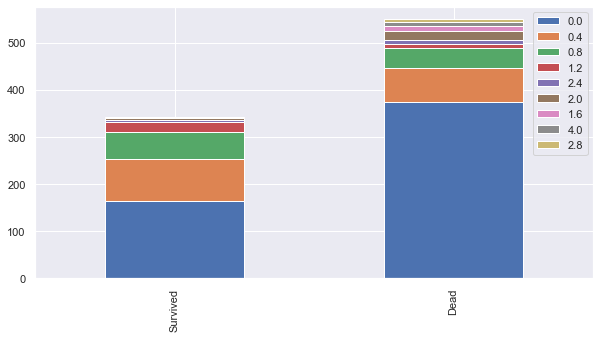

In [325]:
bar_chart('FamilySize')

In [326]:
# 범주 데이터를 숫자로 맵핑
# Embarked를 수치로 매핑
e_mapping={'S':0, 'C':1, 'Q':2}
map_col("Embarked", e_mapping)

In [327]:
# 성별 데이터를 숫자로 맵핑
s_map = {"male": 0, "female": 1}
map_col("Sex", s_map)

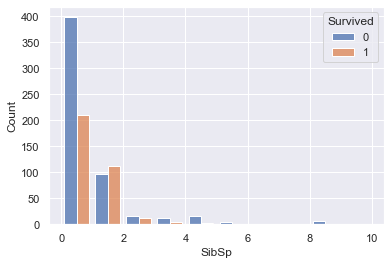

In [328]:
sns.histplot(data=train, x='SibSp', binrange=(0,10), bins=10,
              hue='Survived', multiple="dodge", shrink=.8)
plt.show()
# 혼자 탑승하거나 (형제, 배우자) 1명을 동반한 승객의 사망 비율이 높다.

In [329]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Fare_Category,FamilySize
PassengerId,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,2.0,0,Low,0.4
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,0.8,1,High,0.4
3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,2.0,0,Mid,0.0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0.8,0,High,0.4
5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,2.0,0,Mid,0.0


In [330]:
# Name
train.Name.unique()

array(['Braund, Mr. Owen Harris',
       'Cumings, Mrs. John Bradley (Florence Briggs Thayer)',
       'Heikkinen, Miss. Laina',
       'Futrelle, Mrs. Jacques Heath (Lily May Peel)',
       'Allen, Mr. William Henry', 'Moran, Mr. James',
       'McCarthy, Mr. Timothy J', 'Palsson, Master. Gosta Leonard',
       'Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)',
       'Nasser, Mrs. Nicholas (Adele Achem)',
       'Sandstrom, Miss. Marguerite Rut', 'Bonnell, Miss. Elizabeth',
       'Saundercock, Mr. William Henry', 'Andersson, Mr. Anders Johan',
       'Vestrom, Miss. Hulda Amanda Adolfina',
       'Hewlett, Mrs. (Mary D Kingcome) ', 'Rice, Master. Eugene',
       'Williams, Mr. Charles Eugene',
       'Vander Planke, Mrs. Julius (Emelia Maria Vandemoortele)',
       'Masselmani, Mrs. Fatima', 'Fynney, Mr. Joseph J',
       'Beesley, Mr. Lawrence', 'McGowan, Miss. Anna "Annie"',
       'Sloper, Mr. William Thompson', 'Palsson, Miss. Torborg Danira',
       'Asplund, Mrs. Carl Oscar 

In [331]:
train_test_data = [train, test]  # combining train and test dataset

# 이름에서 title만 추출하여 Title feature 생성
for dataset in train_test_data:
    dataset['Title'] = dataset['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
# return a Series if expand=False. (True이면 DataFrame 반환)
# [A-Za-z]+[A-Za-z] 문자가 1개 이상 반복

In [332]:
train['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: Title, dtype: int64

In [333]:
train.Title.value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: Title, dtype: int64

In [334]:
test.Title.value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: Title, dtype: int64

In [335]:
# Title map
# Mr:0
# Miss:1
# Mrs:2
# Others:3
print(train.Title.unique(), test.Title.unique())

['Mr' 'Mrs' 'Miss' 'Master' 'Don' 'Rev' 'Dr' 'Mme' 'Ms' 'Major' 'Lady'
 'Sir' 'Mlle' 'Col' 'Capt' 'Countess' 'Jonkheer'] ['Mr' 'Mrs' 'Miss' 'Master' 'Ms' 'Col' 'Rev' 'Dr' 'Dona']


In [336]:
title_mapping = {'Mr': 0, 'Miss':1, 'Mrs':2, 
                 'Master': 3, 'Don':3, 'Rev':3,  'Dr':3,  
                 'Mme':3, 'Ms':3, 'Major':3, 'Lady':3,
                 'Sir':3, 'Mlle':3, 'Col':3, 'Capt':3, 
                'Countess':3, 'Jonkheer':3, 'Dona':3}
map_col("Title", title_mapping)
print(train.Title.unique(), "\n",
      test.Title.unique(), "\n",
      train.Title.value_counts(), "\n",
      test.Title.value_counts())

[0 2 1 3] 
 [0 2 1 3] 
 0    517
1    182
2    125
3     67
Name: Title, dtype: int64 
 0    240
1     78
2     72
3     28
Name: Title, dtype: int64


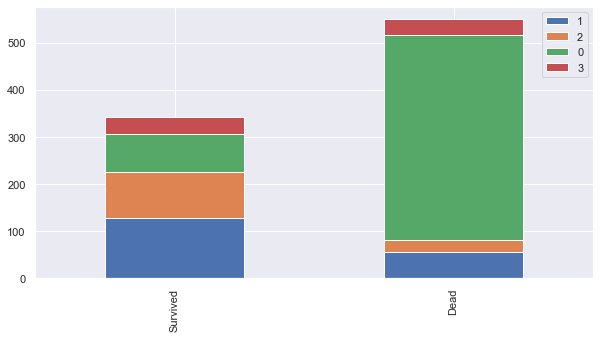

In [337]:
bar_chart('Title')

In [338]:
# "Name"열 삭제
train.drop('Name', axis=1, inplace=True)
test.drop('Name', axis=1, inplace=True)

In [339]:
train.shape, test.shape

((891, 13), (418, 11))

In [340]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Fare_Category,FamilySize,Title
PassengerId,,,,,,,,,,,,,
1,0,3,0,22.0,1,0,A/5 21171,7.2500,2.0,0,Low,0.4,0
2,1,1,1,38.0,1,0,PC 17599,71.2833,0.8,1,High,0.4,2
3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,2.0,0,Mid,0.0,1
4,1,1,1,35.0,1,0,113803,53.1000,0.8,0,High,0.4,2
5,0,3,0,35.0,0,0,373450,8.0500,2.0,0,Mid,0.0,0


In [341]:
test.head()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Title
PassengerId,,,,,,,,,,,
892,3,0,34.5,0,0,330911,7.8292,NaN,2,0.0,0
893,3,1,47.0,1,0,363272,7.0000,NaN,0,0.4,2
894,2,0,62.0,0,0,240276,9.6875,NaN,2,0.0,0
895,3,0,27.0,0,0,315154,8.6625,NaN,0,0.0,0
896,3,1,22.0,1,1,3101298,12.2875,NaN,0,0.8,2


In [342]:
# Age 결측값 처리
# Title을 기준으로 중앙값 사용
train.Age.isnull().sum(), test.Age.isnull().sum()

(177, 86)

In [343]:
train['AgeMedian'] = train.groupby("Title")["Age"].transform("median")    # ?["Age"].median()
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Fare_Category,FamilySize,Title,AgeMedian
PassengerId,,,,,,,,,,,,,,
1,0,3,0,22.0,1,0,A/5 21171,7.2500,2.0,0,Low,0.4,0,30.0
2,1,1,1,38.0,1,0,PC 17599,71.2833,0.8,1,High,0.4,2,35.0
3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,2.0,0,Mid,0.0,1,21.0
4,1,1,1,35.0,1,0,113803,53.1000,0.8,0,High,0.4,2,35.0
5,0,3,0,35.0,0,0,373450,8.0500,2.0,0,Mid,0.0,0,30.0


In [345]:
train["Age"].fillna(train.groupby("Title")["Age"].transform("median"), inplace=True)
test["Age"].fillna(test.groupby("Title")["Age"].transform("median"), inplace=True)
train.head(20)

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Fare_Category,FamilySize,Title,AgeMedian
PassengerId,,,,,,,,,,,,,,
1,0,3,0,22.0,1,0,A/5 21171,7.2500,2.0,0,Low,0.4,0,30.0
2,1,1,1,38.0,1,0,PC 17599,71.2833,0.8,1,High,0.4,2,35.0
3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,2.0,0,Mid,0.0,1,21.0
4,1,1,1,35.0,1,0,113803,53.1000,0.8,0,High,0.4,2,35.0
5,0,3,0,35.0,0,0,373450,8.0500,2.0,0,Mid,0.0,0,30.0
6,0,3,0,30.0,0,0,330877,8.4583,2.0,2,Mid,0.0,0,30.0
7,0,1,0,54.0,0,0,17463,51.8625,1.6,0,High,0.0,0,30.0
8,0,3,0,2.0,3,1,349909,21.0750,2.0,0,High_Mid,1.6,3,9.0
9,1,3,1,27.0,0,2,347742,11.1333,2.0,0,Mid,0.8,2,35.0


In [ ]:
# 범위에 따라 카테고리화
# binning: 연속적은 값으로 큰 의미를 찾기 어려울 때, 값을 구간화하여 카테고리화 하는 것
# Age
# child:0 (age<=16)
# young: 1 (16<age<=26)
# adult: 2 (26<age<=36)
# mid-age: 3 (36<age<=62)
# senior: 4 (62<age<=100)
# pandas.cut(bins[1,2,3,4] indicate(1,2], (2,3], (3,4])

In [404]:
train['Age_Category'] = pd.cut(train['Age'], bins=[0,16,26,36,62,100],
                              labels=[0,1,2,3,4])

In [405]:
test['Age_Category'] = pd.cut(test['Age'], bins=[0,16,26,36,62,100],
                              labels=[0,1,2,3,4])

In [406]:
test.head(10)

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Title,Age_Category,Fare_Category
PassengerId,,,,,,,,,,,,,
892,3,0,34.5,0,0,330911,7.8292,NaN,2,0.0,0,2,0
893,3,1,47.0,1,0,363272,7.0000,NaN,0,0.4,2,3,0
894,2,0,62.0,0,0,240276,9.6875,NaN,2,0.0,0,3,0
895,3,0,27.0,0,0,315154,8.6625,NaN,0,0.0,0,2,0
896,3,1,22.0,1,1,3101298,12.2875,NaN,0,0.8,2,1,0
897,3,0,14.0,0,0,7538,9.2250,NaN,0,0.0,0,0,0
898,3,1,30.0,0,0,330972,7.6292,NaN,2,0.0,1,2,0
899,2,0,26.0,1,1,248738,29.0000,NaN,0,0.8,0,1,1
900,3,1,18.0,0,0,2657,7.2292,NaN,1,0.0,2,1,0


In [407]:
# Fare
# 0.0<fare<=14 : 0
# 14<fare<=30 : 1
# 30<fare<=100 : 2
# 100<fare<=14 : 3

train['Fare_Category'] = pd.cut(train['Fare'], 
                                bins=[0,14,30,100,1000],
                                labels=[0,1,2,3])
test['Fare_Category'] = pd.cut(test['Fare'], 
                               bins=[0,14,30,100,1000],
                               labels=[0,1,2,3])
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Fare_Category,FamilySize,Title,AgeMedian,Age_Category
PassengerId,,,,,,,,,,,,,,,
1,0,3,0,22.0,1,0,A/5 21171,7.2500,2.0,0,0,0.4,0,30.0,1
2,1,1,1,38.0,1,0,PC 17599,71.2833,0.8,1,2,0.4,2,35.0,3
3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,2.0,0,0,0.0,1,21.0,1
4,1,1,1,35.0,1,0,113803,53.1000,0.8,0,2,0.4,2,35.0,2
5,0,3,0,35.0,0,0,373450,8.0500,2.0,0,0,0.0,0,30.0,2


In [408]:
train.Fare.describe()

count    891.000000
mean      32.689318
std       49.611639
min        4.012500
25%        7.925000
50%       14.500000
75%       31.275000
max      512.329200
Name: Fare, dtype: float64

In [450]:
# 모델 적용
# (1) 종속변수와 독립 변수 설정
X_features = ['Pclass', 'Sex', 'Age_Category', 'Fare_Category',
             'Cabin', 'Embarked', 'Title', 'FamilySize']
X_train = train[X_features]
X_test = test[X_features]
Y_train=train['Survived']

In [470]:
X_test.isnull().sum()

Pclass           0
Sex              0
Age_Category     0
Fare_Category    0
Cabin            0
Embarked         0
Title            0
FamilySize       0
dtype: int64

In [471]:
X_train.shape

(891, 8)

In [454]:
# Import Classifier Modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

In [455]:
from sklearn.model_selection import KFold, cross_val_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)
def getScore(clf):
    score=cross_val_score(clf, X_train, Y_train,
                          cv=k_fold, n_jobs=1, scoring='accuracy')
    return score

In [456]:
# 교차 검증
scores=pd.DataFrame([
    getScore(KNeighborsClassifier(n_neighbors=13)),
    getScore(DecisionTreeClassifier(random_state=0)),
    getScore(RandomForestClassifier(n_estimators=13, random_state=0)),
    getScore(GaussianNB()),
    getScore(SVC(gamma='auto')),
    getScore(MLPClassifier(solver='sgd', activation='logistic',
                           hidden_layer_sizes=(48,16),
                           random_state=1, max_iter=200000))],
    index = ['KNN', 'DT', 'RF', 'NB', 'SVM', 'MLP_s'])

In [457]:
scores

,0,1,2,3,4,5,6,7,8,9
KNN,0.788889,0.786517,0.808989,0.831461,0.853933,0.808989,0.842697,0.797753,0.831461,0.853933
DT,0.777778,0.775281,0.786517,0.775281,0.876404,0.752809,0.808989,0.808989,0.741573,0.775281
RF,0.833333,0.786517,0.786517,0.808989,0.876404,0.808989,0.808989,0.786517,0.764045,0.775281
NB,0.855556,0.741573,0.752809,0.752809,0.707865,0.808989,0.764045,0.808989,0.853933,0.820225
SVM,0.833333,0.786517,0.820225,0.820225,0.842697,0.808989,0.831461,0.853933,0.842697,0.853933
MLP_s,0.566667,0.662921,0.651685,0.595506,0.696629,0.651685,0.595506,0.651685,0.561798,0.528090


In [458]:
# (3) ANN 모델: k_fold cross validation 결과 추가 & train data 학습
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [459]:
X=X_train.to_numpy()
Y=Y_train.to_numpy().reshape(-1,1)

In [460]:
from sklearn.model_selection import StratifiedKFold

n_fold = 10
skf=StratifiedKFold(n_splits=n_fold, shuffle=True,
                    random_state=0)

accuracy_list=[]
for train_index, test_index in skf.split(X, Y):
    model=Sequential()
    model.add(Dense(units=48, input_dim=8, activation='relu')) 
    model.add(Dense(units= 24, activation='relu'))
    model.add(Dense(units= 1, activation='sigmoid'))    
    model.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])
    
    Xtrain, Xtest = X[train_index], X[test_index]
    Ytrain, Ytest = Y[train_index], Y[test_index]
    model.fit(Xtrain, Ytrain, epochs=100, batch_size=10, verbose=0)
    
    accuracy_list.append(model.evaluate(Xtest, Ytest)[1])

3/3 [==============================] - 0s 4ms/step - loss: 0.4750 - accuracy: 0.8315


In [461]:
print(n_fold, "-fold accuracy: ", accuracy_list)
print('\nAverage Accuracy: ', np.array(accuracy_list).mean())

10 -fold accuracy:  [0.8444444537162781, 0.8764045238494873, 0.8089887499809265, 0.8539325594902039, 0.8089887499809265, 0.8539325594902039, 0.7752808928489685, 0.7752808928489685, 0.7865168452262878, 0.8314606547355652]

Average Accuracy:  0.8215230882167817


In [462]:
scores.loc['MLP_tf']=np.array(accuracy_list)
scores

,0,1,2,3,4,5,6,7,8,9
KNN,0.788889,0.786517,0.808989,0.831461,0.853933,0.808989,0.842697,0.797753,0.831461,0.853933
DT,0.777778,0.775281,0.786517,0.775281,0.876404,0.752809,0.808989,0.808989,0.741573,0.775281
RF,0.833333,0.786517,0.786517,0.808989,0.876404,0.808989,0.808989,0.786517,0.764045,0.775281
NB,0.855556,0.741573,0.752809,0.752809,0.707865,0.808989,0.764045,0.808989,0.853933,0.820225
SVM,0.833333,0.786517,0.820225,0.820225,0.842697,0.808989,0.831461,0.853933,0.842697,0.853933
MLP_s,0.566667,0.662921,0.651685,0.595506,0.696629,0.651685,0.595506,0.651685,0.561798,0.528090
MLP_tf,0.844444,0.876405,0.808989,0.853933,0.808989,0.853933,0.775281,0.775281,0.786517,0.831461


In [463]:
scores['Mean']=np.around(scores.mean(axis=1)*100,2)
scores

,0,1,2,3,4,5,6,7,8,9,Mean
KNN,0.788889,0.786517,0.808989,0.831461,0.853933,0.808989,0.842697,0.797753,0.831461,0.853933,82.05
DT,0.777778,0.775281,0.786517,0.775281,0.876404,0.752809,0.808989,0.808989,0.741573,0.775281,78.79
RF,0.833333,0.786517,0.786517,0.808989,0.876404,0.808989,0.808989,0.786517,0.764045,0.775281,80.36
NB,0.855556,0.741573,0.752809,0.752809,0.707865,0.808989,0.764045,0.808989,0.853933,0.820225,78.67
SVM,0.833333,0.786517,0.820225,0.820225,0.842697,0.808989,0.831461,0.853933,0.842697,0.853933,82.94
MLP_s,0.566667,0.662921,0.651685,0.595506,0.696629,0.651685,0.595506,0.651685,0.561798,0.528090,61.62
MLP_tf,0.844444,0.876405,0.808989,0.853933,0.808989,0.853933,0.775281,0.775281,0.786517,0.831461,82.15


In [472]:
# (4) 예측
def getPredict(clf):
    global X_train, Y_train, X_test
    clf.fit(X_train, Y_train)
    return clf.predict(X_test)

In [473]:
prediction=pd.DataFrame({
    'KNN': getPredict(KNeighborsClassifier(n_neighbors=13)),
    'DT': getPredict(DecisionTreeClassifier()),
    'RF': getPredict(RandomForestClassifier(n_estimators=13)),
    'NB': getPredict(GaussianNB()),
    'SVM': getPredict(SVC(gamma='auto'))
})

In [474]:
prediction.head(20)

,KNN,DT,RF,NB,SVM
0,0,0,0,0,0
1,0,0,0,1,1
2,0,0,0,0,0
3,0,0,0,0,0
4,0,1,1,1,1
5,0,0,0,0,0
6,1,0,0,1,1
7,0,0,0,0,0
8,1,1,1,1,1
9,0,0,0,0,0


In [475]:
prediction['Survived_ML'] = (prediction.sum(axis=1)>2)*1
prediction.head()

,KNN,DT,RF,NB,SVM,Survived_ML
0,0,0,0,0,0,0
1,0,0,0,1,1,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,1,1,1,1,1


In [476]:
# ANN 모델 제대로 학습
model=Sequential()
model.add(Dense(units=48, input_dim=8, activation='relu')) 
model.add(Dense(units= 24, activation='relu'))
model.add(Dense(units= 1, activation='sigmoid'))    
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.fit(X, Y, epochs=5000, batch_size=10, verbose=0)
    
print("Train accuracy: ", model.evaluate(X,Y)[1])
print("y_pred: ", model.predict(X).reshape(-1,)[:30])

28/28 [==============================] - 0s 769us/step - loss: 0.2267 - accuracy: 0.9012
Train accuracy:  0.9012345671653748
y_pred:  [2.7657121e-01 1.0000000e+00 4.9596539e-01 1.0000000e+00 1.2716851e-01
 2.1045524e-01 2.8873447e-07 1.3708472e-03 9.9999702e-01 1.0000000e+00
 9.9930978e-01 9.9999833e-01 6.9617778e-02 3.6530074e-31 4.9646404e-01
 9.9630141e-01 4.4730094e-24 1.0984802e-01 7.8275716e-01 9.9902892e-01
 6.8280995e-03 9.8939908e-01 1.0000000e+00 2.5803405e-01 8.9895725e-04
 4.6105409e-01 1.0328475e-01 8.8189811e-38 7.7074575e-01 1.2716851e-01]


In [477]:
prediction['MLP_TF'] = model.predict(X_test).reshape(-1,)
prediction['Survived_TF'] = (prediction['MLP_TF'] > 0.5).astype(int)
prediction.head()

,KNN,DT,RF,NB,SVM,Survived_ML,MLP_TF,Survived_TF
0,0,0,0,0,0,0,2.104552e-01,0
1,0,0,0,1,1,0,2.336183e-02,0
2,0,0,0,0,0,0,2.679044e-08,0
3,0,0,0,0,0,0,1.271685e-01,0
4,0,1,1,1,1,1,1.000000e+00,1


In [478]:
(prediction.Survived_ML != prediction.Survived_TF).sum()

42

In [479]:
mis_idx=list(np.where(prediction.Survived_ML!= prediction.Survived_TF)[0])
print(mis_idx)

[6, 16, 19, 33, 36, 37, 39, 41, 72, 73, 84, 86, 87, 98, 138, 142, 146, 157, 169, 181, 197, 199, 200, 206, 225, 264, 268, 280, 284, 287, 291, 305, 339, 345, 347, 354, 367, 369, 376, 383, 405, 412]


In [480]:
prediction.iloc[mis_idx, :] #  ,: 은 모든 열을 의미

,KNN,DT,RF,NB,SVM,Survived_ML,MLP_TF,Survived_TF
6,1,0,0,1,1,1,4.842579e-03,0
16,0,0,0,0,0,0,1.000000e+00,1
19,0,0,1,1,1,1,9.707022e-02,0
33,0,0,0,1,0,0,8.825717e-01,1
36,1,0,1,1,1,1,4.959654e-01,0
37,1,0,1,1,1,1,4.959654e-01,0
39,0,1,1,0,0,0,7.456259e-01,1
41,1,0,1,0,0,0,5.070890e-01,1
72,1,0,0,1,1,1,4.234945e-01,0
73,1,0,1,0,0,0,9.998404e-01,1
